<a href="https://www.kaggle.com/code/drewls/economic-time-series-forecast?scriptVersionId=197663718" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Using an economic indicator like GDP in a model designed to predict sales can help explain current data and provide insights for future trends.

https://www.youtube.com/watch?v=tr8PF2v9Wgo

## Install the Fred API

In [1]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from copy import deepcopy

from statsmodels.tsa.statespace.sarimax import SARIMAX

from fredapi import Fred

import warnings
warnings.simplefilter('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Fred Object Created

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fred_api_key")


fred = Fred(api_key=fred_key)

## Search for the data

In [4]:
sales_search = fred.search("TOTALSA", order_by="popularity")
sales_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
TOTALSA,TOTALSA,2024-09-21,2024-09-21,Total Vehicle Sales,1976-01-01,2024-08-01,Monthly,M,Millions of Units,Mil. of Units,Seasonally Adjusted Annual Rate,SAAR,2024-09-06 13:18:02-05:00,76,None


In [5]:
GDP_search = fred.search("GDP")
GDP_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
GFDEGDQ188S,GFDEGDQ188S,2024-09-21,2024-09-21,Federal Debt: Total Public Debt as Percent of ...,1966-01-01,2024-04-01,Quarterly,Q,Percent of GDP,% of GDP,Seasonally Adjusted,SA,2024-09-05 16:43:03-05:00,84,Federal Debt: Total Public Debt as Percent of ...
FYFSGDA188S,FYFSGDA188S,2024-09-21,2024-09-21,Federal Surplus or Deficit [-] as Percent of G...,1929-01-01,2023-01-01,Annual,A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2024-03-28 08:07:03-05:00,75,Federal Surplus or Deficit [-] as Percent of G...
FYFSDFYGDP,FYFSDFYGDP,2024-09-21,2024-09-21,Federal Surplus or Deficit [-] as Percent of G...,1930-06-30,2023-09-30,"Annual, Fiscal Year",A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2024-03-11 12:11:05-05:00,42,None
GFDGDPA188S,GFDGDPA188S,2024-09-21,2024-09-21,Gross Federal Debt as Percent of Gross Domesti...,1939-01-01,2023-01-01,Annual,A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2024-03-28 08:07:04-05:00,67,Gross Federal Debt as Percent of Gross Domesti...
GDP,GDP,2024-09-21,2024-09-21,Gross Domestic Product,1947-01-01,2024-04-01,Quarterly,Q,Billions of Dollars,Bil. of $,Seasonally Adjusted Annual Rate,SAAR,2024-08-29 10:58:01-05:00,93,BEA Account Code: A191RC Gross domestic produ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OECDLORSGPORIXOBSAM,OECDLORSGPORIXOBSAM,2024-09-21,2024-09-21,Leading Indicators OECD: Reference series: Gro...,1960-02-01,2022-08-01,Monthly,M,Index 2015=100,Index 2015=100,Seasonally Adjusted,SA,2022-12-28 15:34:20-06:00,1,OECD descriptor ID: LORSGPOR OECD unit ID: IXO...
NAEXKP02GBA661S,NAEXKP02GBA661S,2024-09-21,2024-09-21,National Accounts: GDP by Expenditure: Constan...,1960-01-01,2022-01-01,Annual,A,Index 2015=100,Index 2015=100,Seasonally Adjusted,SA,2024-01-12 14:52:25-06:00,0,OECD Descriptor ID: NAEXKP02 OECD unit ID: IDX...
DEBTTLESA188A,DEBTTLESA188A,2024-09-21,2024-09-21,"Central government debt, total (% of GDP) for ...",1970-01-01,2022-01-01,Annual,A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2024-09-19 14:08:06-05:00,9,Debt is the entire stock of direct government ...


## Visualize Data

          DATE   SALES
0   1976-01-01  12.814
1   1976-02-01  13.340
2   1976-03-01  13.378
3   1976-04-01  13.223
4   1976-05-01  12.962
..         ...     ...
579 2024-04-01  16.341
580 2024-05-01  16.482
581 2024-06-01  15.631
582 2024-07-01  16.367
583 2024-08-01  15.640

[584 rows x 2 columns]


<Axes: title={'center': 'Total Sales'}>

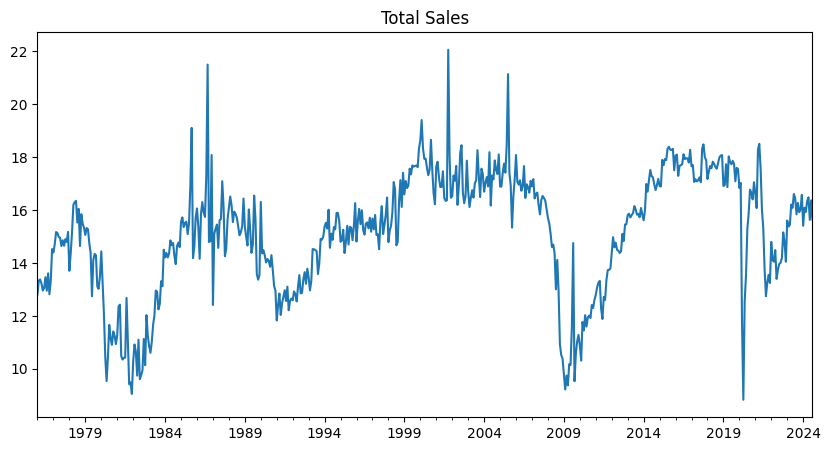

In [6]:
sales = fred.get_series("TOTALSA", parse_dates=['DATE'])

sales_df = pd.DataFrame({'DATE':sales.index, 'SALES':sales.values})

print(sales_df)

sales.plot(figsize=(10,5), title="Total Sales")

          DATE        GDP
0   1946-01-01        NaN
1   1946-04-01        NaN
2   1946-07-01        NaN
3   1946-10-01        NaN
4   1947-01-01   0.243164
..         ...        ...
309 2023-04-01  27.063012
310 2023-07-01  27.610128
311 2023-10-01  27.956998
312 2024-01-01  28.269174
313 2024-04-01  28.652337

[314 rows x 2 columns]


<Axes: title={'center': 'GDP'}>

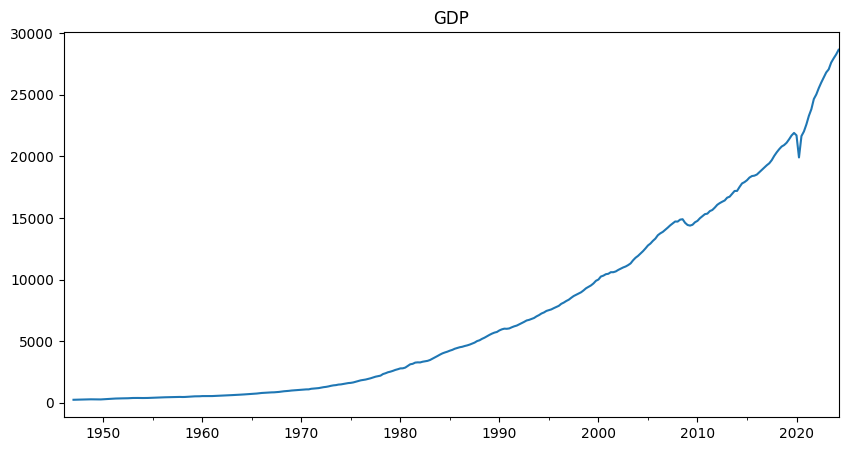

In [7]:
gdp = fred.get_series("GDP")


gdp_df = pd.DataFrame({'DATE':gdp.index, 'GDP':gdp.values}) \
            .assign(GDP = lambda cols: cols['GDP']/1000)


print(gdp_df)

gdp.plot(figsize=(10,5), title="GDP")

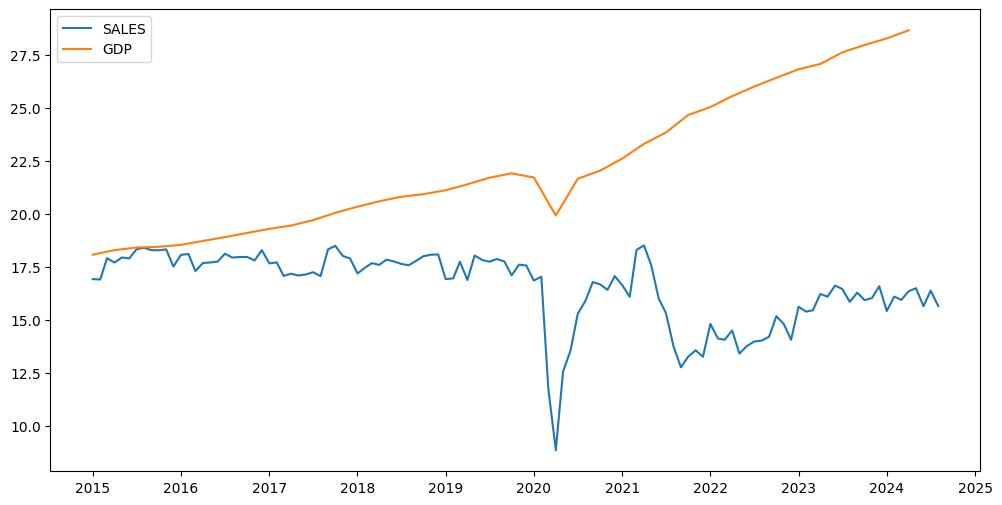

In [8]:
plt.figure(figsize=(12, 6))

sales_df = sales_df[sales_df['DATE'] >= '2014-12-12'].reset_index(drop=True)
gdp_df = gdp_df[gdp_df['DATE'] >= '2014-12-12'].reset_index(drop=True)

plt.plot(sales_df['DATE'], sales_df['SALES'], label='SALES')
plt.plot(gdp_df['DATE'], gdp_df['GDP'], label='GDP')

plt.legend()
plt.show()

## Sales and GDP on the same time grain

This code makes the it so the quarterly data is in the middle of the quarter instead of at the start of the quarter.

In [9]:
gdp_df = gdp_df.assign(DATE = lambda cols: cols['DATE'] + pd.Timedelta(32, 'D'))\
    .assign(DATE = lambda cols: cols['DATE'].apply(lambda x: x.replace(day=1)))

gdp_df

,DATE,GDP
0,2015-02-01,18.063529
1,2015-05-01,18.279784
2,2015-08-01,18.401626
3,2015-11-01,18.435137
4,2016-02-01,18.525933
5,2016-05-01,18.711702
6,2016-08-01,18.892639
7,2016-11-01,19.089379
8,2017-02-01,19.280084
9,2017-05-01,19.438643


## Merge Data Frames and Interpolate missing GDP values

* Pandas' interpolate(method="linear") will replace NaN with an approximation for the GDP values.
* limit_direction="backward" will stop missing values on the tail end being predicted. 
* Without limit_direction="backward" the last GDP value (28.652337) will be used to replace the remaining tail end for GDP which would be incorrect. 
* The for loop uses the average of the last 5 GDP growth rates and then fills in the null values with an approximation of GDP.

          DATE   SALES        GDP
0   2015-01-01  16.910  18.063529
1   2015-02-01  16.891  18.063529
2   2015-03-01  17.896  18.135614
3   2015-04-01  17.693  18.207699
4   2015-05-01  17.929  18.279784
..         ...     ...        ...
111 2024-04-01  16.341  28.524616
112 2024-05-01  16.482  28.652337
113 2024-06-01  15.631  28.772082
114 2024-07-01  16.367  28.892327
115 2024-08-01  15.640  29.013075

[116 rows x 3 columns]
          DATE   SALES        GDP
101 2023-06-01  16.608  27.245384
102 2023-07-01  16.443  27.427756
103 2023-08-01  15.838  27.610128
104 2023-09-01  16.272  27.725751
105 2023-10-01  15.920  27.841375
106 2023-11-01  16.017  27.956998
107 2023-12-01  16.575  28.061057
108 2024-01-01  15.406  28.165115
109 2024-02-01  16.087  28.269174
110 2024-03-01  15.930  28.396895
111 2024-04-01  16.341  28.524616
112 2024-05-01  16.482  28.652337
113 2024-06-01  15.631  28.772082
114 2024-07-01  16.367  28.892327
115 2024-08-01  15.640  29.013075


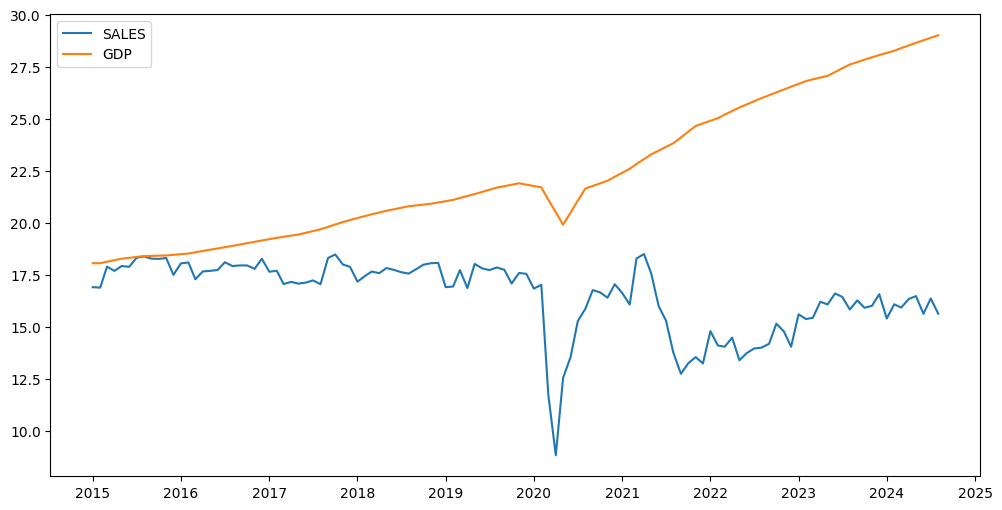

In [10]:
df = pd.merge(
    left = sales_df,
    right = gdp_df,
    on = "DATE",
    how = "outer"
).sort_values(by = "DATE", ascending = True)

df["GDP"] = df["GDP"].interpolate(method="linear", limit_direction="backward")

GDP_avg_growth_rate = (df["GDP"] / df["GDP"].shift(1)).dropna().tail(5).mean()
for x in range(df.shape[0]):
    if(pd.isnull(df.loc[x, "GDP"])):
        df.loc[x, "GDP"] = df.loc[x-1, "GDP"] * GDP_avg_growth_rate
  
print(df)
print(df.tail(15))

plt.figure(figsize=(12, 6))

df = df[df['DATE'] >= '2014-12-12'].reset_index(drop=True)
df = df[df['DATE'] >= '2014-12-12'].reset_index(drop=True)

plt.plot(df['DATE'], df['SALES'], label='SALES')
plt.plot(df['DATE'], df['GDP'], label='GDP')

plt.legend()
plt.show()

## Training and Test Sets


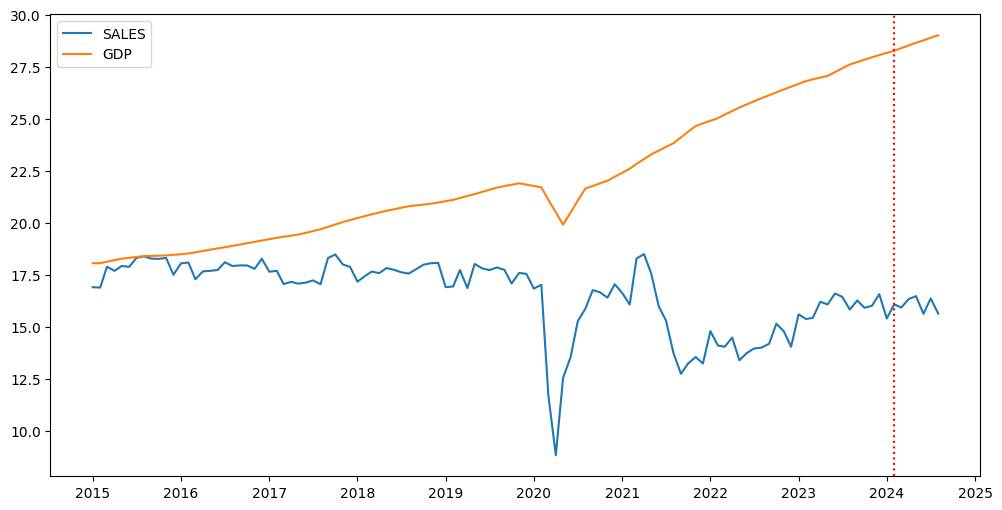

In [11]:
MAX_TRAINING_DATE = df.tail(7).iloc[0]["DATE"]

plt.figure(figsize=(12, 6))

df = df[df['DATE'] >= '2014-12-12'].reset_index(drop=True)
df = df[df['DATE'] >= '2014-12-12'].reset_index(drop=True)

plt.plot(df['DATE'], df['SALES'], label='SALES')
plt.plot(df['DATE'], df['GDP'], label='GDP')

plt.axvline(MAX_TRAINING_DATE, color="red", linestyle="dotted")

plt.legend()
plt.show()

df_train = df.loc[df["DATE"] < MAX_TRAINING_DATE, :]
df_test = df.loc[df["DATE"] >= MAX_TRAINING_DATE, :]

## Build Initial Model

**Learn about hyper parameters and sarimax**
* Order, trend and seasonal order are all hyperparameters.
* Hyperparameters are parameters whose values control the learning process and influences the forecast result.
* Used by learning algorithm when learning, but not apart of the resulting model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25711D+00    |proj g|=  8.81487D-02

At iterate    5    f=  1.25270D+00    |proj g|=  2.35130D-02

At iterate   10    f=  1.25056D+00    |proj g|=  1.47866D-03

At iterate   15    f=  1.25047D+00    |proj g|=  2.10069D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     22      1     0     0   7.845D-06   1.250D+00
  F =   1.2504664622910640     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


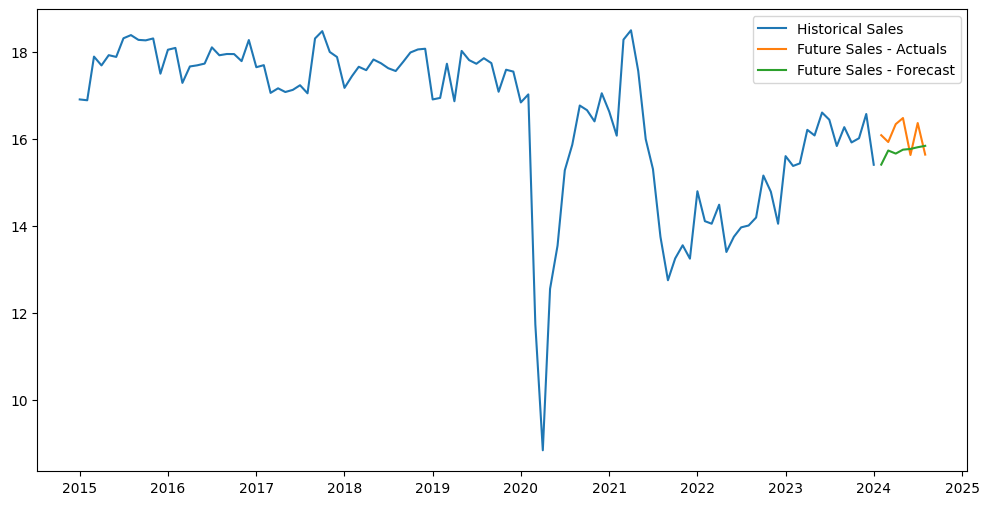

In [12]:
model = SARIMAX(
    endog = df_train["SALES"],
    exog = df_train["GDP"],
    order = (1, 1, 3), # p, d, q order parameters for arima
    trend = [1, 0], # A(t) = a0 + a1*t + a2*t^2 ...
    seasonal_order = (0,0,0, 12) # P, D, Q seasonal order parameters
).fit()

forecast = model.forecast(steps=df_test.shape[0], exog=df_test["GDP"])

plt.figure(figsize=(12, 6))
plt.plot(df_train["DATE"], df_train["SALES"], label="Historical Sales")
plt.plot(df_test["DATE"], df_test["SALES"], label="Future Sales - Actuals")
plt.plot(df_test["DATE"], forecast, label="Future Sales - Forecast")
plt.legend()
plt.show()

## Hyperparameter Scoring Function and Parameter Search Step Function

In [13]:
# Function to "step" randomly in hyperparameter space
def step(params):
    updated_params = deepcopy(params)
    selected_variable = np.random.choice(["p", "d", "q", "P", "D", "Q", "a0", "a1"], size=1)[0]
    current_value = updated_params[selected_variable]
    
    # Update the current value randomly
    updated_value = current_value + np.random.choice([-1, 1], size=1)[0]
    
    # Parameter Limit
    # The "p" and the "q" can both be greater values
    # The "d" (differencing parameter) should always be low
    # The "P" should be low as it is the seasonal. Factors from several years ago are less likely to impact current forecast
    # The "a0" and the "a1" are boolean, so only 0 and 1
    if(selected_variable in ["p", "q"]):
        low, high = 0, 6
    else:
        low, high = 0, 1
    
    # if updated value is greater than the high value -> updated value = high
    # if updated value is lesser than the low value -> updated value = low
    updated_value = min([max([low, updated_value]),high])
    
    updated_params[selected_variable] = updated_value
    
    return updated_params

# Function to score hyperparameter set
def score(params, data):
    
    error_scores = []
    
    for validation_steps in [1,2,3,4,5]:
        training_set_length = data.shape[0] - validation_steps
    
        model = SARIMAX(
            endog = data["SALES"].head(training_set_length),
            exog = data["GDP"].head(training_set_length),
            order = (params["p"], params["d"], params["q"]), # p, d, q order parameters for arima
            trend = [params["a0"], params["a1"]], # A(t) = a0 + a1*t + a2*t^2 ...
            seasonal_order = (params["P"], params["D"], params["Q"], 12) # P, D, Q seasonal order parameters
        ).fit()

        forecast = model.forecast(steps=validation_steps, exog=data["GDP"].tail(validation_steps))
        actuals = data["SALES"].tail(validation_steps)

        # computer error metric and return
        error = (forecast.tail(1) - actuals.tail(1)).abs().mean()
        error_scores.append(error)
        
    return np.mean(error_scores)
    


## Run Hyperparameter Optimization Scan

In [14]:
# Initial guess
x0 = {'p': 1, 'd': 1, 'q': 0, 'P': 0, 'D': 0, 'Q': 0, 'a0': 1, 'a1': 1}
f0 = score(x0, df_train)

# Keep track of best parameters
xbest = deepcopy(x0)
fbest = f0

print('initial parameter score = ', f0)

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28291D+00    |proj g|=  8.10235D-02

At iterate    5    f=  1.28289D+00    |proj g|=  3.96235D-01

At iterate   10    f=  1.28240D+00    |proj g|=  2.66631D-01

At iterate   15    f=  1.28235D+00    |proj g|=  2.82132D-01

At iterate   20    f=  1.27904D+00    |proj g|=  2.26876D+00

At iterate   25    f=  1.27577D+00    |proj g|=  2.24944D-02

At iterate   30    f=  1.27522D+00    |proj g|=  5.25712D-02

At iterate   35    f=  1.27512D+00    |proj g|=  2.32708D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28963D+00    |proj g|=  1.06363D-01

At iterate    5    f=  1.28961D+00    |proj g|=  2.96309D-01

At iterate   10    f=  1.28907D+00    |proj g|=  7.81707D-01

At iterate   15    f=  1.28886D+00    |proj g|=  7.44687D-01

At iterate   20    f=  1.28336D+00    |proj g|=  2.74879D+00

At iterate   25    f=  1.28184D+00    |proj g|=  6.69094D-02

At iterate   30    f=  1.28127D+00    |proj g|=  1.75946D-02

At iterate   35    f=  1.28109D+00    |proj g|=  1.06870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29351D+00    |proj g|=  9.70119D-02

At iterate    5    f=  1.29349D+00    |proj g|=  2.97671D-01

At iterate   10    f=  1.29270D+00    |proj g|=  1.16653D+00

At iterate   15    f=  1.28596D+00    |proj g|=  9.92545D-02

At iterate   20    f=  1.28572D+00    |proj g|=  9.60089D-02

At iterate   25    f=  1.28559D+00    |proj g|=  3.54702D-02

At iterate   30    f=  1.28549D+00    |proj g|=  9.86948D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


if(np.random.random() < 2**(-(f1-f0)/temperature))

allows for exploration of the parameter space to a better degree by allowing a worse score temporarily with the goal for a better score 

In [15]:
optimization_steps = 100

temperature = 0.05

optimization_progress = {'f0': [], 'fbest': []}

for t in range(optimization_steps):

    # Randomly changed x0
    x1 = step(x0)
    f1 = score(x1, df_train)

    # If the new point is lower in score than the previous (meaning better)
    if(f1 < f0):
        x0 = deepcopy(x1)
        f0 = f1
    else: # if new point is worse, accept with some probability
        if(np.random.random() < 2**(-(f1-f0)/temperature)):
            x0 = deepcopy(x1)
            f0 = f1

    # Update the 'best' parameters
    if(f0 < fbest):
        fbest = f0
        xbest = deepcopy(x0)

    # Print out progress
    print('current score = {}, best score = {}'.format(f0, fbest))
    optimization_progress['f0'].append(f0)
    optimization_progress['fbest'].append(fbest)
    

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28291D+00    |proj g|=  8.10235D-02

At iterate    5    f=  1.28289D+00    |proj g|=  3.96235D-01

At iterate   10    f=  1.28240D+00    |proj g|=  2.66631D-01

At iterate   15    f=  1.28235D+00    |proj g|=  2.82132D-01

At iterate   20    f=  1.27904D+00    |proj g|=  2.26876D+00

At iterate   25    f=  1.27577D+00    |proj g|=  2.24944D-02

At iterate   30    f=  1.27522D+00    |proj g|=  5.25712D-02

At iterate   35    f=  1.27512D+00    |proj g|=  2.32708D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   45    f=  1.27672D+00    |proj g|=  2.83192D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     69      1     0     0   7.064D-05   1.277D+00
  F =   1.2767231776810652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28963D+00    |proj g|=  1.06363D-01

At iterate    5    f=  1.28961D+00    |proj g|=  2.96309D-01

At iterate   10    f=  1.28907D+00    |proj g|=  7.81707D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f=  1.28109D+00    |proj g|=  1.06870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     47      1     0     0   2.592D-05   1.281D+00
  F =   1.2810941997736169     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29351D+00    |proj g|=  9.70119D-02

At iterate    5    f=  1.29349D+00    |proj g|=  2.97671D-01

At iterate   10    f=  1.29270D+00    |proj g|=  1.16653D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     46      1     0     0   1.195D-03   1.285D+00
  F =   1.2854858581052879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29699D+00    |proj g|=  1.11579D-01

At iterate    5    f=  1.29697D+00    |proj g|=  2.82895D-01

At iterate   10    f=  1.29644D+00    |proj g|=  7.42000D-01

At iterate   15    f=  1.29618D+00    |proj g|=  9.35338D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  1.28870D+00    |proj g|=  1.68426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     75      2     0     0   1.684D-04   1.289D+00
  F =   1.2886977433824258     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
current score = 0.3959321163713259, best score = 0.3959321163713259
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28291D+00    |proj g|=  8.10235D-02

At iterate    5    f=  1.28289D+00    |proj g|=  3.96235D-01

A

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28524D+00    |proj g|=  1.02191D-01

At iterate    5    f=  1.28522D+00    |proj g|=  3.01962D-01

At iterate   10    f=  1.28467D+00    |proj g|=  7.89099D-01

At iterate   15    f=  1.28442D+00    |proj g|=  9.27308D-01

At iterate   20    f=  1.27861D+00    |proj g|=  1.64334D+00

At iterate   25    f=  1.27749D+00    |proj g|=  5.95457D-02

At iterate   30    f=  1.27707D+00    |proj g|=  7.67168D-01

At iterate   35    f=  1.27690D+00    |proj g|=  1.85584D-02

At iterate   40    f=  1.27689D+00    |proj g|=  1.70168D-01

At iterate   45    f=  1.27672D+00    |proj g|=  2.83192D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29351D+00    |proj g|=  9.70119D-02

At iterate    5    f=  1.29349D+00    |proj g|=  2.97671D-01

At iterate   10    f=  1.29270D+00    |proj g|=  1.16653D+00

At iterate   15    f=  1.28596D+00    |proj g|=  9.92545D-02

At iterate   20    f=  1.28572D+00    |proj g|=  9.60089D-02

At iterate   25    f=  1.28559D+00    |proj g|=  3.54702D-02

At iterate   30    f=  1.28549D+00    |proj g|=  9.86948D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  1.28870D+00    |proj g|=  1.68426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     75      2     0     0   1.684D-04   1.289D+00
  F =   1.2886977433824258     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
current score = 0.3959321163713259, best score = 0.3959321163713259
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28291D+00    |proj g|=  8.10235D-02

At iterate    5    f=  1.28289D+00    |proj g|=  3.96235D-01

A

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     69      1     0     0   7.064D-05   1.277D+00
  F =   1.2767231776810652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28963D+00    |proj g|=  1.06363D-01

At iterate    5    f=  1.28961D+00    |proj g|=  2.96309D-01

At iterate   10    f=  1.28907D+00    |proj g|=  7.81707D-01

At iterate   15    f=  1.28886D+00    |proj g|=  7.44687D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29351D+00    |proj g|=  9.70119D-02

At iterate    5    f=  1.29349D+00    |proj g|=  2.97671D-01

At iterate   10    f=  1.29270D+00    |proj g|=  1.16653D+00

At iterate   15    f=  1.28596D+00    |proj g|=  9.92545D-02

At iterate   20    f=  1.28572D+00    |proj g|=  9.60089D-02

At iterate   25    f=  1.28559D+00    |proj g|=  3.54702D-02

At iterate   30    f=  1.28549D+00    |proj g|=  9.86948D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  1.28870D+00    |proj g|=  1.68426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     75      2     0     0   1.684D-04   1.289D+00
  F =   1.2886977433824258     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
current score = 0.3959321163713259, best score = 0.3959321163713259
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28291D+00    |proj g|=  8.10235D-02

At iterate    5    f=  1.28289D+00    |proj g|=  3.96235D-01

A

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28524D+00    |proj g|=  1.02191D-01

At iterate    5    f=  1.28522D+00    |proj g|=  3.01962D-01

At iterate   10    f=  1.28467D+00    |proj g|=  7.89099D-01

At iterate   15    f=  1.28442D+00    |proj g|=  9.27308D-01

At iterate   20    f=  1.27861D+00    |proj g|=  1.64334D+00

At iterate   25    f=  1.27749D+00    |proj g|=  5.95457D-02

At iterate   30    f=  1.27707D+00    |proj g|=  7.67168D-01

At iterate   35    f=  1.27690D+00    |proj g|=  1.85584D-02

At iterate   40    f=  1.27689D+00    |proj g|=  1.70168D-01

At iterate   45    f=  1.27672D+00    |proj g|=  2.83192D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29351D+00    |proj g|=  9.70119D-02

At iterate    5    f=  1.29349D+00    |proj g|=  2.97671D-01

At iterate   10    f=  1.29270D+00    |proj g|=  1.16653D+00

At iterate   15    f=  1.28596D+00    |proj g|=  9.92545D-02

At iterate   20    f=  1.28572D+00    |proj g|=  9.60089D-02

At iterate   25    f=  1.28559D+00    |proj g|=  3.54702D-02

At iterate   30    f=  1.28549D+00    |proj g|=  9.86948D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29699D+00    |proj g|=  1.11579D-01

At iterate    5    f=  1.29697D+00    |proj g|=  2.82895D-01

At iterate   10    f=  1.29644D+00    |proj g|=  7.42000D-01

At iterate   15    f=  1.29618D+00    |proj g|=  9.35338D-01

At iterate   20    f=  1.29123D+00    |proj g|=  5.12045D-01

At iterate   25    f=  1.28938D+00    |proj g|=  6.97821D-02

At iterate   30    f=  1.28905D+00    |proj g|=  9.57367D-01

At iterate   35    f=  1.28886D+00    |proj g|=  2.11542D-02

At iterate   40    f=  1.28886D+00    |proj g|=  5.43342D-02

At iterate   45    f=  1.28875D+00    |proj g|=  3.46930D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  1.28870D+00    |proj g|=  1.68426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     75      2     0     0   1.684D-04   1.289D+00
  F =   1.2886977433824258     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
current score = 0.3959321163713259, best score = 0.3959321163713259
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27624D+00    |proj g|=  1.06998D+00

At iterate    5    f=  1.27610D+00    |proj g|=  4.71482D-01

A


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.27717D+00    |proj g|=  7.85488D-01

At iterate   20    f=  1.27673D+00    |proj g|=  2.99872D-02

At iterate   25    f=  1.27671D+00    |proj g|=  3.38896D-01

At iterate   30    f=  1.27529D+00    |proj g|=  2.04536D+00

At iterate   35    f=  1.27440D+00    |proj g|=  4.42239D-02

At iterate   40    f=  1.27094D+00    |proj g|=  7.52121D-01

At iterate   45    f=  1.27065D+00    |proj g|=  5.39422D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     57      1     0     0   5.394D-04   1.271D+00
  F =   1.2706521776168802     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  1.28139D+00    |proj g|=  9.00063D-01

At iterate   20    f=  1.28117D+00    |proj g|=  1.27401D-01

At iterate   25    f=  1.28020D+00    |proj g|=  2.07643D+00

At iterate   30    f=  1.27841D+00    |proj g|=  2.29046D-01

At iterate   35    f=  1.27765D+00    |proj g|=  1.22521D+00

At iterate   40    f=  1.27522D+00    |proj g|=  3.68825D-01

At iterate   45    f=  1.27510D+00    |proj g|=  3.63721D-02

At iterate   50    f=  1.27509D+00    |proj g|=  1.39312D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   1.393D-03   1.275D+00
  F =   1.27509329012

 This problem is unconstrained.



At iterate    5    f=  1.28762D+00    |proj g|=  4.90830D-01

At iterate   10    f=  1.28579D+00    |proj g|=  1.03220D+00

At iterate   15    f=  1.28449D+00    |proj g|=  7.65927D-01

At iterate   20    f=  1.28349D+00    |proj g|=  9.19821D-02

At iterate   25    f=  1.27981D+00    |proj g|=  4.88664D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     49      1     0     0   1.299D-02   1.280D+00
  F =   1.2797162639977029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.28880D+00    |proj g|=  1.81753D-02

At iterate   20    f=  1.28876D+00    |proj g|=  5.03764D-01

At iterate   25    f=  1.28712D+00    |proj g|=  1.35648D+00

At iterate   30    f=  1.28686D+00    |proj g|=  1.30160D-01

At iterate   35    f=  1.28647D+00    |proj g|=  1.01673D+00

At iterate   40    f=  1.28601D+00    |proj g|=  7.20472D-01

At iterate   45    f=  1.28296D+00    |proj g|=  5.92058D-01

At iterate   50    f=  1.28285D+00    |proj g|=  3.61598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   3.616D-03   1.283D+00
  F =   1.28285196566

 This problem is unconstrained.



At iterate   10    f=  1.39724D+00    |proj g|=  1.05709D+00

At iterate   15    f=  1.39689D+00    |proj g|=  1.15739D-01

At iterate   20    f=  1.39655D+00    |proj g|=  4.89384D-01

At iterate   25    f=  1.39644D+00    |proj g|=  5.06178D-02

At iterate   30    f=  1.39554D+00    |proj g|=  7.97004D-01

At iterate   35    f=  1.39512D+00    |proj g|=  3.04372D-02

At iterate   40    f=  1.39484D+00    |proj g|=  1.00454D-01

At iterate   45    f=  1.39482D+00    |proj g|=  3.43341D-02

At iterate   50    f=  1.39479D+00    |proj g|=  6.06470D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.41589D+00    |proj g|=  1.64795D+00

At iterate   10    f=  1.39628D+00    |proj g|=  5.93461D-01

At iterate   15    f=  1.39612D+00    |proj g|=  1.57317D-01

At iterate   20    f=  1.39578D+00    |proj g|=  4.26583D-01

At iterate   25    f=  1.39573D+00    |proj g|=  7.80679D-02

At iterate   30    f=  1.39495D+00    |proj g|=  4.26397D-01

At iterate   35    f=  1.39453D+00    |proj g|=  1.70440D-01

At iterate   40    f=  1.39422D+00    |proj g|=  1.19063D-01

At iterate   45    f=  1.39422D+00    |proj g|=  1.72728D-02

At iterate   50    f=  1.39408D+00    |proj g|=  3.30461D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.39906D+00    |proj g|=  2.06766D-01

At iterate   15    f=  1.39899D+00    |proj g|=  2.79526D-01

At iterate   20    f=  1.39864D+00    |proj g|=  2.56342D-02

At iterate   25    f=  1.39861D+00    |proj g|=  1.13029D-01

At iterate   30    f=  1.39771D+00    |proj g|=  4.00434D-02

At iterate   35    f=  1.39747D+00    |proj g|=  1.47519D-02

At iterate   40    f=  1.39708D+00    |proj g|=  1.71665D-02

At iterate   45    f=  1.39686D+00    |proj g|=  4.67178D-01

At iterate   50    f=  1.39676D+00    |proj g|=  9.75239D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.41792D+00    |proj g|=  1.49015D+00

At iterate   10    f=  1.39908D+00    |proj g|=  7.87300D-01

At iterate   15    f=  1.39885D+00    |proj g|=  1.30209D-01

At iterate   20    f=  1.39854D+00    |proj g|=  5.83134D-01

At iterate   25    f=  1.39845D+00    |proj g|=  1.23016D-02

At iterate   30    f=  1.39772D+00    |proj g|=  3.31887D-01

At iterate   35    f=  1.39705D+00    |proj g|=  1.52888D-02

At iterate   40    f=  1.39641D+00    |proj g|=  3.63370D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     57      1     0     0   1.097D-04   1.396D+00
  F =   1.39631920231

 This problem is unconstrained.



At iterate    5    f=  1.41913D+00    |proj g|=  1.47645D+00

At iterate   10    f=  1.39920D+00    |proj g|=  8.64344D-01

At iterate   15    f=  1.39893D+00    |proj g|=  1.09925D-01

At iterate   20    f=  1.39869D+00    |proj g|=  5.04861D-01

At iterate   25    f=  1.39862D+00    |proj g|=  1.04170D-02

At iterate   30    f=  1.39798D+00    |proj g|=  3.79710D-01

At iterate   35    f=  1.39742D+00    |proj g|=  1.11900D-01

At iterate   40    f=  1.39717D+00    |proj g|=  1.32028D-01

At iterate   45    f=  1.39712D+00    |proj g|=  1.27299D-02

At iterate   50    f=  1.39705D+00    |proj g|=  2.34653D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.27610D+00    |proj g|=  4.71482D-01

At iterate   10    f=  1.27478D+00    |proj g|=  1.14697D+00

At iterate   15    f=  1.27456D+00    |proj g|=  3.97174D-01

At iterate   20    f=  1.27398D+00    |proj g|=  3.64861D-01

At iterate   25    f=  1.27393D+00    |proj g|=  1.49363D-01

At iterate   30    f=  1.27285D+00    |proj g|=  1.11580D+00

At iterate   35    f=  1.27197D+00    |proj g|=  4.57153D-02

At iterate   40    f=  1.27124D+00    |proj g|=  4.36265D-01

At iterate   45    f=  1.26848D+00    |proj g|=  1.44708D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     67   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27898D+00    |proj g|=  9.08009D-01

At iterate    5    f=  1.27886D+00    |proj g|=  4.69748D-01

At iterate   10    f=  1.27753D+00    |proj g|=  1.08328D+00

At iterate   15    f=  1.27717D+00    |proj g|=  7.85488D-01

At iterate   20    f=  1.27673D+00    |proj g|=  2.99872D-02

At iterate   25    f=  1.27671D+00    |proj g|=  3.38896D-01

At iterate   30    f=  1.27529D+00    |proj g|=  2.04536D+00

At iterate   35    f=  1.27440D+00    |proj g|=  4.42239D-02

At iterate   40    f=  1.27094D+00    |proj g|=  7.52121D-01

At iterate   45    f=  1.27065D+00    |proj g|=  5.39422D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   20    f=  1.28117D+00    |proj g|=  1.27401D-01

At iterate   25    f=  1.28020D+00    |proj g|=  2.07643D+00

At iterate   30    f=  1.27841D+00    |proj g|=  2.29046D-01

At iterate   35    f=  1.27765D+00    |proj g|=  1.22521D+00

At iterate   40    f=  1.27522D+00    |proj g|=  3.68825D-01

At iterate   45    f=  1.27510D+00    |proj g|=  3.63721D-02

At iterate   50    f=  1.27509D+00    |proj g|=  1.39312D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   1.393D-03   1.275D+00
  F =   1.2750932901210130     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  1.28449D+00    |proj g|=  7.65927D-01

At iterate   20    f=  1.28349D+00    |proj g|=  9.19821D-02

At iterate   25    f=  1.27981D+00    |proj g|=  4.88664D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     49      1     0     0   1.299D-02   1.280D+00
  F =   1.2797162639977029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29113D+00    |proj g|=  8.73273D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.28880D+00    |proj g|=  1.81753D-02

At iterate   20    f=  1.28876D+00    |proj g|=  5.03764D-01

At iterate   25    f=  1.28712D+00    |proj g|=  1.35648D+00

At iterate   30    f=  1.28686D+00    |proj g|=  1.30160D-01

At iterate   35    f=  1.28647D+00    |proj g|=  1.01673D+00

At iterate   40    f=  1.28601D+00    |proj g|=  7.20472D-01

At iterate   45    f=  1.28296D+00    |proj g|=  5.92058D-01

At iterate   50    f=  1.28285D+00    |proj g|=  3.61598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   3.616D-03   1.283D+00
  F =   1.28285196566

 This problem is unconstrained.



At iterate   15    f=  1.27456D+00    |proj g|=  3.97174D-01

At iterate   20    f=  1.27398D+00    |proj g|=  3.64861D-01

At iterate   25    f=  1.27393D+00    |proj g|=  1.49363D-01

At iterate   30    f=  1.27285D+00    |proj g|=  1.11580D+00

At iterate   35    f=  1.27197D+00    |proj g|=  4.57153D-02

At iterate   40    f=  1.27124D+00    |proj g|=  4.36265D-01

At iterate   45    f=  1.26848D+00    |proj g|=  1.44708D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     67      1     0     0   3.853D-04   1.268D+00
  F =   1.2684549975902157     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27898D+00    |proj g|=  9.08009D-01

At iterate    5    f=  1.27886D+00    |proj g|=  4.69748D-01

At iterate   10    f=  1.27753D+00    |proj g|=  1.08328D+00

At iterate   15    f=  1.27717D+00    |proj g|=  7.85488D-01

At iterate   20    f=  1.27673D+00    |proj g|=  2.99872D-02

At iterate   25    f=  1.27671D+00    |proj g|=  3.38896D-01

At iterate   30    f=  1.27529D+00    |proj g|=  2.04536D+00

At iterate   35    f=  1.27440D+00    |proj g|=  4.42239D-02

At iterate   40    f=  1.27094D+00    |proj g|=  7.52121D-01

At iterate   45    f=  1.27065D+00    |proj g|=  5.39422D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   15    f=  1.28139D+00    |proj g|=  9.00063D-01

At iterate   20    f=  1.28117D+00    |proj g|=  1.27401D-01

At iterate   25    f=  1.28020D+00    |proj g|=  2.07643D+00

At iterate   30    f=  1.27841D+00    |proj g|=  2.29046D-01

At iterate   35    f=  1.27765D+00    |proj g|=  1.22521D+00

At iterate   40    f=  1.27522D+00    |proj g|=  3.68825D-01

At iterate   45    f=  1.27510D+00    |proj g|=  3.63721D-02

At iterate   50    f=  1.27509D+00    |proj g|=  1.39312D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   1.393D-03   1.275D+00
  F =   1.27509329012

 This problem is unconstrained.



At iterate    5    f=  1.28762D+00    |proj g|=  4.90830D-01

At iterate   10    f=  1.28579D+00    |proj g|=  1.03220D+00

At iterate   15    f=  1.28449D+00    |proj g|=  7.65927D-01

At iterate   20    f=  1.28349D+00    |proj g|=  9.19821D-02

At iterate   25    f=  1.27981D+00    |proj g|=  4.88664D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     49      1     0     0   1.299D-02   1.280D+00
  F =   1.2797162639977029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.28880D+00    |proj g|=  1.81753D-02

At iterate   20    f=  1.28876D+00    |proj g|=  5.03764D-01

At iterate   25    f=  1.28712D+00    |proj g|=  1.35648D+00

At iterate   30    f=  1.28686D+00    |proj g|=  1.30160D-01

At iterate   35    f=  1.28647D+00    |proj g|=  1.01673D+00

At iterate   40    f=  1.28601D+00    |proj g|=  7.20472D-01

At iterate   45    f=  1.28296D+00    |proj g|=  5.92058D-01

At iterate   50    f=  1.28285D+00    |proj g|=  3.61598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   3.616D-03   1.283D+00
  F =   1.28285196566

 This problem is unconstrained.



At iterate    5    f=  1.27610D+00    |proj g|=  4.71482D-01

At iterate   10    f=  1.27478D+00    |proj g|=  1.14697D+00

At iterate   15    f=  1.27456D+00    |proj g|=  3.97174D-01

At iterate   20    f=  1.27398D+00    |proj g|=  3.64861D-01

At iterate   25    f=  1.27393D+00    |proj g|=  1.49363D-01

At iterate   30    f=  1.27285D+00    |proj g|=  1.11580D+00

At iterate   35    f=  1.27197D+00    |proj g|=  4.57153D-02

At iterate   40    f=  1.27124D+00    |proj g|=  4.36265D-01

At iterate   45    f=  1.26848D+00    |proj g|=  1.44708D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     67   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27898D+00    |proj g|=  9.08009D-01

At iterate    5    f=  1.27886D+00    |proj g|=  4.69748D-01

At iterate   10    f=  1.27753D+00    |proj g|=  1.08328D+00

At iterate   15    f=  1.27717D+00    |proj g|=  7.85488D-01

At iterate   20    f=  1.27673D+00    |proj g|=  2.99872D-02

At iterate   25    f=  1.27671D+00    |proj g|=  3.38896D-01

At iterate   30    f=  1.27529D+00    |proj g|=  2.04536D+00

At iterate   35    f=  1.27440D+00    |proj g|=  4.42239D-02

At iterate   40    f=  1.27094D+00    |proj g|=  7.52121D-01

At iterate   45    f=  1.27065D+00    |proj g|=  5.39422D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28339D+00    |proj g|=  8.58307D-01

At iterate    5    f=  1.28328D+00    |proj g|=  4.62419D-01

At iterate   10    f=  1.28193D+00    |proj g|=  1.03936D+00

At iterate   15    f=  1.28139D+00    |proj g|=  9.00063D-01

At iterate   20    f=  1.28117D+00    |proj g|=  1.27401D-01

At iterate   25    f=  1.28020D+00    |proj g|=  2.07643D+00

At iterate   30    f=  1.27841D+00    |proj g|=  2.29046D-01

At iterate   35    f=  1.27765D+00    |proj g|=  1.22521D+00

At iterate   40    f=  1.27522D+00    |proj g|=  3.68825D-01

At iterate   45    f=  1.27510D+00    |proj g|=  3.63721D-02

At iterate   50    f=  1.27509D+00    |proj g|=  1.39312D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = numbe

 This problem is unconstrained.



At iterate   15    f=  1.28449D+00    |proj g|=  7.65927D-01

At iterate   20    f=  1.28349D+00    |proj g|=  9.19821D-02

At iterate   25    f=  1.27981D+00    |proj g|=  4.88664D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     49      1     0     0   1.299D-02   1.280D+00
  F =   1.2797162639977029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29113D+00    |proj g|=  8.73273D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.28880D+00    |proj g|=  1.81753D-02

At iterate   20    f=  1.28876D+00    |proj g|=  5.03764D-01

At iterate   25    f=  1.28712D+00    |proj g|=  1.35648D+00

At iterate   30    f=  1.28686D+00    |proj g|=  1.30160D-01

At iterate   35    f=  1.28647D+00    |proj g|=  1.01673D+00

At iterate   40    f=  1.28601D+00    |proj g|=  7.20472D-01

At iterate   45    f=  1.28296D+00    |proj g|=  5.92058D-01

At iterate   50    f=  1.28285D+00    |proj g|=  3.61598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   3.616D-03   1.283D+00
  F =   1.28285196566

 This problem is unconstrained.



At iterate   15    f=  1.27456D+00    |proj g|=  3.97174D-01

At iterate   20    f=  1.27398D+00    |proj g|=  3.64861D-01

At iterate   25    f=  1.27393D+00    |proj g|=  1.49363D-01

At iterate   30    f=  1.27285D+00    |proj g|=  1.11580D+00

At iterate   35    f=  1.27197D+00    |proj g|=  4.57153D-02

At iterate   40    f=  1.27124D+00    |proj g|=  4.36265D-01

At iterate   45    f=  1.26848D+00    |proj g|=  1.44708D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     67      1     0     0   3.853D-04   1.268D+00
  F =   1.2684549975902157     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.27753D+00    |proj g|=  1.08328D+00

At iterate   15    f=  1.27717D+00    |proj g|=  7.85488D-01

At iterate   20    f=  1.27673D+00    |proj g|=  2.99872D-02

At iterate   25    f=  1.27671D+00    |proj g|=  3.38896D-01

At iterate   30    f=  1.27529D+00    |proj g|=  2.04536D+00

At iterate   35    f=  1.27440D+00    |proj g|=  4.42239D-02

At iterate   40    f=  1.27094D+00    |proj g|=  7.52121D-01

At iterate   45    f=  1.27065D+00    |proj g|=  5.39422D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     57      1     0     0   5.394D-04   1.271D+00
  F =   1.27065217761

 This problem is unconstrained.



At iterate   15    f=  1.28139D+00    |proj g|=  9.00063D-01

At iterate   20    f=  1.28117D+00    |proj g|=  1.27401D-01

At iterate   25    f=  1.28020D+00    |proj g|=  2.07643D+00

At iterate   30    f=  1.27841D+00    |proj g|=  2.29046D-01

At iterate   35    f=  1.27765D+00    |proj g|=  1.22521D+00

At iterate   40    f=  1.27522D+00    |proj g|=  3.68825D-01

At iterate   45    f=  1.27510D+00    |proj g|=  3.63721D-02

At iterate   50    f=  1.27509D+00    |proj g|=  1.39312D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   1.393D-03   1.275D+00
  F =   1.27509329012

 This problem is unconstrained.



At iterate    5    f=  1.28762D+00    |proj g|=  4.90830D-01

At iterate   10    f=  1.28579D+00    |proj g|=  1.03220D+00

At iterate   15    f=  1.28449D+00    |proj g|=  7.65927D-01

At iterate   20    f=  1.28349D+00    |proj g|=  9.19821D-02

At iterate   25    f=  1.27981D+00    |proj g|=  4.88664D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     49      1     0     0   1.299D-02   1.280D+00
  F =   1.2797162639977029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.28880D+00    |proj g|=  1.81753D-02

At iterate   20    f=  1.28876D+00    |proj g|=  5.03764D-01

At iterate   25    f=  1.28712D+00    |proj g|=  1.35648D+00

At iterate   30    f=  1.28686D+00    |proj g|=  1.30160D-01

At iterate   35    f=  1.28647D+00    |proj g|=  1.01673D+00

At iterate   40    f=  1.28601D+00    |proj g|=  7.20472D-01

At iterate   45    f=  1.28296D+00    |proj g|=  5.92058D-01

At iterate   50    f=  1.28285D+00    |proj g|=  3.61598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   3.616D-03   1.283D+00
  F =   1.28285196566

 This problem is unconstrained.



At iterate   15    f=  1.25802D+00    |proj g|=  6.22247D-01

At iterate   20    f=  1.25792D+00    |proj g|=  2.74510D-01

At iterate   25    f=  1.25702D+00    |proj g|=  1.80017D+00

At iterate   30    f=  1.25637D+00    |proj g|=  4.55461D-02

At iterate   35    f=  1.25469D+00    |proj g|=  7.26489D-01

At iterate   40    f=  1.25190D+00    |proj g|=  2.53332D-02

At iterate   45    f=  1.25183D+00    |proj g|=  6.16514D-02

At iterate   50    f=  1.25078D+00    |proj g|=  4.41235D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54      1     0     0   4.412D-01   1.251D+00
  F =   1.25077714681

 This problem is unconstrained.



At iterate    5    f=  1.26324D+00    |proj g|=  5.07945D-01

At iterate   10    f=  1.26178D+00    |proj g|=  1.03166D+00

At iterate   15    f=  1.26089D+00    |proj g|=  7.63426D-01

At iterate   20    f=  1.26074D+00    |proj g|=  4.56868D-01

At iterate   25    f=  1.25919D+00    |proj g|=  1.54874D+00

At iterate   30    f=  1.25886D+00    |proj g|=  1.82215D-01

At iterate   35    f=  1.25670D+00    |proj g|=  1.40113D+00

At iterate   40    f=  1.25459D+00    |proj g|=  2.57870D-01

At iterate   45    f=  1.25387D+00    |proj g|=  3.21513D-02

At iterate   50    f=  1.25338D+00    |proj g|=  2.30895D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.26616D+00    |proj g|=  9.06651D-01

At iterate   15    f=  1.26579D+00    |proj g|=  9.50018D-01

At iterate   20    f=  1.26502D+00    |proj g|=  7.06983D-02

At iterate   25    f=  1.26494D+00    |proj g|=  4.74580D-01

At iterate   30    f=  1.26336D+00    |proj g|=  1.15751D+00

At iterate   35    f=  1.26302D+00    |proj g|=  2.30560D-01

At iterate   40    f=  1.25952D+00    |proj g|=  1.20019D+00

At iterate   45    f=  1.25822D+00    |proj g|=  2.61349D-02

At iterate   50    f=  1.25734D+00    |proj g|=  3.93468D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63   

 This problem is unconstrained.



At iterate   10    f=  1.27010D+00    |proj g|=  8.47655D-01

At iterate   15    f=  1.26990D+00    |proj g|=  5.66354D-01

At iterate   20    f=  1.26900D+00    |proj g|=  4.70744D-01

At iterate   25    f=  1.26892D+00    |proj g|=  2.50470D-01

At iterate   30    f=  1.26740D+00    |proj g|=  7.14796D-01

At iterate   35    f=  1.26705D+00    |proj g|=  1.25058D-01

At iterate   40    f=  1.26300D+00    |proj g|=  2.69283D-01

At iterate   45    f=  1.26260D+00    |proj g|=  7.04800D-02

At iterate   50    f=  1.26109D+00    |proj g|=  4.59220D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate   15    f=  1.27355D+00    |proj g|=  4.78917D-01

At iterate   20    f=  1.27261D+00    |proj g|=  4.18554D-01

At iterate   25    f=  1.27242D+00    |proj g|=  5.18366D-01

At iterate   30    f=  1.27108D+00    |proj g|=  5.73411D-02

At iterate   35    f=  1.26948D+00    |proj g|=  1.05492D+00

At iterate   40    f=  1.26630D+00    |proj g|=  2.70838D-02

At iterate   45    f=  1.26520D+00    |proj g|=  5.77317D-01

At iterate   50    f=  1.26447D+00    |proj g|=  1.13098D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   1.131D-02   1.264D+00
  F =   1.26447363202

 This problem is unconstrained.



At iterate    5    f=  1.26028D+00    |proj g|=  5.09457D-01

At iterate   10    f=  1.25887D+00    |proj g|=  1.00986D+00

At iterate   15    f=  1.25802D+00    |proj g|=  6.22247D-01

At iterate   20    f=  1.25792D+00    |proj g|=  2.74510D-01

At iterate   25    f=  1.25702D+00    |proj g|=  1.80017D+00

At iterate   30    f=  1.25637D+00    |proj g|=  4.55461D-02

At iterate   35    f=  1.25469D+00    |proj g|=  7.26489D-01

At iterate   40    f=  1.25190D+00    |proj g|=  2.53332D-02

At iterate   45    f=  1.25183D+00    |proj g|=  6.16514D-02

At iterate   50    f=  1.25078D+00    |proj g|=  4.41235D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.26178D+00    |proj g|=  1.03166D+00

At iterate   15    f=  1.26089D+00    |proj g|=  7.63426D-01

At iterate   20    f=  1.26074D+00    |proj g|=  4.56868D-01

At iterate   25    f=  1.25919D+00    |proj g|=  1.54874D+00

At iterate   30    f=  1.25886D+00    |proj g|=  1.82215D-01

At iterate   35    f=  1.25670D+00    |proj g|=  1.40113D+00

At iterate   40    f=  1.25459D+00    |proj g|=  2.57870D-01

At iterate   45    f=  1.25387D+00    |proj g|=  3.21513D-02

At iterate   50    f=  1.25338D+00    |proj g|=  2.30895D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55   

 This problem is unconstrained.



At iterate   15    f=  1.26579D+00    |proj g|=  9.50018D-01

At iterate   20    f=  1.26502D+00    |proj g|=  7.06983D-02

At iterate   25    f=  1.26494D+00    |proj g|=  4.74580D-01

At iterate   30    f=  1.26336D+00    |proj g|=  1.15751D+00

At iterate   35    f=  1.26302D+00    |proj g|=  2.30560D-01

At iterate   40    f=  1.25952D+00    |proj g|=  1.20019D+00

At iterate   45    f=  1.25822D+00    |proj g|=  2.61349D-02

At iterate   50    f=  1.25734D+00    |proj g|=  3.93468D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   3.935D-02   1.257D+00
  F =   1.25734439135

 This problem is unconstrained.



At iterate   15    f=  1.26990D+00    |proj g|=  5.66354D-01

At iterate   20    f=  1.26900D+00    |proj g|=  4.70744D-01

At iterate   25    f=  1.26892D+00    |proj g|=  2.50470D-01

At iterate   30    f=  1.26740D+00    |proj g|=  7.14796D-01

At iterate   35    f=  1.26705D+00    |proj g|=  1.25058D-01

At iterate   40    f=  1.26300D+00    |proj g|=  2.69283D-01

At iterate   45    f=  1.26260D+00    |proj g|=  7.04800D-02

At iterate   50    f=  1.26109D+00    |proj g|=  4.59220D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   4.592D-03   1.261D+00
  F =   1.26108730935

 This problem is unconstrained.



At iterate    5    f=  1.27503D+00    |proj g|=  5.09836D-01

At iterate   10    f=  1.27373D+00    |proj g|=  8.27854D-01

At iterate   15    f=  1.27355D+00    |proj g|=  4.78917D-01

At iterate   20    f=  1.27261D+00    |proj g|=  4.18554D-01

At iterate   25    f=  1.27242D+00    |proj g|=  5.18366D-01

At iterate   30    f=  1.27108D+00    |proj g|=  5.73411D-02

At iterate   35    f=  1.26948D+00    |proj g|=  1.05492D+00

At iterate   40    f=  1.26630D+00    |proj g|=  2.70838D-02

At iterate   45    f=  1.26520D+00    |proj g|=  5.77317D-01

At iterate   50    f=  1.26447D+00    |proj g|=  1.13098D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.25887D+00    |proj g|=  1.00986D+00

At iterate   15    f=  1.25802D+00    |proj g|=  6.22247D-01

At iterate   20    f=  1.25792D+00    |proj g|=  2.74510D-01

At iterate   25    f=  1.25702D+00    |proj g|=  1.80017D+00

At iterate   30    f=  1.25637D+00    |proj g|=  4.55461D-02

At iterate   35    f=  1.25469D+00    |proj g|=  7.26489D-01

At iterate   40    f=  1.25190D+00    |proj g|=  2.53332D-02

At iterate   45    f=  1.25183D+00    |proj g|=  6.16514D-02

At iterate   50    f=  1.25078D+00    |proj g|=  4.41235D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54   

 This problem is unconstrained.



At iterate    5    f=  1.26324D+00    |proj g|=  5.07945D-01

At iterate   10    f=  1.26178D+00    |proj g|=  1.03166D+00

At iterate   15    f=  1.26089D+00    |proj g|=  7.63426D-01

At iterate   20    f=  1.26074D+00    |proj g|=  4.56868D-01

At iterate   25    f=  1.25919D+00    |proj g|=  1.54874D+00

At iterate   30    f=  1.25886D+00    |proj g|=  1.82215D-01

At iterate   35    f=  1.25670D+00    |proj g|=  1.40113D+00

At iterate   40    f=  1.25459D+00    |proj g|=  2.57870D-01

At iterate   45    f=  1.25387D+00    |proj g|=  3.21513D-02

At iterate   50    f=  1.25338D+00    |proj g|=  2.30895D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.26747D+00    |proj g|=  5.08467D-01

At iterate   10    f=  1.26616D+00    |proj g|=  9.06651D-01

At iterate   15    f=  1.26579D+00    |proj g|=  9.50018D-01

At iterate   20    f=  1.26502D+00    |proj g|=  7.06983D-02

At iterate   25    f=  1.26494D+00    |proj g|=  4.74580D-01

At iterate   30    f=  1.26336D+00    |proj g|=  1.15751D+00

At iterate   35    f=  1.26302D+00    |proj g|=  2.30560D-01

At iterate   40    f=  1.25952D+00    |proj g|=  1.20019D+00

At iterate   45    f=  1.25822D+00    |proj g|=  2.61349D-02

At iterate   50    f=  1.25734D+00    |proj g|=  3.93468D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27010D+00    |proj g|=  8.47655D-01

At iterate   15    f=  1.26990D+00    |proj g|=  5.66354D-01

At iterate   20    f=  1.26900D+00    |proj g|=  4.70744D-01

At iterate   25    f=  1.26892D+00    |proj g|=  2.50470D-01

At iterate   30    f=  1.26740D+00    |proj g|=  7.14796D-01

At iterate   35    f=  1.26705D+00    |proj g|=  1.25058D-01

At iterate   40    f=  1.26300D+00    |proj g|=  2.69283D-01

At iterate   45    f=  1.26260D+00    |proj g|=  7.04800D-02

At iterate   50    f=  1.26109D+00    |proj g|=  4.59220D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate   15    f=  1.27355D+00    |proj g|=  4.78917D-01

At iterate   20    f=  1.27261D+00    |proj g|=  4.18554D-01

At iterate   25    f=  1.27242D+00    |proj g|=  5.18366D-01

At iterate   30    f=  1.27108D+00    |proj g|=  5.73411D-02

At iterate   35    f=  1.26948D+00    |proj g|=  1.05492D+00

At iterate   40    f=  1.26630D+00    |proj g|=  2.70838D-02

At iterate   45    f=  1.26520D+00    |proj g|=  5.77317D-01

At iterate   50    f=  1.26447D+00    |proj g|=  1.13098D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   1.131D-02   1.264D+00
  F =   1.26447363202

 This problem is unconstrained.



At iterate    5    f=  1.39197D+00    |proj g|=  1.88236D+00

At iterate   10    f=  1.37190D+00    |proj g|=  5.36459D-01

At iterate   15    f=  1.37171D+00    |proj g|=  3.23302D-01

At iterate   20    f=  1.37080D+00    |proj g|=  1.88876D-01

At iterate   25    f=  1.36919D+00    |proj g|=  4.09190D-02

At iterate   30    f=  1.36872D+00    |proj g|=  1.54054D-01

At iterate   35    f=  1.36800D+00    |proj g|=  4.63441D-03

At iterate   40    f=  1.36794D+00    |proj g|=  5.48422D-02

At iterate   45    f=  1.36792D+00    |proj g|=  1.13094D-02

At iterate   50    f=  1.36791D+00    |proj g|=  3.61935D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.37231D+00    |proj g|=  3.54277D-01

At iterate   15    f=  1.37198D+00    |proj g|=  6.93837D-01

At iterate   20    f=  1.37142D+00    |proj g|=  1.92490D-02

At iterate   25    f=  1.37118D+00    |proj g|=  4.27432D-01

At iterate   30    f=  1.36920D+00    |proj g|=  1.57044D-02

At iterate   35    f=  1.36863D+00    |proj g|=  1.79463D-02

At iterate   40    f=  1.36842D+00    |proj g|=  7.08442D-02

At iterate   45    f=  1.36839D+00    |proj g|=  4.04857D-04

At iterate   50    f=  1.36839D+00    |proj g|=  4.85011D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     77   

 This problem is unconstrained.



At iterate    5    f=  1.39412D+00    |proj g|=  2.05556D+00

At iterate   10    f=  1.37454D+00    |proj g|=  1.13156D-01

At iterate   15    f=  1.37395D+00    |proj g|=  7.02010D-01

At iterate   20    f=  1.37221D+00    |proj g|=  7.73675D-01

At iterate   25    f=  1.37204D+00    |proj g|=  1.79470D-02

At iterate   30    f=  1.37134D+00    |proj g|=  2.77198D-01

At iterate   35    f=  1.37130D+00    |proj g|=  2.01995D-02

At iterate   40    f=  1.37128D+00    |proj g|=  1.01375D-02

At iterate   45    f=  1.37126D+00    |proj g|=  9.05057D-02

At iterate   50    f=  1.37121D+00    |proj g|=  1.09668D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.37437D+00    |proj g|=  4.75943D-01

At iterate   15    f=  1.37418D+00    |proj g|=  3.19385D-01

At iterate   20    f=  1.37336D+00    |proj g|=  6.01619D-02

At iterate   25    f=  1.37326D+00    |proj g|=  2.97146D-01

At iterate   30    f=  1.37208D+00    |proj g|=  7.28335D-01

At iterate   35    f=  1.37186D+00    |proj g|=  1.81532D-01

At iterate   40    f=  1.37073D+00    |proj g|=  1.37791D-01

At iterate   45    f=  1.37071D+00    |proj g|=  1.10913D-02

At iterate   50    f=  1.37066D+00    |proj g|=  9.00221D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.39430D+00    |proj g|=  1.79088D+00

At iterate   10    f=  1.37448D+00    |proj g|=  4.79627D-01

At iterate   15    f=  1.37428D+00    |proj g|=  3.43930D-01

At iterate   20    f=  1.37348D+00    |proj g|=  2.83389D-02

At iterate   25    f=  1.37346D+00    |proj g|=  9.93244D-02

At iterate   30    f=  1.37259D+00    |proj g|=  6.43335D-01

At iterate   35    f=  1.37238D+00    |proj g|=  3.02898D-02

At iterate   40    f=  1.37219D+00    |proj g|=  5.57751D-01

At iterate   45    f=  1.37125D+00    |proj g|=  1.28416D-01

At iterate   50    f=  1.37118D+00    |proj g|=  6.55131D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  1.25870D+00    |proj g|=  9.15401D-02

At iterate   20    f=  1.25846D+00    |proj g|=  1.32546D+00

At iterate   25    f=  1.25712D+00    |proj g|=  2.17922D-01

At iterate   30    f=  1.25318D+00    |proj g|=  1.84377D+00

At iterate   35    f=  1.25161D+00    |proj g|=  5.42766D-03

At iterate   40    f=  1.25160D+00    |proj g|=  1.97258D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     61      1     0     0   1.780D-03   1.252D+00
  F =   1.2515968322410649     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.26191D+00    |proj g|=  1.08916D+00

At iterate   15    f=  1.26131D+00    |proj g|=  1.69273D-01

At iterate   20    f=  1.26059D+00    |proj g|=  2.01183D+00

At iterate   25    f=  1.25899D+00    |proj g|=  5.97669D-01

At iterate   30    f=  1.25644D+00    |proj g|=  2.12907D+00

At iterate   35    f=  1.25352D+00    |proj g|=  2.36812D-02

At iterate   40    f=  1.25349D+00    |proj g|=  4.65108D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     58      1     0     0   6.246D-03   1.253D+00
  F =   1.2534861297764084     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26780D+00    |proj g|=  8.50336D-01

At iterate    5    f=  1.26769D+00    |proj g|=  4.67734D-01

At iterate   10    f=  1.26644D+00    |proj g|=  9.14734D-01

At iterate   15    f=  1.26557D+00    |proj g|=  8.97830D-01

At iterate   20    f=  1.26546D+00    |proj g|=  1.28979D-01

At iterate   25    f=  1.26470D+00    |proj g|=  1.29160D+00

At iterate   30    f=  1.26349D+00    |proj g|=  9.22039D-02

At iterate   35    f=  1.26261D+00    |proj g|=  6.83594D-01

At iterate   40    f=  1.25756D+00    |proj g|=  3.30415D-01

At iterate   45    f=  1.25750D+00    |proj g|=  9.60943D-03

At iterate   50    f=  1.25749D+00    |proj g|=  1.61527D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.27166D+00    |proj g|=  4.60685D-01

At iterate   10    f=  1.27048D+00    |proj g|=  8.76046D-01

At iterate   15    f=  1.26980D+00    |proj g|=  1.13328D+00

At iterate   20    f=  1.26943D+00    |proj g|=  2.25382D-01

At iterate   25    f=  1.26860D+00    |proj g|=  1.88420D+00

At iterate   30    f=  1.26768D+00    |proj g|=  8.23124D-02

At iterate   35    f=  1.26692D+00    |proj g|=  1.02052D+00

At iterate   40    f=  1.26584D+00    |proj g|=  2.95562D-01

At iterate   45    f=  1.26264D+00    |proj g|=  1.84024D+00

At iterate   50    f=  1.26198D+00    |proj g|=  1.77203D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  1.27356D+00    |proj g|=  1.00440D+00

At iterate   20    f=  1.27291D+00    |proj g|=  2.26926D-02

At iterate   25    f=  1.27282D+00    |proj g|=  8.48977D-01

At iterate   30    f=  1.27104D+00    |proj g|=  4.62511D-01

At iterate   35    f=  1.27089D+00    |proj g|=  3.10269D-01

At iterate   40    f=  1.26663D+00    |proj g|=  9.70012D-01

At iterate   45    f=  1.26523D+00    |proj g|=  1.11726D-01

At iterate   50    f=  1.26515D+00    |proj g|=  7.73830D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   7.738D-04   1.265D+00
  F =   1.26515080006

 This problem is unconstrained.



At iterate    5    f=  1.39403D+00    |proj g|=  2.31163D+00

At iterate   10    f=  1.37507D+00    |proj g|=  7.75190D-02

At iterate   15    f=  1.37458D+00    |proj g|=  5.41653D-01

At iterate   20    f=  1.37445D+00    |proj g|=  1.07775D-01

At iterate   25    f=  1.37408D+00    |proj g|=  2.60879D-01

At iterate   30    f=  1.37329D+00    |proj g|=  2.19700D-01

At iterate   35    f=  1.37237D+00    |proj g|=  1.40848D-02

At iterate   40    f=  1.37230D+00    |proj g|=  1.71456D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     51      1     0     0   2.167D-04   1.372D+00
  F =   1.37230413837

 This problem is unconstrained.



At iterate    5    f=  1.39115D+00    |proj g|=  3.44851D+00

At iterate   10    f=  1.37473D+00    |proj g|=  5.61064D-02

At iterate   15    f=  1.37423D+00    |proj g|=  2.74778D-01

At iterate   20    f=  1.37411D+00    |proj g|=  2.45574D-01

At iterate   25    f=  1.37341D+00    |proj g|=  4.28305D-02

At iterate   30    f=  1.37313D+00    |proj g|=  7.50067D-02

At iterate   35    f=  1.37229D+00    |proj g|=  7.63043D-03

At iterate   40    f=  1.37227D+00    |proj g|=  1.12876D-01

At iterate   45    f=  1.37222D+00    |proj g|=  1.15352D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     56   

 This problem is unconstrained.



At iterate    5    f=  1.38500D+00    |proj g|=  4.75160D+00

At iterate   10    f=  1.37680D+00    |proj g|=  5.64148D-02

At iterate   15    f=  1.37636D+00    |proj g|=  5.31700D-01

At iterate   20    f=  1.37615D+00    |proj g|=  1.96949D-01

At iterate   25    f=  1.37564D+00    |proj g|=  1.65542D-02

At iterate   30    f=  1.37547D+00    |proj g|=  2.69332D-01

At iterate   35    f=  1.37439D+00    |proj g|=  5.72494D-02

At iterate   40    f=  1.37438D+00    |proj g|=  1.37207D-01

At iterate   45    f=  1.37429D+00    |proj g|=  2.33621D-02

At iterate   50    f=  1.37429D+00    |proj g|=  1.00368D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.37721D+00    |proj g|=  1.24029D-01

At iterate   15    f=  1.37675D+00    |proj g|=  5.69678D-01

At iterate   20    f=  1.37628D+00    |proj g|=  4.36498D-01

At iterate   25    f=  1.37602D+00    |proj g|=  7.59056D-02

At iterate   30    f=  1.37569D+00    |proj g|=  4.57678D-01

At iterate   35    f=  1.37490D+00    |proj g|=  2.04018D-02

At iterate   40    f=  1.37461D+00    |proj g|=  4.72208D-02

At iterate   45    f=  1.37450D+00    |proj g|=  6.55730D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  1.37450D+00    |proj g|=  1.23895D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     95      2     0     0   1.239D-03   1.375D+00
  F =   1.3745026193220022     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39828D+00    |proj g|=  1.62884D+00


 This problem is unconstrained.



At iterate    5    f=  1.39632D+00    |proj g|=  1.86596D+00

At iterate   10    f=  1.37697D+00    |proj g|=  3.36869D-01

At iterate   15    f=  1.37663D+00    |proj g|=  5.73384D-01

At iterate   20    f=  1.37618D+00    |proj g|=  2.72254D-02

At iterate   25    f=  1.37585D+00    |proj g|=  2.62326D-01

At iterate   30    f=  1.37561D+00    |proj g|=  1.80817D-01

At iterate   35    f=  1.37444D+00    |proj g|=  1.19186D-01

At iterate   40    f=  1.37443D+00    |proj g|=  6.72045D-02

At iterate   45    f=  1.37427D+00    |proj g|=  9.40684D-02

At iterate   50    f=  1.37423D+00    |proj g|=  3.25824D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.28492D+00    |proj g|=  9.06316D-03

At iterate   10    f=  1.28483D+00    |proj g|=  1.45904D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     13      1     0     0   1.459D-05   1.285D+00
  F =   1.2848335656971654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29074D+00    |proj g|=  3.12593D-02

At iterate    5    f=  1.28949D+00    |proj g|=  9.14260D-03


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.28941D+00    |proj g|=  1.49528D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     13      1     0     0   1.495D-05   1.289D+00
  F =   1.2894055240860600     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29353D+00    |proj g|=  3.39346D-02

At iterate    5    f=  1.29237D+00    |proj g|=  9.88623D-03

At iterate   10    f=  1.29226D+00    |proj g|=  5.99714D-06

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.39403D+00    |proj g|=  2.31163D+00

At iterate   10    f=  1.37507D+00    |proj g|=  7.75190D-02

At iterate   15    f=  1.37458D+00    |proj g|=  5.41653D-01

At iterate   20    f=  1.37445D+00    |proj g|=  1.07775D-01

At iterate   25    f=  1.37408D+00    |proj g|=  2.60879D-01

At iterate   30    f=  1.37329D+00    |proj g|=  2.19700D-01

At iterate   35    f=  1.37237D+00    |proj g|=  1.40848D-02

At iterate   40    f=  1.37230D+00    |proj g|=  1.71456D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     51      1     0     0   2.167D-04   1.372D+00
  F =   1.37230413837

 This problem is unconstrained.



At iterate    5    f=  1.39115D+00    |proj g|=  3.44851D+00

At iterate   10    f=  1.37473D+00    |proj g|=  5.61064D-02

At iterate   15    f=  1.37423D+00    |proj g|=  2.74778D-01

At iterate   20    f=  1.37411D+00    |proj g|=  2.45574D-01

At iterate   25    f=  1.37341D+00    |proj g|=  4.28305D-02

At iterate   30    f=  1.37313D+00    |proj g|=  7.50067D-02

At iterate   35    f=  1.37229D+00    |proj g|=  7.63043D-03

At iterate   40    f=  1.37227D+00    |proj g|=  1.12876D-01

At iterate   45    f=  1.37222D+00    |proj g|=  1.15352D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     56   

 This problem is unconstrained.



At iterate    5    f=  1.38500D+00    |proj g|=  4.75160D+00

At iterate   10    f=  1.37680D+00    |proj g|=  5.64148D-02

At iterate   15    f=  1.37636D+00    |proj g|=  5.31700D-01

At iterate   20    f=  1.37615D+00    |proj g|=  1.96949D-01

At iterate   25    f=  1.37564D+00    |proj g|=  1.65542D-02

At iterate   30    f=  1.37547D+00    |proj g|=  2.69332D-01

At iterate   35    f=  1.37439D+00    |proj g|=  5.72494D-02

At iterate   40    f=  1.37438D+00    |proj g|=  1.37207D-01

At iterate   45    f=  1.37429D+00    |proj g|=  2.33621D-02

At iterate   50    f=  1.37429D+00    |proj g|=  1.00368D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.37721D+00    |proj g|=  1.24029D-01

At iterate   15    f=  1.37675D+00    |proj g|=  5.69678D-01

At iterate   20    f=  1.37628D+00    |proj g|=  4.36498D-01

At iterate   25    f=  1.37602D+00    |proj g|=  7.59056D-02

At iterate   30    f=  1.37569D+00    |proj g|=  4.57678D-01

At iterate   35    f=  1.37490D+00    |proj g|=  2.04018D-02

At iterate   40    f=  1.37461D+00    |proj g|=  4.72208D-02

At iterate   45    f=  1.37450D+00    |proj g|=  6.55730D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  1.37450D+00    |proj g|=  1.23895D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     95      2     0     0   1.239D-03   1.375D+00
  F =   1.3745026193220022     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39828D+00    |proj g|=  1.62884D+00


 This problem is unconstrained.



At iterate    5    f=  1.39632D+00    |proj g|=  1.86596D+00

At iterate   10    f=  1.37697D+00    |proj g|=  3.36869D-01

At iterate   15    f=  1.37663D+00    |proj g|=  5.73384D-01

At iterate   20    f=  1.37618D+00    |proj g|=  2.72254D-02

At iterate   25    f=  1.37585D+00    |proj g|=  2.62326D-01

At iterate   30    f=  1.37561D+00    |proj g|=  1.80817D-01

At iterate   35    f=  1.37444D+00    |proj g|=  1.19186D-01

At iterate   40    f=  1.37443D+00    |proj g|=  6.72045D-02

At iterate   45    f=  1.37427D+00    |proj g|=  9.40684D-02

At iterate   50    f=  1.37423D+00    |proj g|=  3.25824D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  1.24584D+00    |proj g|=  7.39349D-01

At iterate   20    f=  1.24431D+00    |proj g|=  3.37995D-01

At iterate   25    f=  1.24230D+00    |proj g|=  4.01039D-02

At iterate   30    f=  1.23987D+00    |proj g|=  5.34447D-02

At iterate   35    f=  1.23923D+00    |proj g|=  3.17894D-02

At iterate   40    f=  1.23909D+00    |proj g|=  2.77742D-01

At iterate   45    f=  1.23899D+00    |proj g|=  4.09782D-03

At iterate   50    f=  1.23899D+00    |proj g|=  1.47152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   1.472D-03   1.239D+00
  F =   1.23898684682

 This problem is unconstrained.



At iterate    5    f=  1.25211D+00    |proj g|=  5.95655D-01

At iterate   10    f=  1.25000D+00    |proj g|=  3.43455D-02

At iterate   15    f=  1.24946D+00    |proj g|=  8.20772D-01

At iterate   20    f=  1.24889D+00    |proj g|=  8.50515D-02

At iterate   25    f=  1.24834D+00    |proj g|=  9.56618D-01

At iterate   30    f=  1.24692D+00    |proj g|=  6.57285D-02

At iterate   35    f=  1.24460D+00    |proj g|=  2.78967D-01

At iterate   40    f=  1.24247D+00    |proj g|=  9.06763D-02

At iterate   45    f=  1.24196D+00    |proj g|=  1.86376D-01

At iterate   50    f=  1.24188D+00    |proj g|=  5.26716D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.25340D+00    |proj g|=  1.50092D-01

At iterate   15    f=  1.25260D+00    |proj g|=  6.63010D-01

At iterate   20    f=  1.25146D+00    |proj g|=  1.03026D+00

At iterate   25    f=  1.25058D+00    |proj g|=  1.60064D-01

At iterate   30    f=  1.24898D+00    |proj g|=  1.10303D+00

At iterate   35    f=  1.24657D+00    |proj g|=  2.80699D-02

At iterate   40    f=  1.24633D+00    |proj g|=  2.87635D-01

At iterate   45    f=  1.24582D+00    |proj g|=  1.86720D-02

At iterate   50    f=  1.24581D+00    |proj g|=  3.44312D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate   15    f=  1.25715D+00    |proj g|=  3.62213D-01

At iterate   20    f=  1.25705D+00    |proj g|=  3.00261D-01

At iterate   25    f=  1.25573D+00    |proj g|=  6.41035D-01

At iterate   30    f=  1.25504D+00    |proj g|=  2.71577D-01

At iterate   35    f=  1.25096D+00    |proj g|=  2.74516D-02

At iterate   40    f=  1.25039D+00    |proj g|=  8.63525D-02

At iterate   45    f=  1.25032D+00    |proj g|=  3.05855D-03

At iterate   50    f=  1.25030D+00    |proj g|=  5.41393D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   5.414D-03   1.250D+00
  F =   1.25029629367

 This problem is unconstrained.



At iterate    5    f=  1.26422D+00    |proj g|=  5.62884D-01

At iterate   10    f=  1.26210D+00    |proj g|=  2.01435D-01

At iterate   15    f=  1.26134D+00    |proj g|=  8.17270D-01

At iterate   20    f=  1.25952D+00    |proj g|=  1.15981D+00

At iterate   25    f=  1.25879D+00    |proj g|=  2.98699D-01

At iterate   30    f=  1.25622D+00    |proj g|=  1.97884D+00

At iterate   35    f=  1.25479D+00    |proj g|=  3.45673D-02

At iterate   40    f=  1.25450D+00    |proj g|=  4.91879D-02

At iterate   45    f=  1.25414D+00    |proj g|=  1.62921D-01

At iterate   50    f=  1.25384D+00    |proj g|=  2.76238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.26080D+00    |proj g|=  4.63620D-01

At iterate   10    f=  1.25927D+00    |proj g|=  1.02974D+00

At iterate   15    f=  1.25870D+00    |proj g|=  9.15401D-02

At iterate   20    f=  1.25846D+00    |proj g|=  1.32546D+00

At iterate   25    f=  1.25712D+00    |proj g|=  2.17922D-01

At iterate   30    f=  1.25318D+00    |proj g|=  1.84377D+00

At iterate   35    f=  1.25161D+00    |proj g|=  5.42766D-03

At iterate   40    f=  1.25160D+00    |proj g|=  1.97258D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     61      1     0     0   1.780D-03   1.252D+00
  F =   1.25159683224


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26364D+00    |proj g|=  9.00497D-01

At iterate    5    f=  1.26353D+00    |proj g|=  4.64276D-01

At iterate   10    f=  1.26191D+00    |proj g|=  1.08916D+00

At iterate   15    f=  1.26131D+00    |proj g|=  1.69273D-01

At iterate   20    f=  1.26059D+00    |proj g|=  2.01183D+00

At iterate   25    f=  1.25899D+00    |proj g|=  5.97669D-01

At iterate   30    f=  1.25644D+00    |proj g|=  2.12907D+00

At iterate   35    f=  1.25352D+00    |proj g|=  2.36812D-02

At iterate   40    f=  1.25349D+00    |proj g|=  4.65108D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.26644D+00    |proj g|=  9.14734D-01

At iterate   15    f=  1.26557D+00    |proj g|=  8.97830D-01

At iterate   20    f=  1.26546D+00    |proj g|=  1.28979D-01

At iterate   25    f=  1.26470D+00    |proj g|=  1.29160D+00

At iterate   30    f=  1.26349D+00    |proj g|=  9.22039D-02

At iterate   35    f=  1.26261D+00    |proj g|=  6.83594D-01

At iterate   40    f=  1.25756D+00    |proj g|=  3.30415D-01

At iterate   45    f=  1.25750D+00    |proj g|=  9.60943D-03

At iterate   50    f=  1.25749D+00    |proj g|=  1.61527D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.27166D+00    |proj g|=  4.60685D-01

At iterate   10    f=  1.27048D+00    |proj g|=  8.76046D-01

At iterate   15    f=  1.26980D+00    |proj g|=  1.13328D+00

At iterate   20    f=  1.26943D+00    |proj g|=  2.25382D-01

At iterate   25    f=  1.26860D+00    |proj g|=  1.88420D+00

At iterate   30    f=  1.26768D+00    |proj g|=  8.23124D-02

At iterate   35    f=  1.26692D+00    |proj g|=  1.02052D+00

At iterate   40    f=  1.26584D+00    |proj g|=  2.95562D-01

At iterate   45    f=  1.26264D+00    |proj g|=  1.84024D+00

At iterate   50    f=  1.26198D+00    |proj g|=  1.77203D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.27516D+00    |proj g|=  4.66450D-01

At iterate   10    f=  1.27397D+00    |proj g|=  8.42921D-01

At iterate   15    f=  1.27356D+00    |proj g|=  1.00440D+00

At iterate   20    f=  1.27291D+00    |proj g|=  2.26926D-02

At iterate   25    f=  1.27282D+00    |proj g|=  8.48977D-01

At iterate   30    f=  1.27104D+00    |proj g|=  4.62511D-01

At iterate   35    f=  1.27089D+00    |proj g|=  3.10269D-01

At iterate   40    f=  1.26663D+00    |proj g|=  9.70012D-01

At iterate   45    f=  1.26523D+00    |proj g|=  1.11726D-01

At iterate   50    f=  1.26515D+00    |proj g|=  7.73830D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  1.24509D+00    |proj g|=  2.50850D-01

At iterate   20    f=  1.24386D+00    |proj g|=  1.12542D-01

At iterate   25    f=  1.24328D+00    |proj g|=  9.84773D-01

At iterate   30    f=  1.23857D+00    |proj g|=  2.39595D-01

At iterate   35    f=  1.23774D+00    |proj g|=  2.50465D-02

At iterate   40    f=  1.23771D+00    |proj g|=  8.09482D-02

At iterate   45    f=  1.23743D+00    |proj g|=  1.02650D-01

At iterate   50    f=  1.23722D+00    |proj g|=  2.49725D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   2.497D-02   1.237D+00
  F =   1.23722480812

 This problem is unconstrained.



At iterate    5    f=  1.25042D+00    |proj g|=  5.45957D-01

At iterate   10    f=  1.24866D+00    |proj g|=  4.78387D-01

At iterate   15    f=  1.24852D+00    |proj g|=  2.42799D-01

At iterate   20    f=  1.24734D+00    |proj g|=  1.03649D-01

At iterate   25    f=  1.24033D+00    |proj g|=  1.33817D-02

At iterate   30    f=  1.24027D+00    |proj g|=  1.96405D-01

At iterate   35    f=  1.24019D+00    |proj g|=  6.93527D-02

At iterate   40    f=  1.24015D+00    |proj g|=  1.96327D-02

At iterate   45    f=  1.24012D+00    |proj g|=  1.08154D-01

At iterate   50    f=  1.23972D+00    |proj g|=  5.09434D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.25397D+00    |proj g|=  5.53472D-01

At iterate   10    f=  1.25219D+00    |proj g|=  4.15240D-01

At iterate   15    f=  1.25206D+00    |proj g|=  2.44445D-01

At iterate   20    f=  1.25076D+00    |proj g|=  4.02259D-01

At iterate   25    f=  1.24437D+00    |proj g|=  1.37574D-02

At iterate   30    f=  1.24418D+00    |proj g|=  2.45221D-01

At iterate   35    f=  1.24409D+00    |proj g|=  1.15326D-01

At iterate   40    f=  1.24405D+00    |proj g|=  2.33105D-02

At iterate   45    f=  1.24357D+00    |proj g|=  9.56989D-02

At iterate   50    f=  1.24346D+00    |proj g|=  1.01129D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  1.25694D+00    |proj g|=  2.46529D-01

At iterate   20    f=  1.25568D+00    |proj g|=  2.70445D-01

At iterate   25    f=  1.24928D+00    |proj g|=  2.76460D-02

At iterate   30    f=  1.24893D+00    |proj g|=  9.89890D-02

At iterate   35    f=  1.24883D+00    |proj g|=  4.22694D-02

At iterate   40    f=  1.24873D+00    |proj g|=  4.38155D-03

At iterate   45    f=  1.24870D+00    |proj g|=  7.86031D-02

At iterate   50    f=  1.24811D+00    |proj g|=  1.52379D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   1.524D-02   1.248D+00
  F =   1.24810877502

 This problem is unconstrained.



At iterate    5    f=  1.26302D+00    |proj g|=  5.17561D-01

At iterate   10    f=  1.26137D+00    |proj g|=  3.43316D-01

At iterate   15    f=  1.26124D+00    |proj g|=  2.47805D-01

At iterate   20    f=  1.25995D+00    |proj g|=  1.87182D-01

At iterate   25    f=  1.25299D+00    |proj g|=  1.67270D-01

At iterate   30    f=  1.25254D+00    |proj g|=  4.10370D-02

At iterate   35    f=  1.25247D+00    |proj g|=  2.80395D-02

At iterate   40    f=  1.25246D+00    |proj g|=  2.07225D-02

At iterate   45    f=  1.25243D+00    |proj g|=  1.56065D-02

At iterate   50    f=  1.25225D+00    |proj g|=  4.01228D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  1.25569D+00    |proj g|=  2.72626D+00

At iterate    5    f=  1.25375D+00    |proj g|=  7.50759D-01

At iterate   10    f=  1.25162D+00    |proj g|=  3.57123D-02

At iterate   15    f=  1.25140D+00    |proj g|=  4.43500D-01

At iterate   20    f=  1.25076D+00    |proj g|=  3.51165D-02

At iterate   25    f=  1.24997D+00    |proj g|=  7.51041D-01

At iterate   30    f=  1.24773D+00    |proj g|=  1.62713D-01

At iterate   35    f=  1.24421D+00    |proj g|=  1.29195D-01

At iterate   40    f=  1.24385D+00    |proj g|=  6.29776D-03

At iterate   45    f=  1.24368D+00    |proj g|=  7.66251D-02

At iterate   50    f=  1.24353D+00    |proj g|=  5.99417D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  1.25422D+00    |proj g|=  6.53711D-02

At iterate   25    f=  1.25230D+00    |proj g|=  7.68663D-01

At iterate   30    f=  1.25069D+00    |proj g|=  2.24992D-01

At iterate   35    f=  1.24831D+00    |proj g|=  8.45519D-01

At iterate   40    f=  1.24630D+00    |proj g|=  3.26853D-02

At iterate   45    f=  1.24629D+00    |proj g|=  3.42551D-02

At iterate   50    f=  1.24625D+00    |proj g|=  8.82901D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56      1     0     0   8.829D-02   1.246D+00
  F =   1.2462493461550213     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  1.26068D+00    |proj g|=  7.43659D-01

At iterate   10    f=  1.25859D+00    |proj g|=  3.51154D-02

At iterate   15    f=  1.25836D+00    |proj g|=  4.18474D-01

At iterate   20    f=  1.25765D+00    |proj g|=  5.47574D-02

At iterate   25    f=  1.25567D+00    |proj g|=  6.76566D-01

At iterate   30    f=  1.25430D+00    |proj g|=  1.31461D-01

At iterate   35    f=  1.25270D+00    |proj g|=  6.89426D-01

At iterate   40    f=  1.25007D+00    |proj g|=  4.77560D-03

At iterate   45    f=  1.25004D+00    |proj g|=  1.17108D-02

At iterate   50    f=  1.24976D+00    |proj g|=  6.23858D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   30    f=  1.25425D+00    |proj g|=  4.55333D-02

At iterate   35    f=  1.25424D+00    |proj g|=  3.49084D-02

At iterate   40    f=  1.25403D+00    |proj g|=  1.77918D-01

At iterate   45    f=  1.25394D+00    |proj g|=  1.56215D-02

At iterate   50    f=  1.25394D+00    |proj g|=  2.32932D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   2.329D-04   1.254D+00
  F =   1.2539356163039599     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.


At iterate    5    f=  1.26878D+00    |proj g|=  7.29748D-01

At iterate   10    f=  1.26692D+00    |proj g|=  3.16663D-02

At iterate   15    f=  1.26669D+00    |proj g|=  3.85129D-01

At iterate   20    f=  1.26585D+00    |proj g|=  1.02019D-01

At iterate   25    f=  1.26260D+00    |proj g|=  5.77558D-02

At iterate   30    f=  1.25905D+00    |proj g|=  5.77644D-01

At iterate   35    f=  1.25781D+00    |proj g|=  3.34515D-03

At iterate   40    f=  1.25780D+00    |proj g|=  5.24831D-02

At iterate   45    f=  1.25768D+00    |proj g|=  1.34414D-01

At iterate   50    f=  1.25753D+00    |proj g|=  6.53304D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.



At iterate   10    f=  1.24626D+00    |proj g|=  3.32296D-02

At iterate   15    f=  1.24584D+00    |proj g|=  7.39349D-01

At iterate   20    f=  1.24431D+00    |proj g|=  3.37995D-01

At iterate   25    f=  1.24230D+00    |proj g|=  4.01039D-02

At iterate   30    f=  1.23987D+00    |proj g|=  5.34447D-02

At iterate   35    f=  1.23923D+00    |proj g|=  3.17894D-02

At iterate   40    f=  1.23909D+00    |proj g|=  2.77742D-01

At iterate   45    f=  1.23899D+00    |proj g|=  4.09782D-03

At iterate   50    f=  1.23899D+00    |proj g|=  1.47152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate   10    f=  1.25000D+00    |proj g|=  3.43455D-02

At iterate   15    f=  1.24946D+00    |proj g|=  8.20772D-01

At iterate   20    f=  1.24889D+00    |proj g|=  8.50515D-02

At iterate   25    f=  1.24834D+00    |proj g|=  9.56618D-01

At iterate   30    f=  1.24692D+00    |proj g|=  6.57285D-02

At iterate   35    f=  1.24460D+00    |proj g|=  2.78967D-01

At iterate   40    f=  1.24247D+00    |proj g|=  9.06763D-02

At iterate   45    f=  1.24196D+00    |proj g|=  1.86376D-01

At iterate   50    f=  1.24188D+00    |proj g|=  5.26716D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58   

 This problem is unconstrained.



At iterate   10    f=  1.25340D+00    |proj g|=  1.50092D-01

At iterate   15    f=  1.25260D+00    |proj g|=  6.63010D-01

At iterate   20    f=  1.25146D+00    |proj g|=  1.03026D+00

At iterate   25    f=  1.25058D+00    |proj g|=  1.60064D-01

At iterate   30    f=  1.24898D+00    |proj g|=  1.10303D+00

At iterate   35    f=  1.24657D+00    |proj g|=  2.80699D-02

At iterate   40    f=  1.24633D+00    |proj g|=  2.87635D-01

At iterate   45    f=  1.24582D+00    |proj g|=  1.86720D-02

At iterate   50    f=  1.24581D+00    |proj g|=  3.44312D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate   15    f=  1.25715D+00    |proj g|=  3.62213D-01

At iterate   20    f=  1.25705D+00    |proj g|=  3.00261D-01

At iterate   25    f=  1.25573D+00    |proj g|=  6.41035D-01

At iterate   30    f=  1.25504D+00    |proj g|=  2.71577D-01

At iterate   35    f=  1.25096D+00    |proj g|=  2.74516D-02

At iterate   40    f=  1.25039D+00    |proj g|=  8.63525D-02

At iterate   45    f=  1.25032D+00    |proj g|=  3.05855D-03

At iterate   50    f=  1.25030D+00    |proj g|=  5.41393D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   5.414D-03   1.250D+00
  F =   1.25029629367

 This problem is unconstrained.



At iterate    5    f=  1.26422D+00    |proj g|=  5.62884D-01

At iterate   10    f=  1.26210D+00    |proj g|=  2.01435D-01

At iterate   15    f=  1.26134D+00    |proj g|=  8.17270D-01

At iterate   20    f=  1.25952D+00    |proj g|=  1.15981D+00

At iterate   25    f=  1.25879D+00    |proj g|=  2.98699D-01

At iterate   30    f=  1.25622D+00    |proj g|=  1.97884D+00

At iterate   35    f=  1.25479D+00    |proj g|=  3.45673D-02

At iterate   40    f=  1.25450D+00    |proj g|=  4.91879D-02

At iterate   45    f=  1.25414D+00    |proj g|=  1.62921D-01

At iterate   50    f=  1.25384D+00    |proj g|=  2.76238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24626D+00    |proj g|=  3.32296D-02

At iterate   15    f=  1.24584D+00    |proj g|=  7.39349D-01

At iterate   20    f=  1.24431D+00    |proj g|=  3.37995D-01

At iterate   25    f=  1.24230D+00    |proj g|=  4.01039D-02

At iterate   30    f=  1.23987D+00    |proj g|=  5.34447D-02

At iterate   35    f=  1.23923D+00    |proj g|=  3.17894D-02

At iterate   40    f=  1.23909D+00    |proj g|=  2.77742D-01

At iterate   45    f=  1.23899D+00    |proj g|=  4.09782D-03

At iterate   50    f=  1.23899D+00    |proj g|=  1.47152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate   10    f=  1.25000D+00    |proj g|=  3.43455D-02

At iterate   15    f=  1.24946D+00    |proj g|=  8.20772D-01

At iterate   20    f=  1.24889D+00    |proj g|=  8.50515D-02

At iterate   25    f=  1.24834D+00    |proj g|=  9.56618D-01

At iterate   30    f=  1.24692D+00    |proj g|=  6.57285D-02

At iterate   35    f=  1.24460D+00    |proj g|=  2.78967D-01

At iterate   40    f=  1.24247D+00    |proj g|=  9.06763D-02

At iterate   45    f=  1.24196D+00    |proj g|=  1.86376D-01

At iterate   50    f=  1.24188D+00    |proj g|=  5.26716D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58   

 This problem is unconstrained.



At iterate   15    f=  1.25260D+00    |proj g|=  6.63010D-01

At iterate   20    f=  1.25146D+00    |proj g|=  1.03026D+00

At iterate   25    f=  1.25058D+00    |proj g|=  1.60064D-01

At iterate   30    f=  1.24898D+00    |proj g|=  1.10303D+00

At iterate   35    f=  1.24657D+00    |proj g|=  2.80699D-02

At iterate   40    f=  1.24633D+00    |proj g|=  2.87635D-01

At iterate   45    f=  1.24582D+00    |proj g|=  1.86720D-02

At iterate   50    f=  1.24581D+00    |proj g|=  3.44312D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   3.443D-02   1.246D+00
  F =   1.24581217817

 This problem is unconstrained.



At iterate   15    f=  1.25715D+00    |proj g|=  3.62213D-01

At iterate   20    f=  1.25705D+00    |proj g|=  3.00261D-01

At iterate   25    f=  1.25573D+00    |proj g|=  6.41035D-01

At iterate   30    f=  1.25504D+00    |proj g|=  2.71577D-01

At iterate   35    f=  1.25096D+00    |proj g|=  2.74516D-02

At iterate   40    f=  1.25039D+00    |proj g|=  8.63525D-02

At iterate   45    f=  1.25032D+00    |proj g|=  3.05855D-03

At iterate   50    f=  1.25030D+00    |proj g|=  5.41393D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   5.414D-03   1.250D+00
  F =   1.25029629367

 This problem is unconstrained.



At iterate   10    f=  1.26210D+00    |proj g|=  2.01435D-01

At iterate   15    f=  1.26134D+00    |proj g|=  8.17270D-01

At iterate   20    f=  1.25952D+00    |proj g|=  1.15981D+00

At iterate   25    f=  1.25879D+00    |proj g|=  2.98699D-01

At iterate   30    f=  1.25622D+00    |proj g|=  1.97884D+00

At iterate   35    f=  1.25479D+00    |proj g|=  3.45673D-02

At iterate   40    f=  1.25450D+00    |proj g|=  4.91879D-02

At iterate   45    f=  1.25414D+00    |proj g|=  1.62921D-01

At iterate   50    f=  1.25384D+00    |proj g|=  2.76238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate   10    f=  1.24626D+00    |proj g|=  3.32296D-02

At iterate   15    f=  1.24584D+00    |proj g|=  7.39349D-01

At iterate   20    f=  1.24431D+00    |proj g|=  3.37995D-01

At iterate   25    f=  1.24230D+00    |proj g|=  4.01039D-02

At iterate   30    f=  1.23987D+00    |proj g|=  5.34447D-02

At iterate   35    f=  1.23923D+00    |proj g|=  3.17894D-02

At iterate   40    f=  1.23909D+00    |proj g|=  2.77742D-01

At iterate   45    f=  1.23899D+00    |proj g|=  4.09782D-03

At iterate   50    f=  1.23899D+00    |proj g|=  1.47152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate   10    f=  1.25000D+00    |proj g|=  3.43455D-02

At iterate   15    f=  1.24946D+00    |proj g|=  8.20772D-01

At iterate   20    f=  1.24889D+00    |proj g|=  8.50515D-02

At iterate   25    f=  1.24834D+00    |proj g|=  9.56618D-01

At iterate   30    f=  1.24692D+00    |proj g|=  6.57285D-02

At iterate   35    f=  1.24460D+00    |proj g|=  2.78967D-01

At iterate   40    f=  1.24247D+00    |proj g|=  9.06763D-02

At iterate   45    f=  1.24196D+00    |proj g|=  1.86376D-01

At iterate   50    f=  1.24188D+00    |proj g|=  5.26716D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58   

 This problem is unconstrained.



At iterate   15    f=  1.25260D+00    |proj g|=  6.63010D-01

At iterate   20    f=  1.25146D+00    |proj g|=  1.03026D+00

At iterate   25    f=  1.25058D+00    |proj g|=  1.60064D-01

At iterate   30    f=  1.24898D+00    |proj g|=  1.10303D+00

At iterate   35    f=  1.24657D+00    |proj g|=  2.80699D-02

At iterate   40    f=  1.24633D+00    |proj g|=  2.87635D-01

At iterate   45    f=  1.24582D+00    |proj g|=  1.86720D-02

At iterate   50    f=  1.24581D+00    |proj g|=  3.44312D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   3.443D-02   1.246D+00
  F =   1.24581217817

 This problem is unconstrained.



At iterate   15    f=  1.25715D+00    |proj g|=  3.62213D-01

At iterate   20    f=  1.25705D+00    |proj g|=  3.00261D-01

At iterate   25    f=  1.25573D+00    |proj g|=  6.41035D-01

At iterate   30    f=  1.25504D+00    |proj g|=  2.71577D-01

At iterate   35    f=  1.25096D+00    |proj g|=  2.74516D-02

At iterate   40    f=  1.25039D+00    |proj g|=  8.63525D-02

At iterate   45    f=  1.25032D+00    |proj g|=  3.05855D-03

At iterate   50    f=  1.25030D+00    |proj g|=  5.41393D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   5.414D-03   1.250D+00
  F =   1.25029629367

 This problem is unconstrained.



At iterate    5    f=  1.26422D+00    |proj g|=  5.62884D-01

At iterate   10    f=  1.26210D+00    |proj g|=  2.01435D-01

At iterate   15    f=  1.26134D+00    |proj g|=  8.17270D-01

At iterate   20    f=  1.25952D+00    |proj g|=  1.15981D+00

At iterate   25    f=  1.25879D+00    |proj g|=  2.98699D-01

At iterate   30    f=  1.25622D+00    |proj g|=  1.97884D+00

At iterate   35    f=  1.25479D+00    |proj g|=  3.45673D-02

At iterate   40    f=  1.25450D+00    |proj g|=  4.91879D-02

At iterate   45    f=  1.25414D+00    |proj g|=  1.62921D-01

At iterate   50    f=  1.25384D+00    |proj g|=  2.76238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24626D+00    |proj g|=  3.32296D-02

At iterate   15    f=  1.24584D+00    |proj g|=  7.39349D-01

At iterate   20    f=  1.24431D+00    |proj g|=  3.37995D-01

At iterate   25    f=  1.24230D+00    |proj g|=  4.01039D-02

At iterate   30    f=  1.23987D+00    |proj g|=  5.34447D-02

At iterate   35    f=  1.23923D+00    |proj g|=  3.17894D-02

At iterate   40    f=  1.23909D+00    |proj g|=  2.77742D-01

At iterate   45    f=  1.23899D+00    |proj g|=  4.09782D-03

At iterate   50    f=  1.23899D+00    |proj g|=  1.47152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate   10    f=  1.25000D+00    |proj g|=  3.43455D-02

At iterate   15    f=  1.24946D+00    |proj g|=  8.20772D-01

At iterate   20    f=  1.24889D+00    |proj g|=  8.50515D-02

At iterate   25    f=  1.24834D+00    |proj g|=  9.56618D-01

At iterate   30    f=  1.24692D+00    |proj g|=  6.57285D-02

At iterate   35    f=  1.24460D+00    |proj g|=  2.78967D-01

At iterate   40    f=  1.24247D+00    |proj g|=  9.06763D-02

At iterate   45    f=  1.24196D+00    |proj g|=  1.86376D-01

At iterate   50    f=  1.24188D+00    |proj g|=  5.26716D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58   

 This problem is unconstrained.



At iterate   10    f=  1.25340D+00    |proj g|=  1.50092D-01

At iterate   15    f=  1.25260D+00    |proj g|=  6.63010D-01

At iterate   20    f=  1.25146D+00    |proj g|=  1.03026D+00

At iterate   25    f=  1.25058D+00    |proj g|=  1.60064D-01

At iterate   30    f=  1.24898D+00    |proj g|=  1.10303D+00

At iterate   35    f=  1.24657D+00    |proj g|=  2.80699D-02

At iterate   40    f=  1.24633D+00    |proj g|=  2.87635D-01

At iterate   45    f=  1.24582D+00    |proj g|=  1.86720D-02

At iterate   50    f=  1.24581D+00    |proj g|=  3.44312D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate   15    f=  1.25715D+00    |proj g|=  3.62213D-01

At iterate   20    f=  1.25705D+00    |proj g|=  3.00261D-01

At iterate   25    f=  1.25573D+00    |proj g|=  6.41035D-01

At iterate   30    f=  1.25504D+00    |proj g|=  2.71577D-01

At iterate   35    f=  1.25096D+00    |proj g|=  2.74516D-02

At iterate   40    f=  1.25039D+00    |proj g|=  8.63525D-02

At iterate   45    f=  1.25032D+00    |proj g|=  3.05855D-03

At iterate   50    f=  1.25030D+00    |proj g|=  5.41393D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   5.414D-03   1.250D+00
  F =   1.25029629367

 This problem is unconstrained.



At iterate    5    f=  1.26422D+00    |proj g|=  5.62884D-01

At iterate   10    f=  1.26210D+00    |proj g|=  2.01435D-01

At iterate   15    f=  1.26134D+00    |proj g|=  8.17270D-01

At iterate   20    f=  1.25952D+00    |proj g|=  1.15981D+00

At iterate   25    f=  1.25879D+00    |proj g|=  2.98699D-01

At iterate   30    f=  1.25622D+00    |proj g|=  1.97884D+00

At iterate   35    f=  1.25479D+00    |proj g|=  3.45673D-02

At iterate   40    f=  1.25450D+00    |proj g|=  4.91879D-02

At iterate   45    f=  1.25414D+00    |proj g|=  1.62921D-01

At iterate   50    f=  1.25384D+00    |proj g|=  2.76238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24583D+00    |proj g|=  6.01021D-02

At iterate   15    f=  1.24520D+00    |proj g|=  7.98641D-01

At iterate   20    f=  1.24479D+00    |proj g|=  1.14058D-01

At iterate   25    f=  1.24370D+00    |proj g|=  9.61346D-01

At iterate   30    f=  1.24153D+00    |proj g|=  7.21952D-01

At iterate   35    f=  1.23898D+00    |proj g|=  2.63710D-02

At iterate   40    f=  1.23873D+00    |proj g|=  7.24907D-02

At iterate   45    f=  1.23829D+00    |proj g|=  5.26691D-02

At iterate   50    f=  1.23828D+00    |proj g|=  2.95599D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.25183D+00    |proj g|=  6.04663D-01

At iterate   10    f=  1.24964D+00    |proj g|=  1.13405D-01

At iterate   15    f=  1.24884D+00    |proj g|=  7.63085D-01

At iterate   20    f=  1.24854D+00    |proj g|=  2.36158D-01

At iterate   25    f=  1.24734D+00    |proj g|=  7.08270D-01

At iterate   30    f=  1.24570D+00    |proj g|=  6.58949D-01

At iterate   35    f=  1.24172D+00    |proj g|=  2.78697D-02

At iterate   40    f=  1.24118D+00    |proj g|=  1.12697D-02

At iterate   45    f=  1.24116D+00    |proj g|=  7.93382D-02

At iterate   50    f=  1.24097D+00    |proj g|=  9.84400D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.25312D+00    |proj g|=  2.49440D-01

At iterate   15    f=  1.25233D+00    |proj g|=  1.97538D-01

At iterate   20    f=  1.25228D+00    |proj g|=  2.57687D-01

At iterate   25    f=  1.25073D+00    |proj g|=  5.45837D-01

At iterate   30    f=  1.24994D+00    |proj g|=  3.27941D-01

At iterate   35    f=  1.24623D+00    |proj g|=  4.07912D-01

At iterate   40    f=  1.24590D+00    |proj g|=  2.36856D-02

At iterate   45    f=  1.24538D+00    |proj g|=  2.49949D-01

At iterate   50    f=  1.24529D+00    |proj g|=  1.14745D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.25997D+00    |proj g|=  5.83621D-01

At iterate   10    f=  1.25758D+00    |proj g|=  3.51440D-01

At iterate   15    f=  1.25690D+00    |proj g|=  2.09279D-02

At iterate   20    f=  1.25677D+00    |proj g|=  5.48898D-01

At iterate   25    f=  1.25486D+00    |proj g|=  3.70874D-01

At iterate   30    f=  1.25419D+00    |proj g|=  4.58823D-01

At iterate   35    f=  1.25046D+00    |proj g|=  4.92041D-01

At iterate   40    f=  1.25034D+00    |proj g|=  2.45118D-02

At iterate   45    f=  1.24985D+00    |proj g|=  5.14552D-01

At iterate   50    f=  1.24970D+00    |proj g|=  4.72098D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.26409D+00    |proj g|=  5.68553D-01

At iterate   10    f=  1.26181D+00    |proj g|=  3.25515D-01

At iterate   15    f=  1.26091D+00    |proj g|=  1.38246D-01

At iterate   20    f=  1.26006D+00    |proj g|=  1.35992D+00

At iterate   25    f=  1.25790D+00    |proj g|=  5.55558D-01

At iterate   30    f=  1.25476D+00    |proj g|=  1.43696D+00

At iterate   35    f=  1.25411D+00    |proj g|=  9.20625D-02

At iterate   40    f=  1.25360D+00    |proj g|=  1.03002D-01

At iterate   45    f=  1.25352D+00    |proj g|=  1.23640D-02

At iterate   50    f=  1.25338D+00    |proj g|=  5.84280D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24835D+00    |proj g|=  5.93370D-01

At iterate   10    f=  1.24626D+00    |proj g|=  3.32296D-02

At iterate   15    f=  1.24584D+00    |proj g|=  7.39349D-01

At iterate   20    f=  1.24431D+00    |proj g|=  3.37995D-01

At iterate   25    f=  1.24230D+00    |proj g|=  4.01039D-02

At iterate   30    f=  1.23987D+00    |proj g|=  5.34447D-02

At iterate   35    f=  1.23923D+00    |proj g|=  3.17894D-02

At iterate   40    f=  1.23909D+00    |proj g|=  2.77742D-01

At iterate   45    f=  1.23899D+00    |proj g|=  4.09782D-03

At iterate   50    f=  1.23899D+00    |proj g|=  1.47152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.25211D+00    |proj g|=  5.95655D-01

At iterate   10    f=  1.25000D+00    |proj g|=  3.43455D-02

At iterate   15    f=  1.24946D+00    |proj g|=  8.20772D-01

At iterate   20    f=  1.24889D+00    |proj g|=  8.50515D-02

At iterate   25    f=  1.24834D+00    |proj g|=  9.56618D-01

At iterate   30    f=  1.24692D+00    |proj g|=  6.57285D-02

At iterate   35    f=  1.24460D+00    |proj g|=  2.78967D-01

At iterate   40    f=  1.24247D+00    |proj g|=  9.06763D-02

At iterate   45    f=  1.24196D+00    |proj g|=  1.86376D-01

At iterate   50    f=  1.24188D+00    |proj g|=  5.26716D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.25340D+00    |proj g|=  1.50092D-01

At iterate   15    f=  1.25260D+00    |proj g|=  6.63010D-01

At iterate   20    f=  1.25146D+00    |proj g|=  1.03026D+00

At iterate   25    f=  1.25058D+00    |proj g|=  1.60064D-01

At iterate   30    f=  1.24898D+00    |proj g|=  1.10303D+00

At iterate   35    f=  1.24657D+00    |proj g|=  2.80699D-02

At iterate   40    f=  1.24633D+00    |proj g|=  2.87635D-01

At iterate   45    f=  1.24582D+00    |proj g|=  1.86720D-02

At iterate   50    f=  1.24581D+00    |proj g|=  3.44312D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.26018D+00    |proj g|=  5.77594D-01

At iterate   10    f=  1.25798D+00    |proj g|=  2.18557D-01

At iterate   15    f=  1.25715D+00    |proj g|=  3.62213D-01

At iterate   20    f=  1.25705D+00    |proj g|=  3.00261D-01

At iterate   25    f=  1.25573D+00    |proj g|=  6.41035D-01

At iterate   30    f=  1.25504D+00    |proj g|=  2.71577D-01

At iterate   35    f=  1.25096D+00    |proj g|=  2.74516D-02

At iterate   40    f=  1.25039D+00    |proj g|=  8.63525D-02

At iterate   45    f=  1.25032D+00    |proj g|=  3.05855D-03

At iterate   50    f=  1.25030D+00    |proj g|=  5.41393D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.26422D+00    |proj g|=  5.62884D-01

At iterate   10    f=  1.26210D+00    |proj g|=  2.01435D-01

At iterate   15    f=  1.26134D+00    |proj g|=  8.17270D-01

At iterate   20    f=  1.25952D+00    |proj g|=  1.15981D+00

At iterate   25    f=  1.25879D+00    |proj g|=  2.98699D-01

At iterate   30    f=  1.25622D+00    |proj g|=  1.97884D+00

At iterate   35    f=  1.25479D+00    |proj g|=  3.45673D-02

At iterate   40    f=  1.25450D+00    |proj g|=  4.91879D-02

At iterate   45    f=  1.25414D+00    |proj g|=  1.62921D-01

At iterate   50    f=  1.25384D+00    |proj g|=  2.76238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.26299D+00    |proj g|=  3.95093D-05

At iterate   15    f=  1.26299D+00    |proj g|=  1.13155D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     18      1     0     0   1.132D-05   1.263D+00
  F =   1.2629905843272047     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27030D+00    |proj g|=  5.44536D-02


 This problem is unconstrained.



At iterate    5    f=  1.26782D+00    |proj g|=  1.62147D-02

At iterate   10    f=  1.26723D+00    |proj g|=  3.78044D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   3.559D-05   1.267D+00
  F =   1.2672314003182750     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27514D+00    |proj g|=  5.40272D-02


 This problem is unconstrained.



At iterate    5    f=  1.27244D+00    |proj g|=  1.83637D-02

At iterate   10    f=  1.27182D+00    |proj g|=  9.78969D-05

At iterate   15    f=  1.27182D+00    |proj g|=  1.54025D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   1.627D-06   1.272D+00
  F =   1.2718162161731925     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27737D+00    |proj g|=  5.45394D-02

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     18      1     0     0   6.657D-06   1.275D+00
  F =   1.2749604083269244     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28186D+00    |proj g|=  5.46775D-02

At iterate    5    f=  1.27975D+00    |proj g|=  8.37705D-03


 This problem is unconstrained.



At iterate   10    f=  1.27948D+00    |proj g|=  2.82524D-04

At iterate   15    f=  1.27948D+00    |proj g|=  1.75469D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   6.020D-07   1.279D+00
  F =   1.2794796929028571     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
current score = 0.2647499409549692, best score = 0.2647499409549692
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25616D+00    |proj g|=  3.88135D+00


 This problem is unconstrained.



At iterate    5    f=  1.25504D+00    |proj g|=  1.00164D+00

At iterate   10    f=  1.25128D+00    |proj g|=  2.39694D+00

At iterate   15    f=  1.25085D+00    |proj g|=  4.22595D-01

At iterate   20    f=  1.24868D+00    |proj g|=  2.50673D-01

At iterate   25    f=  1.24831D+00    |proj g|=  2.34560D-02

At iterate   30    f=  1.24729D+00    |proj g|=  4.80363D-01

At iterate   35    f=  1.24709D+00    |proj g|=  3.34229D-02

At iterate   40    f=  1.24661D+00    |proj g|=  9.66136D-01

At iterate   45    f=  1.24405D+00    |proj g|=  1.65872D-01

At iterate   50    f=  1.24374D+00    |proj g|=  4.32907D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.25357D+00    |proj g|=  2.88924D+00

At iterate   15    f=  1.25303D+00    |proj g|=  2.45134D-01

At iterate   20    f=  1.25072D+00    |proj g|=  1.97990D+00

At iterate   25    f=  1.25020D+00    |proj g|=  2.78502D-01

At iterate   30    f=  1.24916D+00    |proj g|=  3.62399D-01

At iterate   35    f=  1.24724D+00    |proj g|=  7.22614D-01

At iterate   40    f=  1.24619D+00    |proj g|=  4.23448D-02

At iterate   45    f=  1.24318D+00    |proj g|=  2.52549D-01

At iterate   50    f=  1.24291D+00    |proj g|=  2.45497D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.26100D+00    |proj g|=  9.00695D-01

At iterate   10    f=  1.25765D+00    |proj g|=  2.69742D+00

At iterate   15    f=  1.25716D+00    |proj g|=  2.52250D-01

At iterate   20    f=  1.25477D+00    |proj g|=  1.27600D+00

At iterate   25    f=  1.25453D+00    |proj g|=  1.78418D-01

At iterate   30    f=  1.25284D+00    |proj g|=  2.27942D-01

At iterate   35    f=  1.25090D+00    |proj g|=  1.54589D-01

At iterate   40    f=  1.24858D+00    |proj g|=  1.58160D-01

At iterate   45    f=  1.24697D+00    |proj g|=  7.70481D-03

At iterate   50    f=  1.24691D+00    |proj g|=  5.59649D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.26536D+00    |proj g|=  9.79177D-01

At iterate   10    f=  1.26180D+00    |proj g|=  2.38590D+00

At iterate   15    f=  1.26140D+00    |proj g|=  3.48273D-01

At iterate   20    f=  1.25928D+00    |proj g|=  9.62064D-01

At iterate   25    f=  1.25892D+00    |proj g|=  6.76578D-02

At iterate   30    f=  1.25841D+00    |proj g|=  1.97439D+00

At iterate   35    f=  1.25762D+00    |proj g|=  3.21856D-01

At iterate   40    f=  1.25722D+00    |proj g|=  5.24738D-01

At iterate   45    f=  1.25647D+00    |proj g|=  5.33972D-01

At iterate   50    f=  1.25510D+00    |proj g|=  3.89394D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.26709D+00    |proj g|=  8.26092D-01

At iterate   10    f=  1.26409D+00    |proj g|=  3.05481D+00

At iterate   15    f=  1.26352D+00    |proj g|=  2.17805D-01

At iterate   20    f=  1.26159D+00    |proj g|=  2.03708D+00

At iterate   25    f=  1.26081D+00    |proj g|=  1.79441D-02

At iterate   30    f=  1.25984D+00    |proj g|=  2.45780D-01

At iterate   35    f=  1.25832D+00    |proj g|=  2.19768D+00

At iterate   40    f=  1.25705D+00    |proj g|=  7.78196D-02

At iterate   45    f=  1.25686D+00    |proj g|=  3.95161D-01

At iterate   50    f=  1.25636D+00    |proj g|=  6.46202D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.25421D+00    |proj g|=  3.09860D+00

At iterate   10    f=  1.24547D+00    |proj g|=  1.77637D+00

At iterate   15    f=  1.24512D+00    |proj g|=  1.38726D+00

At iterate   20    f=  1.24230D+00    |proj g|=  9.62378D-02

At iterate   25    f=  1.24209D+00    |proj g|=  3.07141D-01

At iterate   30    f=  1.24119D+00    |proj g|=  1.33909D-01

At iterate   35    f=  1.24091D+00    |proj g|=  1.13176D+00

At iterate   40    f=  1.24086D+00    |proj g|=  3.07440D-01

At iterate   45    f=  1.24038D+00    |proj g|=  8.24901D-01

At iterate   50    f=  1.24021D+00    |proj g|=  1.47315D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24714D+00    |proj g|=  7.14128D-02

At iterate   10    f=  1.24710D+00    |proj g|=  1.27196D+00

At iterate   15    f=  1.24463D+00    |proj g|=  7.01830D+00

At iterate   20    f=  1.24354D+00    |proj g|=  3.69201D-02

At iterate   25    f=  1.24309D+00    |proj g|=  1.48975D+00

At iterate   30    f=  1.24222D+00    |proj g|=  2.02811D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32     53      1     0     0   4.337D-02   1.242D+00
  F =   1.2422237827065410     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.25092D+00    |proj g|=  6.55921D-02

At iterate   10    f=  1.25088D+00    |proj g|=  1.45793D+00

At iterate   15    f=  1.24798D+00    |proj g|=  6.29790D+00

At iterate   20    f=  1.24720D+00    |proj g|=  1.40564D-01

At iterate   25    f=  1.24619D+00    |proj g|=  2.72411D+00

At iterate   30    f=  1.24584D+00    |proj g|=  2.47610D-02

At iterate   35    f=  1.24579D+00    |proj g|=  3.90359D-01

At iterate   40    f=  1.24547D+00    |proj g|=  1.91819D-01

At iterate   45    f=  1.24546D+00    |proj g|=  2.27075D-01

At iterate   50    f=  1.24522D+00    |proj g|=  6.27360D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.25504D+00    |proj g|=  1.27626D-01

At iterate   10    f=  1.25503D+00    |proj g|=  6.63747D-01

At iterate   15    f=  1.25391D+00    |proj g|=  6.88921D+00

At iterate   20    f=  1.25145D+00    |proj g|=  6.21242D-02

At iterate   25    f=  1.25127D+00    |proj g|=  4.48369D-02

At iterate   30    f=  1.25111D+00    |proj g|=  9.46673D-01

At iterate   35    f=  1.25009D+00    |proj g|=  4.52740D-01

At iterate   40    f=  1.25002D+00    |proj g|=  1.56711D-01

At iterate   45    f=  1.24970D+00    |proj g|=  3.43889D-01

At iterate   50    f=  1.24965D+00    |proj g|=  8.33484D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.25804D+00    |proj g|=  1.00456D+01

At iterate   10    f=  1.25114D+00    |proj g|=  1.16038D+00

At iterate   15    f=  1.25109D+00    |proj g|=  3.98414D-01

At iterate   20    f=  1.25005D+00    |proj g|=  2.48785D+00

At iterate   25    f=  1.24900D+00    |proj g|=  3.82941D-01

At iterate   30    f=  1.24831D+00    |proj g|=  3.34115D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     33     55      1     0     0   2.723D-02   1.248D+00
  F =   1.2482930245017221     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.2582656617085963, best score = 0.


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.25504D+00    |proj g|=  1.00164D+00

At iterate   10    f=  1.25128D+00    |proj g|=  2.39694D+00

At iterate   15    f=  1.25085D+00    |proj g|=  4.22595D-01

At iterate   20    f=  1.24868D+00    |proj g|=  2.50673D-01

At iterate   25    f=  1.24831D+00    |proj g|=  2.34560D-02

At iterate   30    f=  1.24729D+00    |proj g|=  4.80363D-01

At iterate   35    f=  1.24709D+00    |proj g|=  3.34229D-02

At iterate   40    f=  1.24661D+00    |proj g|=  9.66136D-01

At iterate   45    f=  1.24405D+00    |proj g|=  1.65872D-01

At iterate   50    f=  1.24374D+00    |proj g|=  4.32907D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.25681D+00    |proj g|=  8.89897D-01

At iterate   10    f=  1.25357D+00    |proj g|=  2.88924D+00

At iterate   15    f=  1.25303D+00    |proj g|=  2.45134D-01

At iterate   20    f=  1.25072D+00    |proj g|=  1.97990D+00

At iterate   25    f=  1.25020D+00    |proj g|=  2.78502D-01

At iterate   30    f=  1.24916D+00    |proj g|=  3.62399D-01

At iterate   35    f=  1.24724D+00    |proj g|=  7.22614D-01

At iterate   40    f=  1.24619D+00    |proj g|=  4.23448D-02

At iterate   45    f=  1.24318D+00    |proj g|=  2.52549D-01

At iterate   50    f=  1.24291D+00    |proj g|=  2.45497D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.25765D+00    |proj g|=  2.69742D+00

At iterate   15    f=  1.25716D+00    |proj g|=  2.52250D-01

At iterate   20    f=  1.25477D+00    |proj g|=  1.27600D+00

At iterate   25    f=  1.25453D+00    |proj g|=  1.78418D-01

At iterate   30    f=  1.25284D+00    |proj g|=  2.27942D-01

At iterate   35    f=  1.25090D+00    |proj g|=  1.54589D-01

At iterate   40    f=  1.24858D+00    |proj g|=  1.58160D-01

At iterate   45    f=  1.24697D+00    |proj g|=  7.70481D-03

At iterate   50    f=  1.24691D+00    |proj g|=  5.59649D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate   10    f=  1.26180D+00    |proj g|=  2.38590D+00

At iterate   15    f=  1.26140D+00    |proj g|=  3.48273D-01

At iterate   20    f=  1.25928D+00    |proj g|=  9.62064D-01

At iterate   25    f=  1.25892D+00    |proj g|=  6.76578D-02

At iterate   30    f=  1.25841D+00    |proj g|=  1.97439D+00

At iterate   35    f=  1.25762D+00    |proj g|=  3.21856D-01

At iterate   40    f=  1.25722D+00    |proj g|=  5.24738D-01

At iterate   45    f=  1.25647D+00    |proj g|=  5.33972D-01

At iterate   50    f=  1.25510D+00    |proj g|=  3.89394D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55   

 This problem is unconstrained.



At iterate   15    f=  1.26352D+00    |proj g|=  2.17805D-01

At iterate   20    f=  1.26159D+00    |proj g|=  2.03708D+00

At iterate   25    f=  1.26081D+00    |proj g|=  1.79441D-02

At iterate   30    f=  1.25984D+00    |proj g|=  2.45780D-01

At iterate   35    f=  1.25832D+00    |proj g|=  2.19768D+00

At iterate   40    f=  1.25705D+00    |proj g|=  7.78196D-02

At iterate   45    f=  1.25686D+00    |proj g|=  3.95161D-01

At iterate   50    f=  1.25636D+00    |proj g|=  6.46202D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56      1     0     0   6.462D-02   1.256D+00
  F =   1.25635702921

 This problem is unconstrained.



At iterate    5    f=  1.25421D+00    |proj g|=  3.09860D+00

At iterate   10    f=  1.24547D+00    |proj g|=  1.77637D+00

At iterate   15    f=  1.24512D+00    |proj g|=  1.38726D+00

At iterate   20    f=  1.24230D+00    |proj g|=  9.62378D-02

At iterate   25    f=  1.24209D+00    |proj g|=  3.07141D-01

At iterate   30    f=  1.24119D+00    |proj g|=  1.33909D-01

At iterate   35    f=  1.24091D+00    |proj g|=  1.13176D+00

At iterate   40    f=  1.24086D+00    |proj g|=  3.07440D-01

At iterate   45    f=  1.24038D+00    |proj g|=  8.24901D-01

At iterate   50    f=  1.24021D+00    |proj g|=  1.47315D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24714D+00    |proj g|=  7.14128D-02

At iterate   10    f=  1.24710D+00    |proj g|=  1.27196D+00

At iterate   15    f=  1.24463D+00    |proj g|=  7.01830D+00

At iterate   20    f=  1.24354D+00    |proj g|=  3.69201D-02

At iterate   25    f=  1.24309D+00    |proj g|=  1.48975D+00

At iterate   30    f=  1.24222D+00    |proj g|=  2.02811D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32     53      1     0     0   4.337D-02   1.242D+00
  F =   1.2422237827065410     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.25092D+00    |proj g|=  6.55921D-02

At iterate   10    f=  1.25088D+00    |proj g|=  1.45793D+00

At iterate   15    f=  1.24798D+00    |proj g|=  6.29790D+00

At iterate   20    f=  1.24720D+00    |proj g|=  1.40564D-01

At iterate   25    f=  1.24619D+00    |proj g|=  2.72411D+00

At iterate   30    f=  1.24584D+00    |proj g|=  2.47610D-02

At iterate   35    f=  1.24579D+00    |proj g|=  3.90359D-01

At iterate   40    f=  1.24547D+00    |proj g|=  1.91819D-01

At iterate   45    f=  1.24546D+00    |proj g|=  2.27075D-01

At iterate   50    f=  1.24522D+00    |proj g|=  6.27360D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.25504D+00    |proj g|=  1.27626D-01

At iterate   10    f=  1.25503D+00    |proj g|=  6.63747D-01

At iterate   15    f=  1.25391D+00    |proj g|=  6.88921D+00

At iterate   20    f=  1.25145D+00    |proj g|=  6.21242D-02

At iterate   25    f=  1.25127D+00    |proj g|=  4.48369D-02

At iterate   30    f=  1.25111D+00    |proj g|=  9.46673D-01

At iterate   35    f=  1.25009D+00    |proj g|=  4.52740D-01

At iterate   40    f=  1.25002D+00    |proj g|=  1.56711D-01

At iterate   45    f=  1.24970D+00    |proj g|=  3.43889D-01

At iterate   50    f=  1.24965D+00    |proj g|=  8.33484D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.25804D+00    |proj g|=  1.00456D+01

At iterate   10    f=  1.25114D+00    |proj g|=  1.16038D+00

At iterate   15    f=  1.25109D+00    |proj g|=  3.98414D-01

At iterate   20    f=  1.25005D+00    |proj g|=  2.48785D+00

At iterate   25    f=  1.24900D+00    |proj g|=  3.82941D-01

At iterate   30    f=  1.24831D+00    |proj g|=  3.34115D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     33     55      1     0     0   2.723D-02   1.248D+00
  F =   1.2482930245017221     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.2582656617085963, best score = 0.


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.25128D+00    |proj g|=  2.39694D+00

At iterate   15    f=  1.25085D+00    |proj g|=  4.22595D-01

At iterate   20    f=  1.24868D+00    |proj g|=  2.50673D-01

At iterate   25    f=  1.24831D+00    |proj g|=  2.34560D-02

At iterate   30    f=  1.24729D+00    |proj g|=  4.80363D-01

At iterate   35    f=  1.24709D+00    |proj g|=  3.34229D-02

At iterate   40    f=  1.24661D+00    |proj g|=  9.66136D-01

At iterate   45    f=  1.24405D+00    |proj g|=  1.65872D-01

At iterate   50    f=  1.24374D+00    |proj g|=  4.32907D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.25681D+00    |proj g|=  8.89897D-01

At iterate   10    f=  1.25357D+00    |proj g|=  2.88924D+00

At iterate   15    f=  1.25303D+00    |proj g|=  2.45134D-01

At iterate   20    f=  1.25072D+00    |proj g|=  1.97990D+00

At iterate   25    f=  1.25020D+00    |proj g|=  2.78502D-01

At iterate   30    f=  1.24916D+00    |proj g|=  3.62399D-01

At iterate   35    f=  1.24724D+00    |proj g|=  7.22614D-01

At iterate   40    f=  1.24619D+00    |proj g|=  4.23448D-02

At iterate   45    f=  1.24318D+00    |proj g|=  2.52549D-01

At iterate   50    f=  1.24291D+00    |proj g|=  2.45497D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.26100D+00    |proj g|=  9.00695D-01

At iterate   10    f=  1.25765D+00    |proj g|=  2.69742D+00

At iterate   15    f=  1.25716D+00    |proj g|=  2.52250D-01

At iterate   20    f=  1.25477D+00    |proj g|=  1.27600D+00

At iterate   25    f=  1.25453D+00    |proj g|=  1.78418D-01

At iterate   30    f=  1.25284D+00    |proj g|=  2.27942D-01

At iterate   35    f=  1.25090D+00    |proj g|=  1.54589D-01

At iterate   40    f=  1.24858D+00    |proj g|=  1.58160D-01

At iterate   45    f=  1.24697D+00    |proj g|=  7.70481D-03

At iterate   50    f=  1.24691D+00    |proj g|=  5.59649D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.26536D+00    |proj g|=  9.79177D-01

At iterate   10    f=  1.26180D+00    |proj g|=  2.38590D+00

At iterate   15    f=  1.26140D+00    |proj g|=  3.48273D-01

At iterate   20    f=  1.25928D+00    |proj g|=  9.62064D-01

At iterate   25    f=  1.25892D+00    |proj g|=  6.76578D-02

At iterate   30    f=  1.25841D+00    |proj g|=  1.97439D+00

At iterate   35    f=  1.25762D+00    |proj g|=  3.21856D-01

At iterate   40    f=  1.25722D+00    |proj g|=  5.24738D-01

At iterate   45    f=  1.25647D+00    |proj g|=  5.33972D-01

At iterate   50    f=  1.25510D+00    |proj g|=  3.89394D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.26409D+00    |proj g|=  3.05481D+00

At iterate   15    f=  1.26352D+00    |proj g|=  2.17805D-01

At iterate   20    f=  1.26159D+00    |proj g|=  2.03708D+00

At iterate   25    f=  1.26081D+00    |proj g|=  1.79441D-02

At iterate   30    f=  1.25984D+00    |proj g|=  2.45780D-01

At iterate   35    f=  1.25832D+00    |proj g|=  2.19768D+00

At iterate   40    f=  1.25705D+00    |proj g|=  7.78196D-02

At iterate   45    f=  1.25686D+00    |proj g|=  3.95161D-01

At iterate   50    f=  1.25636D+00    |proj g|=  6.46202D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.25526D+00    |proj g|=  1.80956D+00

At iterate   10    f=  1.25012D+00    |proj g|=  8.21974D-01

At iterate   15    f=  1.24966D+00    |proj g|=  6.77909D-01

At iterate   20    f=  1.24702D+00    |proj g|=  1.27577D-01

At iterate   25    f=  1.24632D+00    |proj g|=  1.25756D+00

At iterate   30    f=  1.24592D+00    |proj g|=  3.65503D-02

At iterate   35    f=  1.24571D+00    |proj g|=  6.96711D-02

At iterate   40    f=  1.24397D+00    |proj g|=  7.37508D-01

At iterate   45    f=  1.24293D+00    |proj g|=  2.26161D-01

At iterate   50    f=  1.23972D+00    |proj g|=  1.63434D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.25761D+00    |proj g|=  1.31677D+00

At iterate   10    f=  1.25216D+00    |proj g|=  2.67549D+00

At iterate   15    f=  1.24980D+00    |proj g|=  1.82342D+00

At iterate   20    f=  1.24949D+00    |proj g|=  2.10742D-01

At iterate   25    f=  1.24891D+00    |proj g|=  1.77070D+00

At iterate   30    f=  1.24843D+00    |proj g|=  3.21545D-02

At iterate   35    f=  1.24810D+00    |proj g|=  8.66934D-01

At iterate   40    f=  1.24523D+00    |proj g|=  2.91837D-01

At iterate   45    f=  1.24519D+00    |proj g|=  2.70853D-01

At iterate   50    f=  1.24225D+00    |proj g|=  2.10084D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.25603D+00    |proj g|=  2.50355D+00

At iterate   15    f=  1.25380D+00    |proj g|=  1.22490D-01

At iterate   20    f=  1.25377D+00    |proj g|=  4.51888D-01

At iterate   25    f=  1.25291D+00    |proj g|=  2.14597D+00

At iterate   30    f=  1.25261D+00    |proj g|=  1.46730D-01

At iterate   35    f=  1.25099D+00    |proj g|=  2.78951D-01

At iterate   40    f=  1.24967D+00    |proj g|=  7.64852D-01

At iterate   45    f=  1.24929D+00    |proj g|=  7.14004D-01

At iterate   50    f=  1.24660D+00    |proj g|=  7.17288D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

 This problem is unconstrained.



At iterate   10    f=  1.26086D+00    |proj g|=  8.37880D-01

At iterate   15    f=  1.26043D+00    |proj g|=  6.65869D-01

At iterate   20    f=  1.25784D+00    |proj g|=  1.10281D-01

At iterate   25    f=  1.25708D+00    |proj g|=  9.05659D-01

At iterate   30    f=  1.25674D+00    |proj g|=  7.84490D-02

At iterate   35    f=  1.25639D+00    |proj g|=  1.00024D-01

At iterate   40    f=  1.25435D+00    |proj g|=  6.86826D-02

At iterate   45    f=  1.25084D+00    |proj g|=  1.94335D-02

At iterate   50    f=  1.25045D+00    |proj g|=  3.11807D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.26835D+00    |proj g|=  1.25803D+00

At iterate   10    f=  1.26358D+00    |proj g|=  2.97330D+00

At iterate   15    f=  1.26305D+00    |proj g|=  4.90465D-01

At iterate   20    f=  1.26069D+00    |proj g|=  4.60084D-01

At iterate   25    f=  1.26021D+00    |proj g|=  9.88870D-02

At iterate   30    f=  1.25760D+00    |proj g|=  3.39508D-02

At iterate   35    f=  1.25604D+00    |proj g|=  4.69913D-02

At iterate   40    f=  1.25388D+00    |proj g|=  1.17585D-01

At iterate   45    f=  1.25338D+00    |proj g|=  2.16068D-01

At iterate   50    f=  1.25303D+00    |proj g|=  7.81256D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.27146D+00    |proj g|=  5.29482D+01

At iterate   10    f=  1.23973D+00    |proj g|=  1.17074D-01

At iterate   15    f=  1.23932D+00    |proj g|=  2.86264D+00

At iterate   20    f=  1.23497D+00    |proj g|=  6.08315D-01

At iterate   25    f=  1.22825D+00    |proj g|=  9.64188D-02

At iterate   30    f=  1.22753D+00    |proj g|=  3.18174D-01

At iterate   35    f=  1.22533D+00    |proj g|=  1.00390D-01

At iterate   40    f=  1.22530D+00    |proj g|=  5.05064D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     59      1     0     0   3.685D-01   1.225D+00
  F =   1.22527889774


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.28215D+00    |proj g|=  6.40773D+01

At iterate   10    f=  1.24055D+00    |proj g|=  1.45760D+00

At iterate   15    f=  1.23912D+00    |proj g|=  9.50171D+00

At iterate   20    f=  1.23610D+00    |proj g|=  5.16754D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     20     37      1     0     0   5.168D-02   1.236D+00
  F =   1.2361040997890382     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.29214D+00    |proj g|=  5.90209D+01

At iterate   10    f=  1.24488D+00    |proj g|=  1.03968D-01

At iterate   15    f=  1.23963D+00    |proj g|=  9.05908D-02

At iterate   20    f=  1.23108D+00    |proj g|=  1.01912D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     23     42      1     0     0   5.889D-01   1.231D+00
  F =   1.2310817885593599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.30941D+00    |proj g|=  9.37248D+01

At iterate   10    f=  1.24734D+00    |proj g|=  1.46910D+00

At iterate   15    f=  1.24619D+00    |proj g|=  1.05103D+01

At iterate   20    f=  1.24291D+00    |proj g|=  2.23071D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     21     45      1     0     0   2.231D-01   1.243D+00
  F =   1.2429060354888444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.33599D+00    |proj g|=  1.38950D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      9     53      2     0     0   1.665D+00   1.249D+00
  F =   1.2485939791322211     

ABNORMAL_TERMINATION_IN_LNSRCH                              
current score = 0.3384481317634364, best score = 0.2582656617085963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64688D+00    |proj g|=  2.97850D+02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  1.27146D+00    |proj g|=  5.29482D+01

At iterate   10    f=  1.23973D+00    |proj g|=  1.17074D-01

At iterate   15    f=  1.23932D+00    |proj g|=  2.86264D+00

At iterate   20    f=  1.23497D+00    |proj g|=  6.08315D-01

At iterate   25    f=  1.22825D+00    |proj g|=  9.64188D-02

At iterate   30    f=  1.22753D+00    |proj g|=  3.18174D-01

At iterate   35    f=  1.22533D+00    |proj g|=  1.00390D-01

At iterate   40    f=  1.22530D+00    |proj g|=  5.05064D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     59      1     0     0   3.685D-01   1.225D+00
  F =   1.22527889774


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.28215D+00    |proj g|=  6.40773D+01

At iterate   10    f=  1.24055D+00    |proj g|=  1.45760D+00

At iterate   15    f=  1.23912D+00    |proj g|=  9.50171D+00

At iterate   20    f=  1.23610D+00    |proj g|=  5.16754D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     20     37      1     0     0   5.168D-02   1.236D+00
  F =   1.2361040997890382     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.29214D+00    |proj g|=  5.90209D+01

At iterate   10    f=  1.24488D+00    |proj g|=  1.03968D-01

At iterate   15    f=  1.23963D+00    |proj g|=  9.05908D-02

At iterate   20    f=  1.23108D+00    |proj g|=  1.01912D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     23     42      1     0     0   5.889D-01   1.231D+00
  F =   1.2310817885593599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.30941D+00    |proj g|=  9.37248D+01

At iterate   10    f=  1.24734D+00    |proj g|=  1.46910D+00

At iterate   15    f=  1.24619D+00    |proj g|=  1.05103D+01

At iterate   20    f=  1.24291D+00    |proj g|=  2.23071D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     21     45      1     0     0   2.231D-01   1.243D+00
  F =   1.2429060354888444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.33599D+00    |proj g|=  1.38950D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      9     53      2     0     0   1.665D+00   1.249D+00
  F =   1.2485939791322211     

ABNORMAL_TERMINATION_IN_LNSRCH                              
current score = 0.3384481317634364, best score = 0.2582656617085963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43707D+00    |proj g|=  1.79369D+02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  1.24377D+00    |proj g|=  2.88038D+00

At iterate   10    f=  1.23986D+00    |proj g|=  1.31206D+01

At iterate   15    f=  1.23884D+00    |proj g|=  2.20968D-01

At iterate   20    f=  1.23747D+00    |proj g|=  4.18447D+00

At iterate   25    f=  1.23380D+00    |proj g|=  8.55873D-02

At iterate   30    f=  1.23147D+00    |proj g|=  9.94669D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32     50      1     0     0   2.544D-02   1.231D+00
  F =   1.2314683569755713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     23      1     0     0   8.741D-02   1.245D+00
  F =   1.2448731986064496     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59010D+00    |proj g|=  2.78163D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     39      2     0     0   8.887D-02   1.248D+00
  F =   1.2483812812578787     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73645D+00    |proj g|=  3.82748D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     22      1     0     0   9.041D-02   1.251D+00
  F =   1.2514639953478184     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.13766D+00    |proj g|=  6.49092D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     19      1     0     0   9.833D-02   1.252D+00
  F =   1.2522175295362805     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.3460526397913387, best score = 0.2582656617085963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64688D+00    |proj g|=  2.97850D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.27146D+00    |proj g|=  5.29482D+01

At iterate   10    f=  1.23973D+00    |proj g|=  1.17074D-01

At iterate   15    f=  1.23932D+00    |proj g|=  2.86264D+00

At iterate   20    f=  1.23497D+00    |proj g|=  6.08315D-01

At iterate   25    f=  1.22825D+00    |proj g|=  9.64188D-02

At iterate   30    f=  1.22753D+00    |proj g|=  3.18174D-01

At iterate   35    f=  1.22533D+00    |proj g|=  1.00390D-01

At iterate   40    f=  1.22530D+00    |proj g|=  5.05064D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     59      1     0     0   3.685D-01   1.225D+00
  F =   1.22527889774


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.28215D+00    |proj g|=  6.40773D+01

At iterate   10    f=  1.24055D+00    |proj g|=  1.45760D+00

At iterate   15    f=  1.23912D+00    |proj g|=  9.50171D+00

At iterate   20    f=  1.23610D+00    |proj g|=  5.16754D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     20     37      1     0     0   5.168D-02   1.236D+00
  F =   1.2361040997890382     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.29214D+00    |proj g|=  5.90209D+01

At iterate   10    f=  1.24488D+00    |proj g|=  1.03968D-01

At iterate   15    f=  1.23963D+00    |proj g|=  9.05908D-02

At iterate   20    f=  1.23108D+00    |proj g|=  1.01912D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     23     42      1     0     0   5.889D-01   1.231D+00
  F =   1.2310817885593599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.30941D+00    |proj g|=  9.37248D+01

At iterate   10    f=  1.24734D+00    |proj g|=  1.46910D+00

At iterate   15    f=  1.24619D+00    |proj g|=  1.05103D+01

At iterate   20    f=  1.24291D+00    |proj g|=  2.23071D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     21     45      1     0     0   2.231D-01   1.243D+00
  F =   1.2429060354888444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.33599D+00    |proj g|=  1.38950D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      9     53      2     0     0   1.665D+00   1.249D+00
  F =   1.2485939791322211     

ABNORMAL_TERMINATION_IN_LNSRCH                              
current score = 0.3384481317634364, best score = 0.2582656617085963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25757D+00    |proj g|=  7.99502D-01

At iterate    5    f=  1.25748D+00    |proj g|=  4.55796D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  1.25626D+00    |proj g|=  1.14180D+00

At iterate   15    f=  1.25609D+00    |proj g|=  3.01907D-01

At iterate   20    f=  1.25468D+00    |proj g|=  7.50578D-01

At iterate   25    f=  1.25443D+00    |proj g|=  6.90818D-02

At iterate   30    f=  1.25271D+00    |proj g|=  6.83321D-01

At iterate   35    f=  1.24709D+00    |proj g|=  2.21919D-01

At iterate   40    f=  1.24532D+00    |proj g|=  3.63097D-01

At iterate   45    f=  1.24350D+00    |proj g|=  2.29592D-01

At iterate   50    f=  1.24296D+00    |proj g|=  6.01076D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

 This problem is unconstrained.



At iterate   10    f=  1.25939D+00    |proj g|=  1.01723D+00

At iterate   15    f=  1.25876D+00    |proj g|=  1.43092D+00

At iterate   20    f=  1.25763D+00    |proj g|=  2.84806D-02

At iterate   25    f=  1.25752D+00    |proj g|=  5.09929D-01

At iterate   30    f=  1.25201D+00    |proj g|=  2.69067D+00

At iterate   35    f=  1.24999D+00    |proj g|=  1.65856D-01

At iterate   40    f=  1.24924D+00    |proj g|=  9.09056D-01

At iterate   45    f=  1.24751D+00    |proj g|=  3.58559D-02

At iterate   50    f=  1.24637D+00    |proj g|=  2.00050D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55   

 This problem is unconstrained.



At iterate   15    f=  1.26196D+00    |proj g|=  1.37811D+00

At iterate   20    f=  1.26160D+00    |proj g|=  3.32700D-01

At iterate   25    f=  1.25935D+00    |proj g|=  3.40387D+00

At iterate   30    f=  1.25421D+00    |proj g|=  4.59447D-02

At iterate   35    f=  1.25328D+00    |proj g|=  9.74409D-02

At iterate   40    f=  1.25180D+00    |proj g|=  3.38959D-01

At iterate   45    f=  1.25171D+00    |proj g|=  4.82744D-01

At iterate   50    f=  1.25055D+00    |proj g|=  8.76603D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   8.766D-01   1.251D+00
  F =   1.25055008531

 This problem is unconstrained.



At iterate    5    f=  1.26870D+00    |proj g|=  4.57280D-01

At iterate   10    f=  1.26720D+00    |proj g|=  8.80286D-01

At iterate   15    f=  1.26568D+00    |proj g|=  4.37693D-01

At iterate   20    f=  1.26563D+00    |proj g|=  1.91766D-01

At iterate   25    f=  1.26340D+00    |proj g|=  2.21889D+00

At iterate   30    f=  1.25955D+00    |proj g|=  4.67854D-02

At iterate   35    f=  1.25817D+00    |proj g|=  9.88515D-01

At iterate   40    f=  1.25645D+00    |proj g|=  1.83431D-01

At iterate   45    f=  1.25465D+00    |proj g|=  1.94423D-02

At iterate   50    f=  1.25412D+00    |proj g|=  1.22133D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27086D+00    |proj g|=  8.25884D-01

At iterate   15    f=  1.26935D+00    |proj g|=  2.99557D-02

At iterate   20    f=  1.26888D+00    |proj g|=  1.43663D+00

At iterate   25    f=  1.26404D+00    |proj g|=  1.60108D+00

At iterate   30    f=  1.26319D+00    |proj g|=  2.41607D-01

At iterate   35    f=  1.26068D+00    |proj g|=  5.40110D-01

At iterate   40    f=  1.26041D+00    |proj g|=  2.29233D-01

At iterate   45    f=  1.25794D+00    |proj g|=  1.25440D-01

At iterate   50    f=  1.25706D+00    |proj g|=  4.07601D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60   

 This problem is unconstrained.



At iterate   10    f=  1.23122D+00    |proj g|=  1.04622D+00

At iterate   15    f=  1.23093D+00    |proj g|=  7.68847D-01

At iterate   20    f=  1.23035D+00    |proj g|=  8.67385D-03

At iterate   25    f=  1.23026D+00    |proj g|=  2.34912D-01

At iterate   30    f=  1.23017D+00    |proj g|=  3.48766D-01

At iterate   35    f=  1.22985D+00    |proj g|=  1.27614D-02

At iterate   40    f=  1.22958D+00    |proj g|=  1.31832D-01

At iterate   45    f=  1.22903D+00    |proj g|=  5.44230D-01

At iterate   50    f=  1.22892D+00    |proj g|=  1.20056D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.23667D+00    |proj g|=  5.43796D-01

At iterate   10    f=  1.23474D+00    |proj g|=  5.65663D-01

At iterate   15    f=  1.23417D+00    |proj g|=  1.23352D-01

At iterate   20    f=  1.23416D+00    |proj g|=  1.23383D-01

At iterate   25    f=  1.23402D+00    |proj g|=  2.13932D-01

At iterate   30    f=  1.23400D+00    |proj g|=  9.28371D-02

At iterate   35    f=  1.23352D+00    |proj g|=  2.07576D-02

At iterate   40    f=  1.23287D+00    |proj g|=  9.15407D-02

At iterate   45    f=  1.23250D+00    |proj g|=  1.87430D-01

At iterate   50    f=  1.23219D+00    |proj g|=  1.86348D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23923D+00    |proj g|=  8.93592D-01

At iterate   15    f=  1.23896D+00    |proj g|=  7.45056D-01

At iterate   20    f=  1.23839D+00    |proj g|=  7.20793D-02

At iterate   25    f=  1.23835D+00    |proj g|=  2.67378D-01

At iterate   30    f=  1.23822D+00    |proj g|=  1.55080D-02

At iterate   35    f=  1.23812D+00    |proj g|=  5.95790D-01

At iterate   40    f=  1.23771D+00    |proj g|=  4.05213D-02

At iterate   45    f=  1.23770D+00    |proj g|=  7.33586D-02

At iterate   50    f=  1.23748D+00    |proj g|=  6.37153D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     54   

 This problem is unconstrained.



At iterate    5    f=  1.24529D+00    |proj g|=  5.32903D-01

At iterate   10    f=  1.24357D+00    |proj g|=  7.65469D-01

At iterate   15    f=  1.24287D+00    |proj g|=  7.61562D-01

At iterate   20    f=  1.24281D+00    |proj g|=  5.90331D-02

At iterate   25    f=  1.24268D+00    |proj g|=  1.44681D-01

At iterate   30    f=  1.24265D+00    |proj g|=  2.16443D-02

At iterate   35    f=  1.24232D+00    |proj g|=  5.12462D-01

At iterate   40    f=  1.24187D+00    |proj g|=  1.28311D-01

At iterate   45    f=  1.24172D+00    |proj g|=  2.59449D-01

At iterate   50    f=  1.24129D+00    |proj g|=  1.40669D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24743D+00    |proj g|=  8.71885D-01

At iterate   15    f=  1.24724D+00    |proj g|=  5.07574D-01

At iterate   20    f=  1.24653D+00    |proj g|=  3.62560D-01

At iterate   25    f=  1.24649D+00    |proj g|=  1.06367D-01

At iterate   30    f=  1.24628D+00    |proj g|=  3.72426D-01

At iterate   35    f=  1.24578D+00    |proj g|=  1.36477D-02

At iterate   40    f=  1.24567D+00    |proj g|=  3.98125D-01

At iterate   45    f=  1.24534D+00    |proj g|=  1.45185D-02

At iterate   50    f=  1.24528D+00    |proj g|=  9.77329D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.23424D+00    |proj g|=  3.37706D-03

At iterate   10    f=  1.23394D+00    |proj g|=  4.89521D-03

At iterate   15    f=  1.23384D+00    |proj g|=  6.82638D-03

At iterate   20    f=  1.23376D+00    |proj g|=  6.12417D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     26      1     0     0   4.816D-06   1.234D+00
  F =   1.2337591106130374     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  1.23815D+00    |proj g|=  4.63063D-03

At iterate   15    f=  1.23806D+00    |proj g|=  6.47893D-03

At iterate   20    f=  1.23798D+00    |proj g|=  9.18602D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     36      1     0     0   1.923D-05   1.238D+00
  F =   1.2379785954062106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24472D+00    |proj g|=  4.77958D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.24301D+00    |proj g|=  3.45745D-03

At iterate   10    f=  1.24268D+00    |proj g|=  4.48582D-03

At iterate   15    f=  1.24259D+00    |proj g|=  7.18336D-03

At iterate   20    f=  1.24250D+00    |proj g|=  9.27647D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     44      1     0     0   1.278D-05   1.242D+00
  F =   1.2424996226344982     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.24713D+00    |proj g|=  3.28059D-03

At iterate   10    f=  1.24682D+00    |proj g|=  4.44168D-03

At iterate   15    f=  1.24675D+00    |proj g|=  6.55230D-03

At iterate   20    f=  1.24667D+00    |proj g|=  6.68394D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     32      1     0     0   1.591D-05   1.247D+00
  F =   1.2466723626506511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.25137D+00    |proj g|=  3.88656D-03

At iterate   10    f=  1.25098D+00    |proj g|=  4.10600D-03

At iterate   15    f=  1.25087D+00    |proj g|=  7.19580D-03

At iterate   20    f=  1.25075D+00    |proj g|=  1.21678D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     27      1     0     0   1.892D-05   1.251D+00
  F =   1.2507543758137447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.27415929624422863, best score = 0.2582656617085963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =      

 This problem is unconstrained.



At iterate   10    f=  1.47492D+00    |proj g|=  1.14584D+00

At iterate   15    f=  1.46872D+00    |proj g|=  3.09517D+00

At iterate   20    f=  1.39348D+00    |proj g|=  8.94170D-01

At iterate   25    f=  1.26166D+00    |proj g|=  2.21852D+00

At iterate   30    f=  1.23751D+00    |proj g|=  2.28562D+00

At iterate   35    f=  1.22295D+00    |proj g|=  1.40856D-01

At iterate   40    f=  1.22120D+00    |proj g|=  9.61209D-01

At iterate   45    f=  1.21997D+00    |proj g|=  5.18846D-01

At iterate   50    f=  1.21857D+00    |proj g|=  7.71776D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58   

 This problem is unconstrained.



At iterate   10    f=  1.47795D+00    |proj g|=  1.12412D+00

At iterate   15    f=  1.47166D+00    |proj g|=  3.09510D+00

At iterate   20    f=  1.39126D+00    |proj g|=  2.34026D+00

At iterate   25    f=  1.24883D+00    |proj g|=  3.75759D-01

At iterate   30    f=  1.22521D+00    |proj g|=  7.20211D-02

At iterate   35    f=  1.22346D+00    |proj g|=  1.88177D+00

At iterate   40    f=  1.22178D+00    |proj g|=  2.97410D-02

At iterate   45    f=  1.22165D+00    |proj g|=  8.80759D-02

At iterate   50    f=  1.22160D+00    |proj g|=  4.05612D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60   

 This problem is unconstrained.



At iterate   10    f=  1.47424D+00    |proj g|=  8.87697D-01

At iterate   15    f=  1.46757D+00    |proj g|=  3.30806D+00

At iterate   20    f=  1.40918D+00    |proj g|=  4.73111D-01

At iterate   25    f=  1.27077D+00    |proj g|=  1.15405D+00

At iterate   30    f=  1.23009D+00    |proj g|=  7.61161D-02

At iterate   35    f=  1.22967D+00    |proj g|=  1.17371D-01

At iterate   40    f=  1.22738D+00    |proj g|=  3.69436D-01

At iterate   45    f=  1.22674D+00    |proj g|=  5.02014D-02

At iterate   50    f=  1.22666D+00    |proj g|=  2.57096D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.94272D+00    |proj g|=  1.73975D+01

At iterate   10    f=  1.47396D+00    |proj g|=  7.13107D-01

At iterate   15    f=  1.46699D+00    |proj g|=  3.46014D+00

At iterate   20    f=  1.40915D+00    |proj g|=  5.78193D-01

At iterate   25    f=  1.28987D+00    |proj g|=  3.63501D+00

At iterate   30    f=  1.25443D+00    |proj g|=  5.50952D-01

At iterate   35    f=  1.23293D+00    |proj g|=  8.95171D-02

At iterate   40    f=  1.23094D+00    |proj g|=  2.55180D-02

At iterate   45    f=  1.23059D+00    |proj g|=  1.33579D-01

At iterate   50    f=  1.23051D+00    |proj g|=  3.03961D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.47453D+00    |proj g|=  5.51206D-01

At iterate   15    f=  1.46713D+00    |proj g|=  3.60249D+00

At iterate   20    f=  1.41121D+00    |proj g|=  2.20503D-01

At iterate   25    f=  1.33775D+00    |proj g|=  2.97699D+00

At iterate   30    f=  1.27168D+00    |proj g|=  6.18777D-01

At iterate   35    f=  1.23896D+00    |proj g|=  6.62351D-02

At iterate   40    f=  1.23753D+00    |proj g|=  4.41566D-01

At iterate   45    f=  1.23544D+00    |proj g|=  1.89898D-02

At iterate   50    f=  1.23496D+00    |proj g|=  1.99962D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.23285D+00    |proj g|=  5.32119D-01

At iterate   10    f=  1.23122D+00    |proj g|=  1.04622D+00

At iterate   15    f=  1.23093D+00    |proj g|=  7.68847D-01

At iterate   20    f=  1.23035D+00    |proj g|=  8.67385D-03

At iterate   25    f=  1.23026D+00    |proj g|=  2.34912D-01

At iterate   30    f=  1.23017D+00    |proj g|=  3.48766D-01

At iterate   35    f=  1.22985D+00    |proj g|=  1.27614D-02

At iterate   40    f=  1.22958D+00    |proj g|=  1.31832D-01

At iterate   45    f=  1.22903D+00    |proj g|=  5.44230D-01

At iterate   50    f=  1.22892D+00    |proj g|=  1.20056D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23474D+00    |proj g|=  5.65663D-01

At iterate   15    f=  1.23417D+00    |proj g|=  1.23352D-01

At iterate   20    f=  1.23416D+00    |proj g|=  1.23383D-01

At iterate   25    f=  1.23402D+00    |proj g|=  2.13932D-01

At iterate   30    f=  1.23400D+00    |proj g|=  9.28371D-02

At iterate   35    f=  1.23352D+00    |proj g|=  2.07576D-02

At iterate   40    f=  1.23287D+00    |proj g|=  9.15407D-02

At iterate   45    f=  1.23250D+00    |proj g|=  1.87430D-01

At iterate   50    f=  1.23219D+00    |proj g|=  1.86348D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60   

 This problem is unconstrained.



At iterate    5    f=  1.24086D+00    |proj g|=  5.60373D-01

At iterate   10    f=  1.23923D+00    |proj g|=  8.93592D-01

At iterate   15    f=  1.23896D+00    |proj g|=  7.45056D-01

At iterate   20    f=  1.23839D+00    |proj g|=  7.20793D-02

At iterate   25    f=  1.23835D+00    |proj g|=  2.67378D-01

At iterate   30    f=  1.23822D+00    |proj g|=  1.55080D-02

At iterate   35    f=  1.23812D+00    |proj g|=  5.95790D-01

At iterate   40    f=  1.23771D+00    |proj g|=  4.05213D-02

At iterate   45    f=  1.23770D+00    |proj g|=  7.33586D-02

At iterate   50    f=  1.23748D+00    |proj g|=  6.37153D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24357D+00    |proj g|=  7.65469D-01

At iterate   15    f=  1.24287D+00    |proj g|=  7.61562D-01

At iterate   20    f=  1.24281D+00    |proj g|=  5.90331D-02

At iterate   25    f=  1.24268D+00    |proj g|=  1.44681D-01

At iterate   30    f=  1.24265D+00    |proj g|=  2.16443D-02

At iterate   35    f=  1.24232D+00    |proj g|=  5.12462D-01

At iterate   40    f=  1.24187D+00    |proj g|=  1.28311D-01

At iterate   45    f=  1.24172D+00    |proj g|=  2.59449D-01

At iterate   50    f=  1.24129D+00    |proj g|=  1.40669D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.24901D+00    |proj g|=  5.47399D-01

At iterate   10    f=  1.24743D+00    |proj g|=  8.71885D-01

At iterate   15    f=  1.24724D+00    |proj g|=  5.07574D-01

At iterate   20    f=  1.24653D+00    |proj g|=  3.62560D-01

At iterate   25    f=  1.24649D+00    |proj g|=  1.06367D-01

At iterate   30    f=  1.24628D+00    |proj g|=  3.72426D-01

At iterate   35    f=  1.24578D+00    |proj g|=  1.36477D-02

At iterate   40    f=  1.24567D+00    |proj g|=  3.98125D-01

At iterate   45    f=  1.24534D+00    |proj g|=  1.45185D-02

At iterate   50    f=  1.24528D+00    |proj g|=  9.77329D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23830D+00    |proj g|=  2.61972D-01

At iterate   10    f=  1.23791D+00    |proj g|=  5.24719D-01

At iterate   15    f=  1.23783D+00    |proj g|=  4.52187D-01

At iterate   20    f=  1.23726D+00    |proj g|=  2.26661D-01

At iterate   25    f=  1.23723D+00    |proj g|=  6.03753D-02

At iterate   30    f=  1.23698D+00    |proj g|=  1.62274D-01

At iterate   35    f=  1.23593D+00    |proj g|=  1.91946D-01

At iterate   40    f=  1.23581D+00    |proj g|=  1.08179D-01

At iterate   45    f=  1.23560D+00    |proj g|=  2.33285D-02

At iterate   50    f=  1.23555D+00    |proj g|=  2.10721D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24154D+00    |proj g|=  5.32048D-01

At iterate   15    f=  1.24146D+00    |proj g|=  4.95169D-01

At iterate   20    f=  1.24080D+00    |proj g|=  2.61813D-01

At iterate   25    f=  1.24047D+00    |proj g|=  7.40721D-02

At iterate   30    f=  1.24040D+00    |proj g|=  1.58937D-01

At iterate   35    f=  1.23932D+00    |proj g|=  1.27633D-01

At iterate   40    f=  1.23895D+00    |proj g|=  1.37593D-02

At iterate   45    f=  1.23883D+00    |proj g|=  9.62958D-03

At iterate   50    f=  1.23880D+00    |proj g|=  2.28055D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate   15    f=  1.24543D+00    |proj g|=  8.72058D-01

At iterate   20    f=  1.24469D+00    |proj g|=  1.95254D-01

At iterate   25    f=  1.24451D+00    |proj g|=  1.50805D-02

At iterate   30    f=  1.24437D+00    |proj g|=  7.65039D-01

At iterate   35    f=  1.24368D+00    |proj g|=  3.80934D-01

At iterate   40    f=  1.24354D+00    |proj g|=  2.77922D-01

At iterate   45    f=  1.24321D+00    |proj g|=  3.78265D-01

At iterate   50    f=  1.24289D+00    |proj g|=  1.32904D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   1.329D-02   1.243D+00
  F =   1.24288947242

 This problem is unconstrained.



At iterate   20    f=  1.24880D+00    |proj g|=  3.29341D-02

At iterate   25    f=  1.24853D+00    |proj g|=  1.66671D-01

At iterate   30    f=  1.24796D+00    |proj g|=  3.51740D-01

At iterate   35    f=  1.24779D+00    |proj g|=  9.91292D-02

At iterate   40    f=  1.24704D+00    |proj g|=  3.19168D-02

At iterate   45    f=  1.24700D+00    |proj g|=  1.22131D-02

At iterate   50    f=  1.24694D+00    |proj g|=  1.08249D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   1.082D-03   1.247D+00
  F =   1.2469375549050206     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  1.25368D+00    |proj g|=  2.71516D-01

At iterate   10    f=  1.25315D+00    |proj g|=  2.64155D-01

At iterate   15    f=  1.25257D+00    |proj g|=  1.03404D+00

At iterate   20    f=  1.25244D+00    |proj g|=  2.90164D-02

At iterate   25    f=  1.25218D+00    |proj g|=  1.59050D-01

At iterate   30    f=  1.25209D+00    |proj g|=  1.37473D-01

At iterate   35    f=  1.25135D+00    |proj g|=  2.66815D-01

At iterate   40    f=  1.25047D+00    |proj g|=  4.61209D-02

At iterate   45    f=  1.25040D+00    |proj g|=  1.38607D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     64   

 This problem is unconstrained.



At iterate    5    f=  1.96855D+00    |proj g|=  1.82964D+01

At iterate   10    f=  1.47492D+00    |proj g|=  1.14584D+00

At iterate   15    f=  1.46872D+00    |proj g|=  3.09517D+00

At iterate   20    f=  1.39348D+00    |proj g|=  8.94170D-01

At iterate   25    f=  1.26166D+00    |proj g|=  2.21852D+00

At iterate   30    f=  1.23751D+00    |proj g|=  2.28562D+00

At iterate   35    f=  1.22295D+00    |proj g|=  1.40856D-01

At iterate   40    f=  1.22120D+00    |proj g|=  9.61209D-01

At iterate   45    f=  1.21997D+00    |proj g|=  5.18846D-01

At iterate   50    f=  1.21857D+00    |proj g|=  7.71776D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.97885D+00    |proj g|=  1.80199D+01

At iterate   10    f=  1.47795D+00    |proj g|=  1.12412D+00

At iterate   15    f=  1.47166D+00    |proj g|=  3.09510D+00

At iterate   20    f=  1.39126D+00    |proj g|=  2.34026D+00

At iterate   25    f=  1.24883D+00    |proj g|=  3.75759D-01

At iterate   30    f=  1.22521D+00    |proj g|=  7.20211D-02

At iterate   35    f=  1.22346D+00    |proj g|=  1.88177D+00

At iterate   40    f=  1.22178D+00    |proj g|=  2.97410D-02

At iterate   45    f=  1.22165D+00    |proj g|=  8.80759D-02

At iterate   50    f=  1.22160D+00    |proj g|=  4.05612D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.47424D+00    |proj g|=  8.87697D-01

At iterate   15    f=  1.46757D+00    |proj g|=  3.30806D+00

At iterate   20    f=  1.40918D+00    |proj g|=  4.73111D-01

At iterate   25    f=  1.27077D+00    |proj g|=  1.15405D+00

At iterate   30    f=  1.23009D+00    |proj g|=  7.61161D-02

At iterate   35    f=  1.22967D+00    |proj g|=  1.17371D-01

At iterate   40    f=  1.22738D+00    |proj g|=  3.69436D-01

At iterate   45    f=  1.22674D+00    |proj g|=  5.02014D-02

At iterate   50    f=  1.22666D+00    |proj g|=  2.57096D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59   

 This problem is unconstrained.



At iterate   10    f=  1.47396D+00    |proj g|=  7.13107D-01

At iterate   15    f=  1.46699D+00    |proj g|=  3.46014D+00

At iterate   20    f=  1.40915D+00    |proj g|=  5.78193D-01

At iterate   25    f=  1.28987D+00    |proj g|=  3.63501D+00

At iterate   30    f=  1.25443D+00    |proj g|=  5.50952D-01

At iterate   35    f=  1.23293D+00    |proj g|=  8.95171D-02

At iterate   40    f=  1.23094D+00    |proj g|=  2.55180D-02

At iterate   45    f=  1.23059D+00    |proj g|=  1.33579D-01

At iterate   50    f=  1.23051D+00    |proj g|=  3.03961D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55   

 This problem is unconstrained.



At iterate   10    f=  1.47453D+00    |proj g|=  5.51206D-01

At iterate   15    f=  1.46713D+00    |proj g|=  3.60249D+00

At iterate   20    f=  1.41121D+00    |proj g|=  2.20503D-01

At iterate   25    f=  1.33775D+00    |proj g|=  2.97699D+00

At iterate   30    f=  1.27168D+00    |proj g|=  6.18777D-01

At iterate   35    f=  1.23896D+00    |proj g|=  6.62351D-02

At iterate   40    f=  1.23753D+00    |proj g|=  4.41566D-01

At iterate   45    f=  1.23544D+00    |proj g|=  1.89898D-02

At iterate   50    f=  1.23496D+00    |proj g|=  1.99962D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.25748D+00    |proj g|=  4.55796D-01

At iterate   10    f=  1.25626D+00    |proj g|=  1.14180D+00

At iterate   15    f=  1.25609D+00    |proj g|=  3.01907D-01

At iterate   20    f=  1.25468D+00    |proj g|=  7.50578D-01

At iterate   25    f=  1.25443D+00    |proj g|=  6.90818D-02

At iterate   30    f=  1.25271D+00    |proj g|=  6.83321D-01

At iterate   35    f=  1.24709D+00    |proj g|=  2.21919D-01

At iterate   40    f=  1.24532D+00    |proj g|=  3.63097D-01

At iterate   45    f=  1.24350D+00    |proj g|=  2.29592D-01

At iterate   50    f=  1.24296D+00    |proj g|=  6.01076D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.25939D+00    |proj g|=  1.01723D+00

At iterate   15    f=  1.25876D+00    |proj g|=  1.43092D+00

At iterate   20    f=  1.25763D+00    |proj g|=  2.84806D-02

At iterate   25    f=  1.25752D+00    |proj g|=  5.09929D-01

At iterate   30    f=  1.25201D+00    |proj g|=  2.69067D+00

At iterate   35    f=  1.24999D+00    |proj g|=  1.65856D-01

At iterate   40    f=  1.24924D+00    |proj g|=  9.09056D-01

At iterate   45    f=  1.24751D+00    |proj g|=  3.58559D-02

At iterate   50    f=  1.24637D+00    |proj g|=  2.00050D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55   

 This problem is unconstrained.



At iterate   10    f=  1.26331D+00    |proj g|=  8.66533D-01

At iterate   15    f=  1.26196D+00    |proj g|=  1.37811D+00

At iterate   20    f=  1.26160D+00    |proj g|=  3.32700D-01

At iterate   25    f=  1.25935D+00    |proj g|=  3.40387D+00

At iterate   30    f=  1.25421D+00    |proj g|=  4.59447D-02

At iterate   35    f=  1.25328D+00    |proj g|=  9.74409D-02

At iterate   40    f=  1.25180D+00    |proj g|=  3.38959D-01

At iterate   45    f=  1.25171D+00    |proj g|=  4.82744D-01

At iterate   50    f=  1.25055D+00    |proj g|=  8.76603D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55   

 This problem is unconstrained.



At iterate   10    f=  1.26720D+00    |proj g|=  8.80286D-01

At iterate   15    f=  1.26568D+00    |proj g|=  4.37693D-01

At iterate   20    f=  1.26563D+00    |proj g|=  1.91766D-01

At iterate   25    f=  1.26340D+00    |proj g|=  2.21889D+00

At iterate   30    f=  1.25955D+00    |proj g|=  4.67854D-02

At iterate   35    f=  1.25817D+00    |proj g|=  9.88515D-01

At iterate   40    f=  1.25645D+00    |proj g|=  1.83431D-01

At iterate   45    f=  1.25465D+00    |proj g|=  1.94423D-02

At iterate   50    f=  1.25412D+00    |proj g|=  1.22133D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58   

 This problem is unconstrained.



At iterate   10    f=  1.27086D+00    |proj g|=  8.25884D-01

At iterate   15    f=  1.26935D+00    |proj g|=  2.99557D-02

At iterate   20    f=  1.26888D+00    |proj g|=  1.43663D+00

At iterate   25    f=  1.26404D+00    |proj g|=  1.60108D+00

At iterate   30    f=  1.26319D+00    |proj g|=  2.41607D-01

At iterate   35    f=  1.26068D+00    |proj g|=  5.40110D-01

At iterate   40    f=  1.26041D+00    |proj g|=  2.29233D-01

At iterate   45    f=  1.25794D+00    |proj g|=  1.25440D-01

At iterate   50    f=  1.25706D+00    |proj g|=  4.07601D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60   

 This problem is unconstrained.



At iterate    5    f=  1.23285D+00    |proj g|=  5.32119D-01

At iterate   10    f=  1.23122D+00    |proj g|=  1.04622D+00

At iterate   15    f=  1.23093D+00    |proj g|=  7.68847D-01

At iterate   20    f=  1.23035D+00    |proj g|=  8.67385D-03

At iterate   25    f=  1.23026D+00    |proj g|=  2.34912D-01

At iterate   30    f=  1.23017D+00    |proj g|=  3.48766D-01

At iterate   35    f=  1.22985D+00    |proj g|=  1.27614D-02

At iterate   40    f=  1.22958D+00    |proj g|=  1.31832D-01

At iterate   45    f=  1.22903D+00    |proj g|=  5.44230D-01

At iterate   50    f=  1.22892D+00    |proj g|=  1.20056D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23474D+00    |proj g|=  5.65663D-01

At iterate   15    f=  1.23417D+00    |proj g|=  1.23352D-01

At iterate   20    f=  1.23416D+00    |proj g|=  1.23383D-01

At iterate   25    f=  1.23402D+00    |proj g|=  2.13932D-01

At iterate   30    f=  1.23400D+00    |proj g|=  9.28371D-02

At iterate   35    f=  1.23352D+00    |proj g|=  2.07576D-02

At iterate   40    f=  1.23287D+00    |proj g|=  9.15407D-02

At iterate   45    f=  1.23250D+00    |proj g|=  1.87430D-01

At iterate   50    f=  1.23219D+00    |proj g|=  1.86348D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60   

 This problem is unconstrained.



At iterate    5    f=  1.24086D+00    |proj g|=  5.60373D-01

At iterate   10    f=  1.23923D+00    |proj g|=  8.93592D-01

At iterate   15    f=  1.23896D+00    |proj g|=  7.45056D-01

At iterate   20    f=  1.23839D+00    |proj g|=  7.20793D-02

At iterate   25    f=  1.23835D+00    |proj g|=  2.67378D-01

At iterate   30    f=  1.23822D+00    |proj g|=  1.55080D-02

At iterate   35    f=  1.23812D+00    |proj g|=  5.95790D-01

At iterate   40    f=  1.23771D+00    |proj g|=  4.05213D-02

At iterate   45    f=  1.23770D+00    |proj g|=  7.33586D-02

At iterate   50    f=  1.23748D+00    |proj g|=  6.37153D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24357D+00    |proj g|=  7.65469D-01

At iterate   15    f=  1.24287D+00    |proj g|=  7.61562D-01

At iterate   20    f=  1.24281D+00    |proj g|=  5.90331D-02

At iterate   25    f=  1.24268D+00    |proj g|=  1.44681D-01

At iterate   30    f=  1.24265D+00    |proj g|=  2.16443D-02

At iterate   35    f=  1.24232D+00    |proj g|=  5.12462D-01

At iterate   40    f=  1.24187D+00    |proj g|=  1.28311D-01

At iterate   45    f=  1.24172D+00    |proj g|=  2.59449D-01

At iterate   50    f=  1.24129D+00    |proj g|=  1.40669D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.24901D+00    |proj g|=  5.47399D-01

At iterate   10    f=  1.24743D+00    |proj g|=  8.71885D-01

At iterate   15    f=  1.24724D+00    |proj g|=  5.07574D-01

At iterate   20    f=  1.24653D+00    |proj g|=  3.62560D-01

At iterate   25    f=  1.24649D+00    |proj g|=  1.06367D-01

At iterate   30    f=  1.24628D+00    |proj g|=  3.72426D-01

At iterate   35    f=  1.24578D+00    |proj g|=  1.36477D-02

At iterate   40    f=  1.24567D+00    |proj g|=  3.98125D-01

At iterate   45    f=  1.24534D+00    |proj g|=  1.45185D-02

At iterate   50    f=  1.24528D+00    |proj g|=  9.77329D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.26542D+00    |proj g|=  5.86592D+01

At iterate   10    f=  1.22263D+00    |proj g|=  1.10871D-01

At iterate   15    f=  1.21830D+00    |proj g|=  8.57744D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     19     36      1     0     0   2.994D-02   1.218D+00
  F =   1.2180367487391179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.87390D+00    |proj g|=  4.75775D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.27652D+00    |proj g|=  5.63225D+01

At iterate   10    f=  1.22359D+00    |proj g|=  3.08075D-01

At iterate   15    f=  1.22341D+00    |proj g|=  2.40152D+00

At iterate   20    f=  1.21977D+00    |proj g|=  3.22900D+00

At iterate   25    f=  1.21885D+00    |proj g|=  5.73129D-01

At iterate   30    f=  1.21834D+00    |proj g|=  7.39017D+00

At iterate   35    f=  1.21663D+00    |proj g|=  1.80779D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     38     59      1     0     0   1.367D-01   1.217D+00
  F =   1.2166236973931466     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.28248D+00    |proj g|=  5.82779D+01

At iterate   10    f=  1.22559D+00    |proj g|=  4.46272D-01

At iterate   15    f=  1.22548D+00    |proj g|=  1.28666D+00

At iterate   20    f=  1.22220D+00    |proj g|=  8.06660D+00

At iterate   25    f=  1.22081D+00    |proj g|=  2.50688D-02

At iterate   30    f=  1.22078D+00    |proj g|=  9.51471D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  1.22026D+00    |proj g|=  1.55208D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     36    101      3     0     0   1.552D-01   1.220D+00
  F =   1.2202638473585035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76126D+00    |proj g|=  3.82794D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.27737D+00    |proj g|=  4.95214D+01

At iterate   10    f=  1.23163D+00    |proj g|=  1.13835D-01

At iterate   15    f=  1.23037D+00    |proj g|=  6.53645D+00

At iterate   20    f=  1.22724D+00    |proj g|=  1.70082D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     23     39      1     0     0   2.342D-01   1.227D+00
  F =   1.2272390852269823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.29255D+00    |proj g|=  6.24427D+01

At iterate   10    f=  1.23084D+00    |proj g|=  4.44967D-01

At iterate   15    f=  1.23071D+00    |proj g|=  1.60429D+00

At iterate   20    f=  1.22696D+00    |proj g|=  8.70296D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     21     44      1     0     0   8.703D+00   1.227D+00
  F =   1.2269571679391389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.27415929624422863, best score = 0.2582656617085963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =      


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.23355D+00    |proj g|=  5.90634D-01

At iterate   10    f=  1.23196D+00    |proj g|=  9.15731D-01

At iterate   15    f=  1.23183D+00    |proj g|=  2.83662D-01

At iterate   20    f=  1.23123D+00    |proj g|=  2.52929D-01

At iterate   25    f=  1.23121D+00    |proj g|=  9.05763D-02

At iterate   30    f=  1.23113D+00    |proj g|=  9.82510D-03

At iterate   35    f=  1.23094D+00    |proj g|=  8.98591D-01

At iterate   40    f=  1.23061D+00    |proj g|=  6.95359D-02

At iterate   45    f=  1.22998D+00    |proj g|=  1.26459D-02

At iterate   50    f=  1.22992D+00    |proj g|=  3.43272D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23557D+00    |proj g|=  5.61762D-01

At iterate   15    f=  1.23544D+00    |proj g|=  1.97385D-01

At iterate   20    f=  1.23483D+00    |proj g|=  5.21154D-02

At iterate   25    f=  1.23480D+00    |proj g|=  5.57165D-02

At iterate   30    f=  1.23471D+00    |proj g|=  4.15186D-02

At iterate   35    f=  1.23458D+00    |proj g|=  2.22836D-01

At iterate   40    f=  1.23388D+00    |proj g|=  1.26930D-01

At iterate   45    f=  1.23351D+00    |proj g|=  1.18724D-01

At iterate   50    f=  1.23325D+00    |proj g|=  2.24407D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.24120D+00    |proj g|=  8.26319D-01

At iterate   10    f=  1.23961D+00    |proj g|=  1.99975D-01

At iterate   15    f=  1.23954D+00    |proj g|=  2.78021D-01

At iterate   20    f=  1.23888D+00    |proj g|=  4.46004D-02

At iterate   25    f=  1.23884D+00    |proj g|=  1.40434D-02

At iterate   30    f=  1.23820D+00    |proj g|=  3.02297D-01

At iterate   35    f=  1.23807D+00    |proj g|=  1.18288D-01

At iterate   40    f=  1.23754D+00    |proj g|=  6.16692D-01

At iterate   45    f=  1.23730D+00    |proj g|=  1.00883D-02

At iterate   50    f=  1.23719D+00    |proj g|=  8.23357D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24571D+00    |proj g|=  6.92599D-01

At iterate   10    f=  1.24416D+00    |proj g|=  4.84014D-01

At iterate   15    f=  1.24403D+00    |proj g|=  2.20544D-01

At iterate   20    f=  1.24340D+00    |proj g|=  8.04097D-02

At iterate   25    f=  1.24338D+00    |proj g|=  3.44497D-02

At iterate   30    f=  1.24281D+00    |proj g|=  1.03249D-01

At iterate   35    f=  1.24256D+00    |proj g|=  1.84488D-02

At iterate   40    f=  1.24203D+00    |proj g|=  3.21107D-02

At iterate   45    f=  1.24190D+00    |proj g|=  4.40590D-02

At iterate   50    f=  1.24179D+00    |proj g|=  2.10859D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24766D+00    |proj g|=  3.28228D-01

At iterate   15    f=  1.24751D+00    |proj g|=  2.86801D-01

At iterate   20    f=  1.24690D+00    |proj g|=  2.97843D-02

At iterate   25    f=  1.24681D+00    |proj g|=  2.24119D-01

At iterate   30    f=  1.24679D+00    |proj g|=  9.08066D-02

At iterate   35    f=  1.24627D+00    |proj g|=  3.33270D-01

At iterate   40    f=  1.24539D+00    |proj g|=  1.87951D-01

At iterate   45    f=  1.24510D+00    |proj g|=  2.58569D-02

At iterate   50    f=  1.24503D+00    |proj g|=  1.16849D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

 This problem is unconstrained.



At iterate   10    f=  1.23207D+00    |proj g|=  8.53019D-01

At iterate   15    f=  1.23197D+00    |proj g|=  2.09862D-01

At iterate   20    f=  1.23145D+00    |proj g|=  3.57494D-01

At iterate   25    f=  1.23135D+00    |proj g|=  2.94371D-02

At iterate   30    f=  1.23134D+00    |proj g|=  9.46631D-02

At iterate   35    f=  1.23120D+00    |proj g|=  7.40178D-01

At iterate   40    f=  1.23106D+00    |proj g|=  1.00926D-02

At iterate   45    f=  1.23105D+00    |proj g|=  1.53260D-01

At iterate   50    f=  1.23103D+00    |proj g|=  1.17559D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54   

 This problem is unconstrained.



At iterate   10    f=  1.23570D+00    |proj g|=  7.83270D-01

At iterate   15    f=  1.23560D+00    |proj g|=  1.59288D-01

At iterate   20    f=  1.23505D+00    |proj g|=  2.87226D-01

At iterate   25    f=  1.23496D+00    |proj g|=  2.16318D-01

At iterate   30    f=  1.23492D+00    |proj g|=  2.54894D-02

At iterate   35    f=  1.23464D+00    |proj g|=  4.07634D-01

At iterate   40    f=  1.23444D+00    |proj g|=  5.38372D-02

At iterate   45    f=  1.23351D+00    |proj g|=  3.24113D-02

At iterate   50    f=  1.23348D+00    |proj g|=  4.23107D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate   15    f=  1.23969D+00    |proj g|=  1.33843D-01

At iterate   20    f=  1.23911D+00    |proj g|=  1.33015D-01

At iterate   25    f=  1.23902D+00    |proj g|=  6.81947D-02

At iterate   30    f=  1.23862D+00    |proj g|=  4.94638D-01

At iterate   35    f=  1.23853D+00    |proj g|=  5.24021D-02

At iterate   40    f=  1.23838D+00    |proj g|=  1.97519D-02

At iterate   45    f=  1.23786D+00    |proj g|=  2.23448D-01

At iterate   50    f=  1.23761D+00    |proj g|=  4.28100D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60      1     0     0   4.281D-01   1.238D+00
  F =   1.23760509588

 This problem is unconstrained.



At iterate    5    f=  1.24556D+00    |proj g|=  5.55386D-01

At iterate   10    f=  1.24428D+00    |proj g|=  7.01244D-01

At iterate   15    f=  1.24418D+00    |proj g|=  1.45367D-01

At iterate   20    f=  1.24360D+00    |proj g|=  1.64154D-01

At iterate   25    f=  1.24350D+00    |proj g|=  1.43234D-02

At iterate   30    f=  1.24345D+00    |proj g|=  2.64921D-02

At iterate   35    f=  1.24312D+00    |proj g|=  1.06639D-01

At iterate   40    f=  1.24304D+00    |proj g|=  4.16078D-01

At iterate   45    f=  1.24223D+00    |proj g|=  2.57769D-01

At iterate   50    f=  1.24216D+00    |proj g|=  3.06107D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24910D+00    |proj g|=  5.68880D-01

At iterate   10    f=  1.24781D+00    |proj g|=  6.24997D-01

At iterate   15    f=  1.24772D+00    |proj g|=  1.38468D-01

At iterate   20    f=  1.24713D+00    |proj g|=  3.50292D-01

At iterate   25    f=  1.24706D+00    |proj g|=  3.71606D-01

At iterate   30    f=  1.24702D+00    |proj g|=  5.30941D-02

At iterate   35    f=  1.24687D+00    |proj g|=  3.30049D-01

At iterate   40    f=  1.24657D+00    |proj g|=  9.81085D-02

At iterate   45    f=  1.24638D+00    |proj g|=  3.22746D-01

At iterate   50    f=  1.24561D+00    |proj g|=  1.48094D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.38674D+00    |proj g|=  2.72335D+00

At iterate   10    f=  1.36515D+00    |proj g|=  8.79683D-02

At iterate   15    f=  1.36376D+00    |proj g|=  7.96653D-01

At iterate   20    f=  1.36314D+00    |proj g|=  2.25861D-01

At iterate   25    f=  1.36195D+00    |proj g|=  8.67951D-01

At iterate   30    f=  1.36122D+00    |proj g|=  6.28990D-02

At iterate   35    f=  1.35636D+00    |proj g|=  8.07120D-01

At iterate   40    f=  1.35596D+00    |proj g|=  7.53463D-02

At iterate   45    f=  1.35507D+00    |proj g|=  1.36191D-01

At iterate   50    f=  1.35498D+00    |proj g|=  7.74137D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.38501D+00    |proj g|=  3.62065D+00

At iterate   10    f=  1.36489D+00    |proj g|=  2.99919D-01

At iterate   15    f=  1.36380D+00    |proj g|=  6.93753D-01

At iterate   20    f=  1.36341D+00    |proj g|=  5.80251D-01

At iterate   25    f=  1.36130D+00    |proj g|=  3.78735D-01

At iterate   30    f=  1.35997D+00    |proj g|=  7.96469D-02

At iterate   35    f=  1.35825D+00    |proj g|=  1.02610D+00

At iterate   40    f=  1.35620D+00    |proj g|=  3.15750D-02

At iterate   45    f=  1.35616D+00    |proj g|=  2.20128D-02

At iterate   50    f=  1.35590D+00    |proj g|=  1.27436D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.38325D+00    |proj g|=  4.50384D+00

At iterate   10    f=  1.36739D+00    |proj g|=  4.31051D-02

At iterate   15    f=  1.36629D+00    |proj g|=  7.09107D-01

At iterate   20    f=  1.36554D+00    |proj g|=  4.34698D-02

At iterate   25    f=  1.36335D+00    |proj g|=  8.87883D-02

At iterate   30    f=  1.35824D+00    |proj g|=  2.38987D-02

At iterate   35    f=  1.35818D+00    |proj g|=  2.46199D-01

At iterate   40    f=  1.35797D+00    |proj g|=  7.40881D-02

At iterate   45    f=  1.35787D+00    |proj g|=  5.51052D-02

At iterate   50    f=  1.35786D+00    |proj g|=  4.59725D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.38930D+00    |proj g|=  2.42222D+00

At iterate   10    f=  1.36829D+00    |proj g|=  1.15213D-01

At iterate   15    f=  1.36706D+00    |proj g|=  7.26218D-01

At iterate   20    f=  1.36642D+00    |proj g|=  5.56118D-02

At iterate   25    f=  1.36560D+00    |proj g|=  5.26282D-01

At iterate   30    f=  1.36438D+00    |proj g|=  6.61295D-02

At iterate   35    f=  1.35865D+00    |proj g|=  1.07486D-03

At iterate   40    f=  1.35865D+00    |proj g|=  3.22239D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     57      1     0     0   3.222D-04   1.359D+00
  F =   1.35864699200


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.39003D+00    |proj g|=  2.41390D+00

At iterate   10    f=  1.36745D+00    |proj g|=  1.07487D-01

At iterate   15    f=  1.36615D+00    |proj g|=  7.68462D-01

At iterate   20    f=  1.36540D+00    |proj g|=  3.66922D-02

At iterate   25    f=  1.36393D+00    |proj g|=  5.44430D-01

At iterate   30    f=  1.35814D+00    |proj g|=  2.37357D-01

At iterate   35    f=  1.35758D+00    |proj g|=  1.20314D-03

At iterate   40    f=  1.35758D+00    |proj g|=  5.14093D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     63      1     0     0   2.424D-05   1.358D+00
  F =   1.35757962742


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.23339D+00    |proj g|=  5.49190D-01

At iterate   10    f=  1.23207D+00    |proj g|=  8.53019D-01

At iterate   15    f=  1.23197D+00    |proj g|=  2.09862D-01

At iterate   20    f=  1.23145D+00    |proj g|=  3.57494D-01

At iterate   25    f=  1.23135D+00    |proj g|=  2.94371D-02

At iterate   30    f=  1.23134D+00    |proj g|=  9.46631D-02

At iterate   35    f=  1.23120D+00    |proj g|=  7.40178D-01

At iterate   40    f=  1.23106D+00    |proj g|=  1.00926D-02

At iterate   45    f=  1.23105D+00    |proj g|=  1.53260D-01

At iterate   50    f=  1.23103D+00    |proj g|=  1.17559D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23700D+00    |proj g|=  5.57716D-01

At iterate   10    f=  1.23570D+00    |proj g|=  7.83270D-01

At iterate   15    f=  1.23560D+00    |proj g|=  1.59288D-01

At iterate   20    f=  1.23505D+00    |proj g|=  2.87226D-01

At iterate   25    f=  1.23496D+00    |proj g|=  2.16318D-01

At iterate   30    f=  1.23492D+00    |proj g|=  2.54894D-02

At iterate   35    f=  1.23464D+00    |proj g|=  4.07634D-01

At iterate   40    f=  1.23444D+00    |proj g|=  5.38372D-02

At iterate   45    f=  1.23351D+00    |proj g|=  3.24113D-02

At iterate   50    f=  1.23348D+00    |proj g|=  4.23107D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23979D+00    |proj g|=  6.80338D-01

At iterate   15    f=  1.23969D+00    |proj g|=  1.33843D-01

At iterate   20    f=  1.23911D+00    |proj g|=  1.33015D-01

At iterate   25    f=  1.23902D+00    |proj g|=  6.81947D-02

At iterate   30    f=  1.23862D+00    |proj g|=  4.94638D-01

At iterate   35    f=  1.23853D+00    |proj g|=  5.24021D-02

At iterate   40    f=  1.23838D+00    |proj g|=  1.97519D-02

At iterate   45    f=  1.23786D+00    |proj g|=  2.23448D-01

At iterate   50    f=  1.23761D+00    |proj g|=  4.28100D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60   

 This problem is unconstrained.



At iterate    5    f=  1.24556D+00    |proj g|=  5.55386D-01

At iterate   10    f=  1.24428D+00    |proj g|=  7.01244D-01

At iterate   15    f=  1.24418D+00    |proj g|=  1.45367D-01

At iterate   20    f=  1.24360D+00    |proj g|=  1.64154D-01

At iterate   25    f=  1.24350D+00    |proj g|=  1.43234D-02

At iterate   30    f=  1.24345D+00    |proj g|=  2.64921D-02

At iterate   35    f=  1.24312D+00    |proj g|=  1.06639D-01

At iterate   40    f=  1.24304D+00    |proj g|=  4.16078D-01

At iterate   45    f=  1.24223D+00    |proj g|=  2.57769D-01

At iterate   50    f=  1.24216D+00    |proj g|=  3.06107D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24781D+00    |proj g|=  6.24997D-01

At iterate   15    f=  1.24772D+00    |proj g|=  1.38468D-01

At iterate   20    f=  1.24713D+00    |proj g|=  3.50292D-01

At iterate   25    f=  1.24706D+00    |proj g|=  3.71606D-01

At iterate   30    f=  1.24702D+00    |proj g|=  5.30941D-02

At iterate   35    f=  1.24687D+00    |proj g|=  3.30049D-01

At iterate   40    f=  1.24657D+00    |proj g|=  9.81085D-02

At iterate   45    f=  1.24638D+00    |proj g|=  3.22746D-01

At iterate   50    f=  1.24561D+00    |proj g|=  1.48094D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate   10    f=  1.23207D+00    |proj g|=  8.53019D-01

At iterate   15    f=  1.23197D+00    |proj g|=  2.09862D-01

At iterate   20    f=  1.23145D+00    |proj g|=  3.57494D-01

At iterate   25    f=  1.23135D+00    |proj g|=  2.94371D-02

At iterate   30    f=  1.23134D+00    |proj g|=  9.46631D-02

At iterate   35    f=  1.23120D+00    |proj g|=  7.40178D-01

At iterate   40    f=  1.23106D+00    |proj g|=  1.00926D-02

At iterate   45    f=  1.23105D+00    |proj g|=  1.53260D-01

At iterate   50    f=  1.23103D+00    |proj g|=  1.17559D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54   

 This problem is unconstrained.



At iterate   10    f=  1.23570D+00    |proj g|=  7.83270D-01

At iterate   15    f=  1.23560D+00    |proj g|=  1.59288D-01

At iterate   20    f=  1.23505D+00    |proj g|=  2.87226D-01

At iterate   25    f=  1.23496D+00    |proj g|=  2.16318D-01

At iterate   30    f=  1.23492D+00    |proj g|=  2.54894D-02

At iterate   35    f=  1.23464D+00    |proj g|=  4.07634D-01

At iterate   40    f=  1.23444D+00    |proj g|=  5.38372D-02

At iterate   45    f=  1.23351D+00    |proj g|=  3.24113D-02

At iterate   50    f=  1.23348D+00    |proj g|=  4.23107D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate   10    f=  1.23979D+00    |proj g|=  6.80338D-01

At iterate   15    f=  1.23969D+00    |proj g|=  1.33843D-01

At iterate   20    f=  1.23911D+00    |proj g|=  1.33015D-01

At iterate   25    f=  1.23902D+00    |proj g|=  6.81947D-02

At iterate   30    f=  1.23862D+00    |proj g|=  4.94638D-01

At iterate   35    f=  1.23853D+00    |proj g|=  5.24021D-02

At iterate   40    f=  1.23838D+00    |proj g|=  1.97519D-02

At iterate   45    f=  1.23786D+00    |proj g|=  2.23448D-01

At iterate   50    f=  1.23761D+00    |proj g|=  4.28100D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60   

 This problem is unconstrained.



At iterate   10    f=  1.24428D+00    |proj g|=  7.01244D-01

At iterate   15    f=  1.24418D+00    |proj g|=  1.45367D-01

At iterate   20    f=  1.24360D+00    |proj g|=  1.64154D-01

At iterate   25    f=  1.24350D+00    |proj g|=  1.43234D-02

At iterate   30    f=  1.24345D+00    |proj g|=  2.64921D-02

At iterate   35    f=  1.24312D+00    |proj g|=  1.06639D-01

At iterate   40    f=  1.24304D+00    |proj g|=  4.16078D-01

At iterate   45    f=  1.24223D+00    |proj g|=  2.57769D-01

At iterate   50    f=  1.24216D+00    |proj g|=  3.06107D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54   

 This problem is unconstrained.



At iterate   15    f=  1.24772D+00    |proj g|=  1.38468D-01

At iterate   20    f=  1.24713D+00    |proj g|=  3.50292D-01

At iterate   25    f=  1.24706D+00    |proj g|=  3.71606D-01

At iterate   30    f=  1.24702D+00    |proj g|=  5.30941D-02

At iterate   35    f=  1.24687D+00    |proj g|=  3.30049D-01

At iterate   40    f=  1.24657D+00    |proj g|=  9.81085D-02

At iterate   45    f=  1.24638D+00    |proj g|=  3.22746D-01

At iterate   50    f=  1.24561D+00    |proj g|=  1.48094D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   1.481D-01   1.246D+00
  F =   1.24561192014

 This problem is unconstrained.



At iterate    5    f=  1.23335D+00    |proj g|=  6.44605D-01

At iterate   10    f=  1.23176D+00    |proj g|=  7.89511D-01

At iterate   15    f=  1.23165D+00    |proj g|=  1.42214D-01

At iterate   20    f=  1.23102D+00    |proj g|=  2.90021D-01

At iterate   25    f=  1.23096D+00    |proj g|=  4.54334D-02

At iterate   30    f=  1.23078D+00    |proj g|=  4.95550D-01

At iterate   35    f=  1.23068D+00    |proj g|=  2.16655D-01

At iterate   40    f=  1.23021D+00    |proj g|=  2.14110D-01

At iterate   45    f=  1.23009D+00    |proj g|=  7.68035D-03

At iterate   50    f=  1.23003D+00    |proj g|=  1.46713D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23693D+00    |proj g|=  7.55202D-01

At iterate   10    f=  1.23535D+00    |proj g|=  4.30282D-01

At iterate   15    f=  1.23522D+00    |proj g|=  2.46169D-01

At iterate   20    f=  1.23465D+00    |proj g|=  8.63003D-03

At iterate   25    f=  1.23460D+00    |proj g|=  6.53731D-02

At iterate   30    f=  1.23455D+00    |proj g|=  5.10151D-02

At iterate   35    f=  1.23447D+00    |proj g|=  5.02332D-01

At iterate   40    f=  1.23433D+00    |proj g|=  1.51564D-02

At iterate   45    f=  1.23421D+00    |proj g|=  1.96856D-01

At iterate   50    f=  1.23385D+00    |proj g|=  1.32033D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23931D+00    |proj g|=  2.54456D-02

At iterate   15    f=  1.23911D+00    |proj g|=  7.45820D-01

At iterate   20    f=  1.23873D+00    |proj g|=  8.88755D-03

At iterate   25    f=  1.23870D+00    |proj g|=  1.87363D-01

At iterate   30    f=  1.23863D+00    |proj g|=  4.96471D-02

At iterate   35    f=  1.23862D+00    |proj g|=  1.70224D-01

At iterate   40    f=  1.23841D+00    |proj g|=  3.99515D-01

At iterate   45    f=  1.23829D+00    |proj g|=  1.08334D-02

At iterate   50    f=  1.23816D+00    |proj g|=  3.02931D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.24548D+00    |proj g|=  7.85482D-01

At iterate   10    f=  1.24390D+00    |proj g|=  2.84492D-01

At iterate   15    f=  1.24382D+00    |proj g|=  2.40937D-01

At iterate   20    f=  1.24320D+00    |proj g|=  2.05433D-01

At iterate   25    f=  1.24311D+00    |proj g|=  2.61337D-02

At iterate   30    f=  1.24300D+00    |proj g|=  1.16206D-01

At iterate   35    f=  1.24284D+00    |proj g|=  1.00030D-02

At iterate   40    f=  1.24224D+00    |proj g|=  7.26333D-02

At iterate   45    f=  1.24196D+00    |proj g|=  2.41549D-02

At iterate   50    f=  1.24196D+00    |proj g|=  1.90983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24726D+00    |proj g|=  7.44616D-02

At iterate   15    f=  1.24716D+00    |proj g|=  2.73454D-01

At iterate   20    f=  1.24653D+00    |proj g|=  1.50348D-01

At iterate   25    f=  1.24645D+00    |proj g|=  2.31632D-01

At iterate   30    f=  1.24603D+00    |proj g|=  1.26238D-01

At iterate   35    f=  1.24531D+00    |proj g|=  1.09653D-01

At iterate   40    f=  1.24530D+00    |proj g|=  9.32577D-03

At iterate   45    f=  1.24524D+00    |proj g|=  3.43733D-02

At iterate   50    f=  1.24522D+00    |proj g|=  1.49877D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

 This problem is unconstrained.



At iterate   15    f=  1.23839D+00    |proj g|=  2.81042D-01

At iterate   20    f=  1.23821D+00    |proj g|=  2.22637D-01

At iterate   25    f=  1.23818D+00    |proj g|=  2.32260D-01

At iterate   30    f=  1.23773D+00    |proj g|=  9.83066D-01

At iterate   35    f=  1.23750D+00    |proj g|=  2.30228D-02

At iterate   40    f=  1.23710D+00    |proj g|=  9.72500D-01

At iterate   45    f=  1.23675D+00    |proj g|=  2.95339D-03

At iterate   50    f=  1.23675D+00    |proj g|=  1.80220D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54      1     0     0   1.802D-02   1.237D+00
  F =   1.23675174706

 This problem is unconstrained.



At iterate    5    f=  1.24224D+00    |proj g|=  2.62494D-01

At iterate   10    f=  1.24186D+00    |proj g|=  3.69191D-01

At iterate   15    f=  1.24183D+00    |proj g|=  2.62854D-01

At iterate   20    f=  1.24153D+00    |proj g|=  1.79286D-01

At iterate   25    f=  1.24151D+00    |proj g|=  1.76451D-01

At iterate   30    f=  1.24110D+00    |proj g|=  2.45989D-01

At iterate   35    f=  1.24057D+00    |proj g|=  2.55099D-02

At iterate   40    f=  1.24043D+00    |proj g|=  6.19343D-01

At iterate   45    f=  1.23975D+00    |proj g|=  2.18563D-01

At iterate   50    f=  1.23974D+00    |proj g|=  4.09908D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24620D+00    |proj g|=  2.64569D-01

At iterate   10    f=  1.24581D+00    |proj g|=  4.12735D-01

At iterate   15    f=  1.24579D+00    |proj g|=  1.60348D-01

At iterate   20    f=  1.24548D+00    |proj g|=  1.65785D-01

At iterate   25    f=  1.24531D+00    |proj g|=  1.24247D-01

At iterate   30    f=  1.24391D+00    |proj g|=  4.52011D-02

At iterate   35    f=  1.24362D+00    |proj g|=  3.04077D-03

At iterate   40    f=  1.24362D+00    |proj g|=  7.25833D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     48      1     0     0   7.258D-04   1.244D+00
  F =   1.24361939510

 This problem is unconstrained.



At iterate    5    f=  1.25024D+00    |proj g|=  2.66661D-01

At iterate   10    f=  1.24985D+00    |proj g|=  4.33197D-01

At iterate   15    f=  1.24983D+00    |proj g|=  7.48432D-02

At iterate   20    f=  1.24960D+00    |proj g|=  3.75513D-01

At iterate   25    f=  1.24908D+00    |proj g|=  3.79415D-01

At iterate   30    f=  1.24850D+00    |proj g|=  1.22482D-01

At iterate   35    f=  1.24791D+00    |proj g|=  9.58521D-02

At iterate   40    f=  1.24789D+00    |proj g|=  4.93422D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     50      1     0     0   1.088D-02   1.248D+00
  F =   1.24788423250

 This problem is unconstrained.



At iterate    5    f=  1.25367D+00    |proj g|=  2.68194D-01

At iterate   10    f=  1.25327D+00    |proj g|=  4.35214D-01

At iterate   15    f=  1.25325D+00    |proj g|=  6.46438D-02

At iterate   20    f=  1.25300D+00    |proj g|=  3.55942D-01

At iterate   25    f=  1.25200D+00    |proj g|=  2.50553D-02

At iterate   30    f=  1.25186D+00    |proj g|=  3.61370D-01

At iterate   35    f=  1.25127D+00    |proj g|=  1.76105D-01

At iterate   40    f=  1.25123D+00    |proj g|=  8.40863D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     52      1     0     0   8.511D-03   1.251D+00
  F =   1.25121950628

 This problem is unconstrained.



At iterate   10    f=  1.23176D+00    |proj g|=  7.89511D-01

At iterate   15    f=  1.23165D+00    |proj g|=  1.42214D-01

At iterate   20    f=  1.23102D+00    |proj g|=  2.90021D-01

At iterate   25    f=  1.23096D+00    |proj g|=  4.54334D-02

At iterate   30    f=  1.23078D+00    |proj g|=  4.95550D-01

At iterate   35    f=  1.23068D+00    |proj g|=  2.16655D-01

At iterate   40    f=  1.23021D+00    |proj g|=  2.14110D-01

At iterate   45    f=  1.23009D+00    |proj g|=  7.68035D-03

At iterate   50    f=  1.23003D+00    |proj g|=  1.46713D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.23693D+00    |proj g|=  7.55202D-01

At iterate   10    f=  1.23535D+00    |proj g|=  4.30282D-01

At iterate   15    f=  1.23522D+00    |proj g|=  2.46169D-01

At iterate   20    f=  1.23465D+00    |proj g|=  8.63003D-03

At iterate   25    f=  1.23460D+00    |proj g|=  6.53731D-02

At iterate   30    f=  1.23455D+00    |proj g|=  5.10151D-02

At iterate   35    f=  1.23447D+00    |proj g|=  5.02332D-01

At iterate   40    f=  1.23433D+00    |proj g|=  1.51564D-02

At iterate   45    f=  1.23421D+00    |proj g|=  1.96856D-01

At iterate   50    f=  1.23385D+00    |proj g|=  1.32033D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24094D+00    |proj g|=  9.21569D-01

At iterate   10    f=  1.23931D+00    |proj g|=  2.54456D-02

At iterate   15    f=  1.23911D+00    |proj g|=  7.45820D-01

At iterate   20    f=  1.23873D+00    |proj g|=  8.88755D-03

At iterate   25    f=  1.23870D+00    |proj g|=  1.87363D-01

At iterate   30    f=  1.23863D+00    |proj g|=  4.96471D-02

At iterate   35    f=  1.23862D+00    |proj g|=  1.70224D-01

At iterate   40    f=  1.23841D+00    |proj g|=  3.99515D-01

At iterate   45    f=  1.23829D+00    |proj g|=  1.08334D-02

At iterate   50    f=  1.23816D+00    |proj g|=  3.02931D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24548D+00    |proj g|=  7.85482D-01

At iterate   10    f=  1.24390D+00    |proj g|=  2.84492D-01

At iterate   15    f=  1.24382D+00    |proj g|=  2.40937D-01

At iterate   20    f=  1.24320D+00    |proj g|=  2.05433D-01

At iterate   25    f=  1.24311D+00    |proj g|=  2.61337D-02

At iterate   30    f=  1.24300D+00    |proj g|=  1.16206D-01

At iterate   35    f=  1.24284D+00    |proj g|=  1.00030D-02

At iterate   40    f=  1.24224D+00    |proj g|=  7.26333D-02

At iterate   45    f=  1.24196D+00    |proj g|=  2.41549D-02

At iterate   50    f=  1.24196D+00    |proj g|=  1.90983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24726D+00    |proj g|=  7.44616D-02

At iterate   15    f=  1.24716D+00    |proj g|=  2.73454D-01

At iterate   20    f=  1.24653D+00    |proj g|=  1.50348D-01

At iterate   25    f=  1.24645D+00    |proj g|=  2.31632D-01

At iterate   30    f=  1.24603D+00    |proj g|=  1.26238D-01

At iterate   35    f=  1.24531D+00    |proj g|=  1.09653D-01

At iterate   40    f=  1.24530D+00    |proj g|=  9.32577D-03

At iterate   45    f=  1.24524D+00    |proj g|=  3.43733D-02

At iterate   50    f=  1.24522D+00    |proj g|=  1.49877D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.23335D+00    |proj g|=  6.44605D-01

At iterate   10    f=  1.23176D+00    |proj g|=  7.89511D-01

At iterate   15    f=  1.23165D+00    |proj g|=  1.42214D-01

At iterate   20    f=  1.23102D+00    |proj g|=  2.90021D-01

At iterate   25    f=  1.23096D+00    |proj g|=  4.54334D-02

At iterate   30    f=  1.23078D+00    |proj g|=  4.95550D-01

At iterate   35    f=  1.23068D+00    |proj g|=  2.16655D-01

At iterate   40    f=  1.23021D+00    |proj g|=  2.14110D-01

At iterate   45    f=  1.23009D+00    |proj g|=  7.68035D-03

At iterate   50    f=  1.23003D+00    |proj g|=  1.46713D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23693D+00    |proj g|=  7.55202D-01

At iterate   10    f=  1.23535D+00    |proj g|=  4.30282D-01

At iterate   15    f=  1.23522D+00    |proj g|=  2.46169D-01

At iterate   20    f=  1.23465D+00    |proj g|=  8.63003D-03

At iterate   25    f=  1.23460D+00    |proj g|=  6.53731D-02

At iterate   30    f=  1.23455D+00    |proj g|=  5.10151D-02

At iterate   35    f=  1.23447D+00    |proj g|=  5.02332D-01

At iterate   40    f=  1.23433D+00    |proj g|=  1.51564D-02

At iterate   45    f=  1.23421D+00    |proj g|=  1.96856D-01

At iterate   50    f=  1.23385D+00    |proj g|=  1.32033D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23931D+00    |proj g|=  2.54456D-02

At iterate   15    f=  1.23911D+00    |proj g|=  7.45820D-01

At iterate   20    f=  1.23873D+00    |proj g|=  8.88755D-03

At iterate   25    f=  1.23870D+00    |proj g|=  1.87363D-01

At iterate   30    f=  1.23863D+00    |proj g|=  4.96471D-02

At iterate   35    f=  1.23862D+00    |proj g|=  1.70224D-01

At iterate   40    f=  1.23841D+00    |proj g|=  3.99515D-01

At iterate   45    f=  1.23829D+00    |proj g|=  1.08334D-02

At iterate   50    f=  1.23816D+00    |proj g|=  3.02931D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate   10    f=  1.24390D+00    |proj g|=  2.84492D-01

At iterate   15    f=  1.24382D+00    |proj g|=  2.40937D-01

At iterate   20    f=  1.24320D+00    |proj g|=  2.05433D-01

At iterate   25    f=  1.24311D+00    |proj g|=  2.61337D-02

At iterate   30    f=  1.24300D+00    |proj g|=  1.16206D-01

At iterate   35    f=  1.24284D+00    |proj g|=  1.00030D-02

At iterate   40    f=  1.24224D+00    |proj g|=  7.26333D-02

At iterate   45    f=  1.24196D+00    |proj g|=  2.41549D-02

At iterate   50    f=  1.24196D+00    |proj g|=  1.90983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.24881D+00    |proj g|=  9.66000D-01

At iterate   10    f=  1.24726D+00    |proj g|=  7.44616D-02

At iterate   15    f=  1.24716D+00    |proj g|=  2.73454D-01

At iterate   20    f=  1.24653D+00    |proj g|=  1.50348D-01

At iterate   25    f=  1.24645D+00    |proj g|=  2.31632D-01

At iterate   30    f=  1.24603D+00    |proj g|=  1.26238D-01

At iterate   35    f=  1.24531D+00    |proj g|=  1.09653D-01

At iterate   40    f=  1.24530D+00    |proj g|=  9.32577D-03

At iterate   45    f=  1.24524D+00    |proj g|=  3.43733D-02

At iterate   50    f=  1.24522D+00    |proj g|=  1.49877D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23335D+00    |proj g|=  6.44605D-01

At iterate   10    f=  1.23176D+00    |proj g|=  7.89511D-01

At iterate   15    f=  1.23165D+00    |proj g|=  1.42214D-01

At iterate   20    f=  1.23102D+00    |proj g|=  2.90021D-01

At iterate   25    f=  1.23096D+00    |proj g|=  4.54334D-02

At iterate   30    f=  1.23078D+00    |proj g|=  4.95550D-01

At iterate   35    f=  1.23068D+00    |proj g|=  2.16655D-01

At iterate   40    f=  1.23021D+00    |proj g|=  2.14110D-01

At iterate   45    f=  1.23009D+00    |proj g|=  7.68035D-03

At iterate   50    f=  1.23003D+00    |proj g|=  1.46713D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23693D+00    |proj g|=  7.55202D-01

At iterate   10    f=  1.23535D+00    |proj g|=  4.30282D-01

At iterate   15    f=  1.23522D+00    |proj g|=  2.46169D-01

At iterate   20    f=  1.23465D+00    |proj g|=  8.63003D-03

At iterate   25    f=  1.23460D+00    |proj g|=  6.53731D-02

At iterate   30    f=  1.23455D+00    |proj g|=  5.10151D-02

At iterate   35    f=  1.23447D+00    |proj g|=  5.02332D-01

At iterate   40    f=  1.23433D+00    |proj g|=  1.51564D-02

At iterate   45    f=  1.23421D+00    |proj g|=  1.96856D-01

At iterate   50    f=  1.23385D+00    |proj g|=  1.32033D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23931D+00    |proj g|=  2.54456D-02

At iterate   15    f=  1.23911D+00    |proj g|=  7.45820D-01

At iterate   20    f=  1.23873D+00    |proj g|=  8.88755D-03

At iterate   25    f=  1.23870D+00    |proj g|=  1.87363D-01

At iterate   30    f=  1.23863D+00    |proj g|=  4.96471D-02

At iterate   35    f=  1.23862D+00    |proj g|=  1.70224D-01

At iterate   40    f=  1.23841D+00    |proj g|=  3.99515D-01

At iterate   45    f=  1.23829D+00    |proj g|=  1.08334D-02

At iterate   50    f=  1.23816D+00    |proj g|=  3.02931D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.24548D+00    |proj g|=  7.85482D-01

At iterate   10    f=  1.24390D+00    |proj g|=  2.84492D-01

At iterate   15    f=  1.24382D+00    |proj g|=  2.40937D-01

At iterate   20    f=  1.24320D+00    |proj g|=  2.05433D-01

At iterate   25    f=  1.24311D+00    |proj g|=  2.61337D-02

At iterate   30    f=  1.24300D+00    |proj g|=  1.16206D-01

At iterate   35    f=  1.24284D+00    |proj g|=  1.00030D-02

At iterate   40    f=  1.24224D+00    |proj g|=  7.26333D-02

At iterate   45    f=  1.24196D+00    |proj g|=  2.41549D-02

At iterate   50    f=  1.24196D+00    |proj g|=  1.90983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  1.24898D+00    |proj g|=  3.54681D-01

At iterate    5    f=  1.24881D+00    |proj g|=  9.66000D-01

At iterate   10    f=  1.24726D+00    |proj g|=  7.44616D-02

At iterate   15    f=  1.24716D+00    |proj g|=  2.73454D-01

At iterate   20    f=  1.24653D+00    |proj g|=  1.50348D-01

At iterate   25    f=  1.24645D+00    |proj g|=  2.31632D-01

At iterate   30    f=  1.24603D+00    |proj g|=  1.26238D-01

At iterate   35    f=  1.24531D+00    |proj g|=  1.09653D-01

At iterate   40    f=  1.24530D+00    |proj g|=  9.32577D-03

At iterate   45    f=  1.24524D+00    |proj g|=  3.43733D-02

At iterate   50    f=  1.24522D+00    |proj g|=  1.49877D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  1.23335D+00    |proj g|=  6.44605D-01

At iterate   10    f=  1.23176D+00    |proj g|=  7.89511D-01

At iterate   15    f=  1.23165D+00    |proj g|=  1.42214D-01

At iterate   20    f=  1.23102D+00    |proj g|=  2.90021D-01

At iterate   25    f=  1.23096D+00    |proj g|=  4.54334D-02

At iterate   30    f=  1.23078D+00    |proj g|=  4.95550D-01

At iterate   35    f=  1.23068D+00    |proj g|=  2.16655D-01

At iterate   40    f=  1.23021D+00    |proj g|=  2.14110D-01

At iterate   45    f=  1.23009D+00    |proj g|=  7.68035D-03

At iterate   50    f=  1.23003D+00    |proj g|=  1.46713D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23693D+00    |proj g|=  7.55202D-01

At iterate   10    f=  1.23535D+00    |proj g|=  4.30282D-01

At iterate   15    f=  1.23522D+00    |proj g|=  2.46169D-01

At iterate   20    f=  1.23465D+00    |proj g|=  8.63003D-03

At iterate   25    f=  1.23460D+00    |proj g|=  6.53731D-02

At iterate   30    f=  1.23455D+00    |proj g|=  5.10151D-02

At iterate   35    f=  1.23447D+00    |proj g|=  5.02332D-01

At iterate   40    f=  1.23433D+00    |proj g|=  1.51564D-02

At iterate   45    f=  1.23421D+00    |proj g|=  1.96856D-01

At iterate   50    f=  1.23385D+00    |proj g|=  1.32033D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24094D+00    |proj g|=  9.21569D-01

At iterate   10    f=  1.23931D+00    |proj g|=  2.54456D-02

At iterate   15    f=  1.23911D+00    |proj g|=  7.45820D-01

At iterate   20    f=  1.23873D+00    |proj g|=  8.88755D-03

At iterate   25    f=  1.23870D+00    |proj g|=  1.87363D-01

At iterate   30    f=  1.23863D+00    |proj g|=  4.96471D-02

At iterate   35    f=  1.23862D+00    |proj g|=  1.70224D-01

At iterate   40    f=  1.23841D+00    |proj g|=  3.99515D-01

At iterate   45    f=  1.23829D+00    |proj g|=  1.08334D-02

At iterate   50    f=  1.23816D+00    |proj g|=  3.02931D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24548D+00    |proj g|=  7.85482D-01

At iterate   10    f=  1.24390D+00    |proj g|=  2.84492D-01

At iterate   15    f=  1.24382D+00    |proj g|=  2.40937D-01

At iterate   20    f=  1.24320D+00    |proj g|=  2.05433D-01

At iterate   25    f=  1.24311D+00    |proj g|=  2.61337D-02

At iterate   30    f=  1.24300D+00    |proj g|=  1.16206D-01

At iterate   35    f=  1.24284D+00    |proj g|=  1.00030D-02

At iterate   40    f=  1.24224D+00    |proj g|=  7.26333D-02

At iterate   45    f=  1.24196D+00    |proj g|=  2.41549D-02

At iterate   50    f=  1.24196D+00    |proj g|=  1.90983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24881D+00    |proj g|=  9.66000D-01

At iterate   10    f=  1.24726D+00    |proj g|=  7.44616D-02

At iterate   15    f=  1.24716D+00    |proj g|=  2.73454D-01

At iterate   20    f=  1.24653D+00    |proj g|=  1.50348D-01

At iterate   25    f=  1.24645D+00    |proj g|=  2.31632D-01

At iterate   30    f=  1.24603D+00    |proj g|=  1.26238D-01

At iterate   35    f=  1.24531D+00    |proj g|=  1.09653D-01

At iterate   40    f=  1.24530D+00    |proj g|=  9.32577D-03

At iterate   45    f=  1.24524D+00    |proj g|=  3.43733D-02

At iterate   50    f=  1.24522D+00    |proj g|=  1.49877D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23176D+00    |proj g|=  7.89511D-01

At iterate   15    f=  1.23165D+00    |proj g|=  1.42214D-01

At iterate   20    f=  1.23102D+00    |proj g|=  2.90021D-01

At iterate   25    f=  1.23096D+00    |proj g|=  4.54334D-02

At iterate   30    f=  1.23078D+00    |proj g|=  4.95550D-01

At iterate   35    f=  1.23068D+00    |proj g|=  2.16655D-01

At iterate   40    f=  1.23021D+00    |proj g|=  2.14110D-01

At iterate   45    f=  1.23009D+00    |proj g|=  7.68035D-03

At iterate   50    f=  1.23003D+00    |proj g|=  1.46713D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.23693D+00    |proj g|=  7.55202D-01

At iterate   10    f=  1.23535D+00    |proj g|=  4.30282D-01

At iterate   15    f=  1.23522D+00    |proj g|=  2.46169D-01

At iterate   20    f=  1.23465D+00    |proj g|=  8.63003D-03

At iterate   25    f=  1.23460D+00    |proj g|=  6.53731D-02

At iterate   30    f=  1.23455D+00    |proj g|=  5.10151D-02

At iterate   35    f=  1.23447D+00    |proj g|=  5.02332D-01

At iterate   40    f=  1.23433D+00    |proj g|=  1.51564D-02

At iterate   45    f=  1.23421D+00    |proj g|=  1.96856D-01

At iterate   50    f=  1.23385D+00    |proj g|=  1.32033D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23931D+00    |proj g|=  2.54456D-02

At iterate   15    f=  1.23911D+00    |proj g|=  7.45820D-01

At iterate   20    f=  1.23873D+00    |proj g|=  8.88755D-03

At iterate   25    f=  1.23870D+00    |proj g|=  1.87363D-01

At iterate   30    f=  1.23863D+00    |proj g|=  4.96471D-02

At iterate   35    f=  1.23862D+00    |proj g|=  1.70224D-01

At iterate   40    f=  1.23841D+00    |proj g|=  3.99515D-01

At iterate   45    f=  1.23829D+00    |proj g|=  1.08334D-02

At iterate   50    f=  1.23816D+00    |proj g|=  3.02931D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.24548D+00    |proj g|=  7.85482D-01

At iterate   10    f=  1.24390D+00    |proj g|=  2.84492D-01

At iterate   15    f=  1.24382D+00    |proj g|=  2.40937D-01

At iterate   20    f=  1.24320D+00    |proj g|=  2.05433D-01

At iterate   25    f=  1.24311D+00    |proj g|=  2.61337D-02

At iterate   30    f=  1.24300D+00    |proj g|=  1.16206D-01

At iterate   35    f=  1.24284D+00    |proj g|=  1.00030D-02

At iterate   40    f=  1.24224D+00    |proj g|=  7.26333D-02

At iterate   45    f=  1.24196D+00    |proj g|=  2.41549D-02

At iterate   50    f=  1.24196D+00    |proj g|=  1.90983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24726D+00    |proj g|=  7.44616D-02

At iterate   15    f=  1.24716D+00    |proj g|=  2.73454D-01

At iterate   20    f=  1.24653D+00    |proj g|=  1.50348D-01

At iterate   25    f=  1.24645D+00    |proj g|=  2.31632D-01

At iterate   30    f=  1.24603D+00    |proj g|=  1.26238D-01

At iterate   35    f=  1.24531D+00    |proj g|=  1.09653D-01

At iterate   40    f=  1.24530D+00    |proj g|=  9.32577D-03

At iterate   45    f=  1.24524D+00    |proj g|=  3.43733D-02

At iterate   50    f=  1.24522D+00    |proj g|=  1.49877D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.23335D+00    |proj g|=  6.44605D-01

At iterate   10    f=  1.23176D+00    |proj g|=  7.89511D-01

At iterate   15    f=  1.23165D+00    |proj g|=  1.42214D-01

At iterate   20    f=  1.23102D+00    |proj g|=  2.90021D-01

At iterate   25    f=  1.23096D+00    |proj g|=  4.54334D-02

At iterate   30    f=  1.23078D+00    |proj g|=  4.95550D-01

At iterate   35    f=  1.23068D+00    |proj g|=  2.16655D-01

At iterate   40    f=  1.23021D+00    |proj g|=  2.14110D-01

At iterate   45    f=  1.23009D+00    |proj g|=  7.68035D-03

At iterate   50    f=  1.23003D+00    |proj g|=  1.46713D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23693D+00    |proj g|=  7.55202D-01

At iterate   10    f=  1.23535D+00    |proj g|=  4.30282D-01

At iterate   15    f=  1.23522D+00    |proj g|=  2.46169D-01

At iterate   20    f=  1.23465D+00    |proj g|=  8.63003D-03

At iterate   25    f=  1.23460D+00    |proj g|=  6.53731D-02

At iterate   30    f=  1.23455D+00    |proj g|=  5.10151D-02

At iterate   35    f=  1.23447D+00    |proj g|=  5.02332D-01

At iterate   40    f=  1.23433D+00    |proj g|=  1.51564D-02

At iterate   45    f=  1.23421D+00    |proj g|=  1.96856D-01

At iterate   50    f=  1.23385D+00    |proj g|=  1.32033D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23931D+00    |proj g|=  2.54456D-02

At iterate   15    f=  1.23911D+00    |proj g|=  7.45820D-01

At iterate   20    f=  1.23873D+00    |proj g|=  8.88755D-03

At iterate   25    f=  1.23870D+00    |proj g|=  1.87363D-01

At iterate   30    f=  1.23863D+00    |proj g|=  4.96471D-02

At iterate   35    f=  1.23862D+00    |proj g|=  1.70224D-01

At iterate   40    f=  1.23841D+00    |proj g|=  3.99515D-01

At iterate   45    f=  1.23829D+00    |proj g|=  1.08334D-02

At iterate   50    f=  1.23816D+00    |proj g|=  3.02931D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.24548D+00    |proj g|=  7.85482D-01

At iterate   10    f=  1.24390D+00    |proj g|=  2.84492D-01

At iterate   15    f=  1.24382D+00    |proj g|=  2.40937D-01

At iterate   20    f=  1.24320D+00    |proj g|=  2.05433D-01

At iterate   25    f=  1.24311D+00    |proj g|=  2.61337D-02

At iterate   30    f=  1.24300D+00    |proj g|=  1.16206D-01

At iterate   35    f=  1.24284D+00    |proj g|=  1.00030D-02

At iterate   40    f=  1.24224D+00    |proj g|=  7.26333D-02

At iterate   45    f=  1.24196D+00    |proj g|=  2.41549D-02

At iterate   50    f=  1.24196D+00    |proj g|=  1.90983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24881D+00    |proj g|=  9.66000D-01

At iterate   10    f=  1.24726D+00    |proj g|=  7.44616D-02

At iterate   15    f=  1.24716D+00    |proj g|=  2.73454D-01

At iterate   20    f=  1.24653D+00    |proj g|=  1.50348D-01

At iterate   25    f=  1.24645D+00    |proj g|=  2.31632D-01

At iterate   30    f=  1.24603D+00    |proj g|=  1.26238D-01

At iterate   35    f=  1.24531D+00    |proj g|=  1.09653D-01

At iterate   40    f=  1.24530D+00    |proj g|=  9.32577D-03

At iterate   45    f=  1.24524D+00    |proj g|=  3.43733D-02

At iterate   50    f=  1.24522D+00    |proj g|=  1.49877D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23339D+00    |proj g|=  9.45920D-01

At iterate   10    f=  1.23145D+00    |proj g|=  2.19834D-01

At iterate   15    f=  1.23101D+00    |proj g|=  7.81750D-01

At iterate   20    f=  1.23096D+00    |proj g|=  4.58276D-02

At iterate   25    f=  1.23091D+00    |proj g|=  1.84344D-01

At iterate   30    f=  1.23088D+00    |proj g|=  4.17603D-02

At iterate   35    f=  1.23064D+00    |proj g|=  1.50138D-02

At iterate   40    f=  1.23028D+00    |proj g|=  5.51900D-01

At iterate   45    f=  1.23008D+00    |proj g|=  3.76324D-02

At iterate   50    f=  1.23002D+00    |proj g|=  2.45666D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23534D+00    |proj g|=  1.12573D+00

At iterate   15    f=  1.23516D+00    |proj g|=  3.64106D-01

At iterate   20    f=  1.23459D+00    |proj g|=  1.62561D-01

At iterate   25    f=  1.23456D+00    |proj g|=  1.40459D-01

At iterate   30    f=  1.23450D+00    |proj g|=  1.16669D-01

At iterate   35    f=  1.23450D+00    |proj g|=  4.79517D-02

At iterate   40    f=  1.23444D+00    |proj g|=  7.87123D-02

At iterate   45    f=  1.23406D+00    |proj g|=  2.64945D-01

At iterate   50    f=  1.23391D+00    |proj g|=  3.12705D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     54   

 This problem is unconstrained.



At iterate    5    f=  1.23939D+00    |proj g|=  8.25017D-01

At iterate   10    f=  1.23931D+00    |proj g|=  1.55306D-01

At iterate   15    f=  1.23874D+00    |proj g|=  3.38037D-01

At iterate   20    f=  1.23862D+00    |proj g|=  1.30086D-02

At iterate   25    f=  1.23832D+00    |proj g|=  8.00481D-02

At iterate   30    f=  1.23754D+00    |proj g|=  2.10289D-02

At iterate   35    f=  1.23730D+00    |proj g|=  6.22827D-03

At iterate   40    f=  1.23726D+00    |proj g|=  1.26870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     64      1     0     0   1.269D-03   1.237D+00
  F =   1.23725596990


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.24564D+00    |proj g|=  4.89052D-01

At iterate   10    f=  1.24357D+00    |proj g|=  3.52997D-01

At iterate   15    f=  1.24313D+00    |proj g|=  1.39361D-01

At iterate   20    f=  1.24312D+00    |proj g|=  9.35286D-02

At iterate   25    f=  1.24306D+00    |proj g|=  1.08635D-01

At iterate   30    f=  1.24306D+00    |proj g|=  5.24534D-02

At iterate   35    f=  1.24291D+00    |proj g|=  3.67786D-01

At iterate   40    f=  1.24280D+00    |proj g|=  1.53169D-02

At iterate   45    f=  1.24199D+00    |proj g|=  9.13720D-03

At iterate   50    f=  1.24188D+00    |proj g|=  2.00344D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24713D+00    |proj g|=  1.72862D-01

At iterate   15    f=  1.24673D+00    |proj g|=  8.76139D-01

At iterate   20    f=  1.24647D+00    |proj g|=  1.18864D-02

At iterate   25    f=  1.24643D+00    |proj g|=  1.93600D-01

At iterate   30    f=  1.24640D+00    |proj g|=  2.92652D-02

At iterate   35    f=  1.24636D+00    |proj g|=  2.34715D-01

At iterate   40    f=  1.24609D+00    |proj g|=  3.43643D-02

At iterate   45    f=  1.24585D+00    |proj g|=  2.02482D-01

At iterate   50    f=  1.24526D+00    |proj g|=  1.32482D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.23339D+00    |proj g|=  9.45920D-01

At iterate   10    f=  1.23145D+00    |proj g|=  2.19834D-01

At iterate   15    f=  1.23101D+00    |proj g|=  7.81750D-01

At iterate   20    f=  1.23096D+00    |proj g|=  4.58276D-02

At iterate   25    f=  1.23091D+00    |proj g|=  1.84344D-01

At iterate   30    f=  1.23088D+00    |proj g|=  4.17603D-02

At iterate   35    f=  1.23064D+00    |proj g|=  1.50138D-02

At iterate   40    f=  1.23028D+00    |proj g|=  5.51900D-01

At iterate   45    f=  1.23008D+00    |proj g|=  3.76324D-02

At iterate   50    f=  1.23002D+00    |proj g|=  2.45666D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23534D+00    |proj g|=  1.12573D+00

At iterate   15    f=  1.23516D+00    |proj g|=  3.64106D-01

At iterate   20    f=  1.23459D+00    |proj g|=  1.62561D-01

At iterate   25    f=  1.23456D+00    |proj g|=  1.40459D-01

At iterate   30    f=  1.23450D+00    |proj g|=  1.16669D-01

At iterate   35    f=  1.23450D+00    |proj g|=  4.79517D-02

At iterate   40    f=  1.23444D+00    |proj g|=  7.87123D-02

At iterate   45    f=  1.23406D+00    |proj g|=  2.64945D-01

At iterate   50    f=  1.23391D+00    |proj g|=  3.12705D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     54   

 This problem is unconstrained.



At iterate    5    f=  1.23939D+00    |proj g|=  8.25017D-01

At iterate   10    f=  1.23931D+00    |proj g|=  1.55306D-01

At iterate   15    f=  1.23874D+00    |proj g|=  3.38037D-01

At iterate   20    f=  1.23862D+00    |proj g|=  1.30086D-02

At iterate   25    f=  1.23832D+00    |proj g|=  8.00481D-02

At iterate   30    f=  1.23754D+00    |proj g|=  2.10289D-02

At iterate   35    f=  1.23730D+00    |proj g|=  6.22827D-03

At iterate   40    f=  1.23726D+00    |proj g|=  1.26870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     64      1     0     0   1.269D-03   1.237D+00
  F =   1.23725596990


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.24564D+00    |proj g|=  4.89052D-01

At iterate   10    f=  1.24357D+00    |proj g|=  3.52997D-01

At iterate   15    f=  1.24313D+00    |proj g|=  1.39361D-01

At iterate   20    f=  1.24312D+00    |proj g|=  9.35286D-02

At iterate   25    f=  1.24306D+00    |proj g|=  1.08635D-01

At iterate   30    f=  1.24306D+00    |proj g|=  5.24534D-02

At iterate   35    f=  1.24291D+00    |proj g|=  3.67786D-01

At iterate   40    f=  1.24280D+00    |proj g|=  1.53169D-02

At iterate   45    f=  1.24199D+00    |proj g|=  9.13720D-03

At iterate   50    f=  1.24188D+00    |proj g|=  2.00344D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24713D+00    |proj g|=  1.72862D-01

At iterate   15    f=  1.24673D+00    |proj g|=  8.76139D-01

At iterate   20    f=  1.24647D+00    |proj g|=  1.18864D-02

At iterate   25    f=  1.24643D+00    |proj g|=  1.93600D-01

At iterate   30    f=  1.24640D+00    |proj g|=  2.92652D-02

At iterate   35    f=  1.24636D+00    |proj g|=  2.34715D-01

At iterate   40    f=  1.24609D+00    |proj g|=  3.43643D-02

At iterate   45    f=  1.24585D+00    |proj g|=  2.02482D-01

At iterate   50    f=  1.24526D+00    |proj g|=  1.32482D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.23236D+00    |proj g|=  6.88564D-01

At iterate   10    f=  1.23026D+00    |proj g|=  1.62053D+00

At iterate   15    f=  1.23006D+00    |proj g|=  1.61105D-01

At iterate   20    f=  1.22969D+00    |proj g|=  7.24790D-02

At iterate   25    f=  1.22967D+00    |proj g|=  1.51961D-01

At iterate   30    f=  1.22959D+00    |proj g|=  2.27190D-02

At iterate   35    f=  1.22917D+00    |proj g|=  4.45095D-01

At iterate   40    f=  1.22872D+00    |proj g|=  3.97633D-01

At iterate   45    f=  1.22821D+00    |proj g|=  1.57472D-02

At iterate   50    f=  1.22821D+00    |proj g|=  4.51651D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23369D+00    |proj g|=  1.97126D+00

At iterate   15    f=  1.23342D+00    |proj g|=  9.29631D-02

At iterate   20    f=  1.23307D+00    |proj g|=  1.36383D-02

At iterate   25    f=  1.23298D+00    |proj g|=  2.72340D-02

At iterate   30    f=  1.23274D+00    |proj g|=  8.74942D-02

At iterate   35    f=  1.23223D+00    |proj g|=  1.36407D-01

At iterate   40    f=  1.23183D+00    |proj g|=  9.39819D-02

At iterate   45    f=  1.23136D+00    |proj g|=  2.34925D-02

At iterate   50    f=  1.23131D+00    |proj g|=  1.66744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.23987D+00    |proj g|=  6.76498D-01

At iterate   10    f=  1.23775D+00    |proj g|=  1.85687D+00

At iterate   15    f=  1.23750D+00    |proj g|=  1.10900D-01

At iterate   20    f=  1.23716D+00    |proj g|=  1.37573D-01

At iterate   25    f=  1.23714D+00    |proj g|=  1.21192D-01

At iterate   30    f=  1.23706D+00    |proj g|=  4.45405D-02

At iterate   35    f=  1.23693D+00    |proj g|=  7.59872D-01

At iterate   40    f=  1.23630D+00    |proj g|=  3.71024D-02

At iterate   45    f=  1.23625D+00    |proj g|=  2.50494D-01

At iterate   50    f=  1.23572D+00    |proj g|=  9.76965D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24241D+00    |proj g|=  1.67840D+00

At iterate   15    f=  1.24219D+00    |proj g|=  1.42988D-01

At iterate   20    f=  1.24180D+00    |proj g|=  1.17163D-02

At iterate   25    f=  1.24170D+00    |proj g|=  7.79087D-02

At iterate   30    f=  1.24099D+00    |proj g|=  3.87734D-01

At iterate   35    f=  1.24006D+00    |proj g|=  1.95404D-02

At iterate   40    f=  1.24002D+00    |proj g|=  1.84773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     42     60      1     0     0   2.299D-02   1.240D+00
  F =   1.2400221919016838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.24803D+00    |proj g|=  6.37975D-01

At iterate   10    f=  1.24598D+00    |proj g|=  1.46883D+00

At iterate   15    f=  1.24579D+00    |proj g|=  1.82530D-01

At iterate   20    f=  1.24541D+00    |proj g|=  2.32829D-01

At iterate   25    f=  1.24530D+00    |proj g|=  8.29171D-03

At iterate   30    f=  1.24445D+00    |proj g|=  3.30945D-02

At iterate   35    f=  1.24381D+00    |proj g|=  6.31971D-02

At iterate   40    f=  1.24352D+00    |proj g|=  9.25309D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     43     87      2     0     0   3.665D-03   1.244D+00
  F =   1.2435093163381767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.24081283219870392, best score = 0.24081283219870392
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26136D+00    |proj g|=  6.84089D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.25419D+00    |proj g|=  4.11496D-02

At iterate   10    f=  1.25015D+00    |proj g|=  1.83716D-03

At iterate   15    f=  1.24977D+00    |proj g|=  1.78645D-02

At iterate   20    f=  1.24896D+00    |proj g|=  1.08486D-02

At iterate   25    f=  1.24655D+00    |proj g|=  3.87988D-02

At iterate   30    f=  1.24287D+00    |proj g|=  1.23856D-02

At iterate   35    f=  1.24161D+00    |proj g|=  2.11357D-03

At iterate   40    f=  1.24161D+00    |proj g|=  2.79970D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     43     53      1     0     0   9.999D-06   1.242D+00
  F =   1.24160556564

 This problem is unconstrained.



At iterate    5    f=  1.25862D+00    |proj g|=  4.18541D-02

At iterate   10    f=  1.25451D+00    |proj g|=  1.70432D-03

At iterate   15    f=  1.25416D+00    |proj g|=  1.56132D-02

At iterate   20    f=  1.25324D+00    |proj g|=  9.19576D-03

At iterate   25    f=  1.24943D+00    |proj g|=  4.31502D-02

At iterate   30    f=  1.24530D+00    |proj g|=  2.73972D-03

At iterate   35    f=  1.24521D+00    |proj g|=  5.10417D-04

At iterate   40    f=  1.24521D+00    |proj g|=  3.83358D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     51      1     0     0   3.215D-05   1.245D+00
  F =   1.24520966969

 This problem is unconstrained.



At iterate   10    f=  1.25910D+00    |proj g|=  1.59547D-03

At iterate   15    f=  1.25880D+00    |proj g|=  1.17574D-02

At iterate   20    f=  1.25787D+00    |proj g|=  6.79068D-03

At iterate   25    f=  1.25432D+00    |proj g|=  4.77695D-02

At iterate   30    f=  1.24924D+00    |proj g|=  3.56675D-02

At iterate   35    f=  1.24867D+00    |proj g|=  4.04290D-03

At iterate   40    f=  1.24856D+00    |proj g|=  3.52970D-03

At iterate   45    f=  1.24843D+00    |proj g|=  5.57192D-03

At iterate   50    f=  1.24814D+00    |proj g|=  4.91334D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60   

 This problem is unconstrained.



At iterate    5    f=  1.26701D+00    |proj g|=  4.05498D-02

At iterate   10    f=  1.26301D+00    |proj g|=  1.90794D-03

At iterate   15    f=  1.26261D+00    |proj g|=  1.68679D-02

At iterate   20    f=  1.26159D+00    |proj g|=  8.55151D-03

At iterate   25    f=  1.25794D+00    |proj g|=  3.12501D-02

At iterate   30    f=  1.25406D+00    |proj g|=  3.59843D-02

At iterate   35    f=  1.25339D+00    |proj g|=  4.91733D-03

At iterate   40    f=  1.25329D+00    |proj g|=  3.53939D-03

At iterate   45    f=  1.25323D+00    |proj g|=  2.27370D-03

At iterate   50    f=  1.25304D+00    |proj g|=  5.76420D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.27137D+00    |proj g|=  3.94887D-02

At iterate   10    f=  1.26748D+00    |proj g|=  1.89605D-03

At iterate   15    f=  1.26701D+00    |proj g|=  2.00539D-02

At iterate   20    f=  1.26540D+00    |proj g|=  8.76581D-03

At iterate   25    f=  1.26172D+00    |proj g|=  2.33133D-02

At iterate   30    f=  1.25519D+00    |proj g|=  1.61049D-02

At iterate   35    f=  1.25364D+00    |proj g|=  7.62194D-03

At iterate   40    f=  1.25277D+00    |proj g|=  8.25494D-03

At iterate   45    f=  1.25230D+00    |proj g|=  3.34270D-03

At iterate   50    f=  1.25216D+00    |proj g|=  2.56870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23236D+00    |proj g|=  6.88564D-01

At iterate   10    f=  1.23026D+00    |proj g|=  1.62053D+00

At iterate   15    f=  1.23006D+00    |proj g|=  1.61105D-01

At iterate   20    f=  1.22969D+00    |proj g|=  7.24790D-02

At iterate   25    f=  1.22967D+00    |proj g|=  1.51961D-01

At iterate   30    f=  1.22959D+00    |proj g|=  2.27190D-02

At iterate   35    f=  1.22917D+00    |proj g|=  4.45095D-01

At iterate   40    f=  1.22872D+00    |proj g|=  3.97633D-01

At iterate   45    f=  1.22821D+00    |proj g|=  1.57472D-02

At iterate   50    f=  1.22821D+00    |proj g|=  4.51651D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23369D+00    |proj g|=  1.97126D+00

At iterate   15    f=  1.23342D+00    |proj g|=  9.29631D-02

At iterate   20    f=  1.23307D+00    |proj g|=  1.36383D-02

At iterate   25    f=  1.23298D+00    |proj g|=  2.72340D-02

At iterate   30    f=  1.23274D+00    |proj g|=  8.74942D-02

At iterate   35    f=  1.23223D+00    |proj g|=  1.36407D-01

At iterate   40    f=  1.23183D+00    |proj g|=  9.39819D-02

At iterate   45    f=  1.23136D+00    |proj g|=  2.34925D-02

At iterate   50    f=  1.23131D+00    |proj g|=  1.66744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.23987D+00    |proj g|=  6.76498D-01

At iterate   10    f=  1.23775D+00    |proj g|=  1.85687D+00

At iterate   15    f=  1.23750D+00    |proj g|=  1.10900D-01

At iterate   20    f=  1.23716D+00    |proj g|=  1.37573D-01

At iterate   25    f=  1.23714D+00    |proj g|=  1.21192D-01

At iterate   30    f=  1.23706D+00    |proj g|=  4.45405D-02

At iterate   35    f=  1.23693D+00    |proj g|=  7.59872D-01

At iterate   40    f=  1.23630D+00    |proj g|=  3.71024D-02

At iterate   45    f=  1.23625D+00    |proj g|=  2.50494D-01

At iterate   50    f=  1.23572D+00    |proj g|=  9.76965D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24446D+00    |proj g|=  6.45459D-01

At iterate   10    f=  1.24241D+00    |proj g|=  1.67840D+00

At iterate   15    f=  1.24219D+00    |proj g|=  1.42988D-01

At iterate   20    f=  1.24180D+00    |proj g|=  1.17163D-02

At iterate   25    f=  1.24170D+00    |proj g|=  7.79087D-02

At iterate   30    f=  1.24099D+00    |proj g|=  3.87734D-01

At iterate   35    f=  1.24006D+00    |proj g|=  1.95404D-02

At iterate   40    f=  1.24002D+00    |proj g|=  1.84773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     42     60      1     0     0   2.299D-02   1.240D+00
  F =   1.24002219190


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.24803D+00    |proj g|=  6.37975D-01

At iterate   10    f=  1.24598D+00    |proj g|=  1.46883D+00

At iterate   15    f=  1.24579D+00    |proj g|=  1.82530D-01

At iterate   20    f=  1.24541D+00    |proj g|=  2.32829D-01

At iterate   25    f=  1.24530D+00    |proj g|=  8.29171D-03

At iterate   30    f=  1.24445D+00    |proj g|=  3.30945D-02

At iterate   35    f=  1.24381D+00    |proj g|=  6.31971D-02

At iterate   40    f=  1.24352D+00    |proj g|=  9.25309D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     43     87      2     0     0   3.665D-03   1.244D+00
  F =   1.2435093163381767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.24081283219870392, best score = 0.24081283219870392
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23252D+00    |proj g|=  1.15786D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.23236D+00    |proj g|=  6.88564D-01

At iterate   10    f=  1.23026D+00    |proj g|=  1.62053D+00

At iterate   15    f=  1.23006D+00    |proj g|=  1.61105D-01

At iterate   20    f=  1.22969D+00    |proj g|=  7.24790D-02

At iterate   25    f=  1.22967D+00    |proj g|=  1.51961D-01

At iterate   30    f=  1.22959D+00    |proj g|=  2.27190D-02

At iterate   35    f=  1.22917D+00    |proj g|=  4.45095D-01

At iterate   40    f=  1.22872D+00    |proj g|=  3.97633D-01

At iterate   45    f=  1.22821D+00    |proj g|=  1.57472D-02

At iterate   50    f=  1.22821D+00    |proj g|=  4.51651D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23369D+00    |proj g|=  1.97126D+00

At iterate   15    f=  1.23342D+00    |proj g|=  9.29631D-02

At iterate   20    f=  1.23307D+00    |proj g|=  1.36383D-02

At iterate   25    f=  1.23298D+00    |proj g|=  2.72340D-02

At iterate   30    f=  1.23274D+00    |proj g|=  8.74942D-02

At iterate   35    f=  1.23223D+00    |proj g|=  1.36407D-01

At iterate   40    f=  1.23183D+00    |proj g|=  9.39819D-02

At iterate   45    f=  1.23136D+00    |proj g|=  2.34925D-02

At iterate   50    f=  1.23131D+00    |proj g|=  1.66744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.23987D+00    |proj g|=  6.76498D-01

At iterate   10    f=  1.23775D+00    |proj g|=  1.85687D+00

At iterate   15    f=  1.23750D+00    |proj g|=  1.10900D-01

At iterate   20    f=  1.23716D+00    |proj g|=  1.37573D-01

At iterate   25    f=  1.23714D+00    |proj g|=  1.21192D-01

At iterate   30    f=  1.23706D+00    |proj g|=  4.45405D-02

At iterate   35    f=  1.23693D+00    |proj g|=  7.59872D-01

At iterate   40    f=  1.23630D+00    |proj g|=  3.71024D-02

At iterate   45    f=  1.23625D+00    |proj g|=  2.50494D-01

At iterate   50    f=  1.23572D+00    |proj g|=  9.76965D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24241D+00    |proj g|=  1.67840D+00

At iterate   15    f=  1.24219D+00    |proj g|=  1.42988D-01

At iterate   20    f=  1.24180D+00    |proj g|=  1.17163D-02

At iterate   25    f=  1.24170D+00    |proj g|=  7.79087D-02

At iterate   30    f=  1.24099D+00    |proj g|=  3.87734D-01

At iterate   35    f=  1.24006D+00    |proj g|=  1.95404D-02

At iterate   40    f=  1.24002D+00    |proj g|=  1.84773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     42     60      1     0     0   2.299D-02   1.240D+00
  F =   1.2400221919016838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.24803D+00    |proj g|=  6.37975D-01

At iterate   10    f=  1.24598D+00    |proj g|=  1.46883D+00

At iterate   15    f=  1.24579D+00    |proj g|=  1.82530D-01

At iterate   20    f=  1.24541D+00    |proj g|=  2.32829D-01

At iterate   25    f=  1.24530D+00    |proj g|=  8.29171D-03

At iterate   30    f=  1.24445D+00    |proj g|=  3.30945D-02

At iterate   35    f=  1.24381D+00    |proj g|=  6.31971D-02

At iterate   40    f=  1.24352D+00    |proj g|=  9.25309D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     43     87      2     0     0   3.665D-03   1.244D+00
  F =   1.2435093163381767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.24081283219870392, best score = 0.24081283219870392
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35195D+00    |proj g|=  1.13175D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23236D+00    |proj g|=  6.88564D-01

At iterate   10    f=  1.23026D+00    |proj g|=  1.62053D+00

At iterate   15    f=  1.23006D+00    |proj g|=  1.61105D-01

At iterate   20    f=  1.22969D+00    |proj g|=  7.24790D-02

At iterate   25    f=  1.22967D+00    |proj g|=  1.51961D-01

At iterate   30    f=  1.22959D+00    |proj g|=  2.27190D-02

At iterate   35    f=  1.22917D+00    |proj g|=  4.45095D-01

At iterate   40    f=  1.22872D+00    |proj g|=  3.97633D-01

At iterate   45    f=  1.22821D+00    |proj g|=  1.57472D-02

At iterate   50    f=  1.22821D+00    |proj g|=  4.51651D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23369D+00    |proj g|=  1.97126D+00

At iterate   15    f=  1.23342D+00    |proj g|=  9.29631D-02

At iterate   20    f=  1.23307D+00    |proj g|=  1.36383D-02

At iterate   25    f=  1.23298D+00    |proj g|=  2.72340D-02

At iterate   30    f=  1.23274D+00    |proj g|=  8.74942D-02

At iterate   35    f=  1.23223D+00    |proj g|=  1.36407D-01

At iterate   40    f=  1.23183D+00    |proj g|=  9.39819D-02

At iterate   45    f=  1.23136D+00    |proj g|=  2.34925D-02

At iterate   50    f=  1.23131D+00    |proj g|=  1.66744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.23987D+00    |proj g|=  6.76498D-01

At iterate   10    f=  1.23775D+00    |proj g|=  1.85687D+00

At iterate   15    f=  1.23750D+00    |proj g|=  1.10900D-01

At iterate   20    f=  1.23716D+00    |proj g|=  1.37573D-01

At iterate   25    f=  1.23714D+00    |proj g|=  1.21192D-01

At iterate   30    f=  1.23706D+00    |proj g|=  4.45405D-02

At iterate   35    f=  1.23693D+00    |proj g|=  7.59872D-01

At iterate   40    f=  1.23630D+00    |proj g|=  3.71024D-02

At iterate   45    f=  1.23625D+00    |proj g|=  2.50494D-01

At iterate   50    f=  1.23572D+00    |proj g|=  9.76965D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.24446D+00    |proj g|=  6.45459D-01

At iterate   10    f=  1.24241D+00    |proj g|=  1.67840D+00

At iterate   15    f=  1.24219D+00    |proj g|=  1.42988D-01

At iterate   20    f=  1.24180D+00    |proj g|=  1.17163D-02

At iterate   25    f=  1.24170D+00    |proj g|=  7.79087D-02

At iterate   30    f=  1.24099D+00    |proj g|=  3.87734D-01

At iterate   35    f=  1.24006D+00    |proj g|=  1.95404D-02

At iterate   40    f=  1.24002D+00    |proj g|=  1.84773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     42     60      1     0     0   2.299D-02   1.240D+00
  F =   1.24002219190


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.24803D+00    |proj g|=  6.37975D-01

At iterate   10    f=  1.24598D+00    |proj g|=  1.46883D+00

At iterate   15    f=  1.24579D+00    |proj g|=  1.82530D-01

At iterate   20    f=  1.24541D+00    |proj g|=  2.32829D-01

At iterate   25    f=  1.24530D+00    |proj g|=  8.29171D-03

At iterate   30    f=  1.24445D+00    |proj g|=  3.30945D-02

At iterate   35    f=  1.24381D+00    |proj g|=  6.31971D-02

At iterate   40    f=  1.24352D+00    |proj g|=  9.25309D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     43     87      2     0     0   3.665D-03   1.244D+00
  F =   1.2435093163381767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.18853426695529513, best score = 0.18853426695529513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35199D+00    |proj g|=  1.35235D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.34183D+00    |proj g|=  2.48060D+00

At iterate   10    f=  1.30019D+00    |proj g|=  2.30840D+01

At iterate   15    f=  1.27312D+00    |proj g|=  3.48443D+00

At iterate   20    f=  1.26265D+00    |proj g|=  4.09432D-02

At iterate   25    f=  1.26256D+00    |proj g|=  1.14943D+00

At iterate   30    f=  1.25846D+00    |proj g|=  1.38924D+00

At iterate   35    f=  1.25768D+00    |proj g|=  2.04202D-01

At iterate   40    f=  1.25672D+00    |proj g|=  2.06858D+00

At iterate   45    f=  1.24493D+00    |proj g|=  3.20896D-01

At iterate   50    f=  1.24318D+00    |proj g|=  4.77647D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34350D+00    |proj g|=  2.42592D+00

At iterate   10    f=  1.30251D+00    |proj g|=  2.30797D+01

At iterate   15    f=  1.26771D+00    |proj g|=  5.84395D+00

At iterate   20    f=  1.26478D+00    |proj g|=  1.64274D-01

At iterate   25    f=  1.26419D+00    |proj g|=  2.78428D+00

At iterate   30    f=  1.26067D+00    |proj g|=  1.91184D+00

At iterate   35    f=  1.25995D+00    |proj g|=  5.58773D-01

At iterate   40    f=  1.25303D+00    |proj g|=  4.20587D+00

At iterate   45    f=  1.24856D+00    |proj g|=  1.36939D-01

At iterate   50    f=  1.24723D+00    |proj g|=  4.81771D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34723D+00    |proj g|=  2.44199D+00

At iterate   10    f=  1.30478D+00    |proj g|=  2.19256D+01

At iterate   15    f=  1.28077D+00    |proj g|=  1.65359D+00

At iterate   20    f=  1.26920D+00    |proj g|=  4.34307D+00

At iterate   25    f=  1.26843D+00    |proj g|=  1.51697D+00

At iterate   30    f=  1.26502D+00    |proj g|=  5.51034D+00

At iterate   35    f=  1.26380D+00    |proj g|=  7.08568D-01

At iterate   40    f=  1.25529D+00    |proj g|=  1.30969D+00

At iterate   45    f=  1.25356D+00    |proj g|=  1.48410D-01

At iterate   50    f=  1.25139D+00    |proj g|=  1.23387D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34743D+00    |proj g|=  2.47975D+00

At iterate   10    f=  1.30437D+00    |proj g|=  2.03618D+01

At iterate   15    f=  1.28450D+00    |proj g|=  6.13643D-01

At iterate   20    f=  1.27923D+00    |proj g|=  7.92974D+00

At iterate   25    f=  1.27197D+00    |proj g|=  3.98094D-02

At iterate   30    f=  1.27089D+00    |proj g|=  1.23781D+00

At iterate   35    f=  1.26690D+00    |proj g|=  3.36114D-02

At iterate   40    f=  1.26444D+00    |proj g|=  3.29023D+00

At iterate   45    f=  1.25873D+00    |proj g|=  7.13251D-02

At iterate   50    f=  1.25849D+00    |proj g|=  8.21348D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35266D+00    |proj g|=  2.48110D+00

At iterate   10    f=  1.30759D+00    |proj g|=  1.65387D+01

At iterate   15    f=  1.28003D+00    |proj g|=  2.14302D+00

At iterate   20    f=  1.27967D+00    |proj g|=  4.55564D-01

At iterate   25    f=  1.27375D+00    |proj g|=  3.04410D-01

At iterate   30    f=  1.27352D+00    |proj g|=  7.29814D-02

At iterate   35    f=  1.27141D+00    |proj g|=  2.58740D+00

At iterate   40    f=  1.25820D+00    |proj g|=  2.12941D-01

At iterate   45    f=  1.25702D+00    |proj g|=  7.66781D-01

At iterate   50    f=  1.25333D+00    |proj g|=  1.64185D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35006D+00    |proj g|=  3.86241D+00

At iterate   10    f=  1.31876D+00    |proj g|=  4.50289D+01

At iterate   15    f=  1.27392D+00    |proj g|=  1.04580D-01

At iterate   20    f=  1.26969D+00    |proj g|=  8.42661D+00

At iterate   25    f=  1.26715D+00    |proj g|=  1.54622D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     25     37      1     0     0   1.546D-01   1.267D+00
  F =   1.2671456747034557     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.35113D+00    |proj g|=  2.93233D+00

At iterate   10    f=  1.33098D+00    |proj g|=  3.75997D+01

At iterate   15    f=  1.27468D+00    |proj g|=  4.28755D-02

At iterate   20    f=  1.27460D+00    |proj g|=  1.57581D+00

At iterate   25    f=  1.26999D+00    |proj g|=  1.45159D+01

At iterate   30    f=  1.26769D+00    |proj g|=  3.19757D-02

At iterate   35    f=  1.26749D+00    |proj g|=  2.69530D+00

At iterate   40    f=  1.26484D+00    |proj g|=  2.75002D+00

At iterate   45    f=  1.26457D+00    |proj g|=  1.08621D-01

At iterate   50    f=  1.26328D+00    |proj g|=  5.82558D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35688D+00    |proj g|=  2.60765D+00

At iterate   10    f=  1.34322D+00    |proj g|=  3.45879D+01

At iterate   15    f=  1.28046D+00    |proj g|=  3.04754D-01

At iterate   20    f=  1.27465D+00    |proj g|=  1.28300D+01

At iterate   25    f=  1.27199D+00    |proj g|=  3.10778D-02

At iterate   30    f=  1.27122D+00    |proj g|=  2.93557D-01

At iterate   35    f=  1.26810D+00    |proj g|=  3.23614D-01

At iterate   40    f=  1.26300D+00    |proj g|=  1.15436D+01

At iterate   45    f=  1.26039D+00    |proj g|=  5.48943D-02

At iterate   50    f=  1.26003D+00    |proj g|=  3.11909D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35627D+00    |proj g|=  5.38410D+00

At iterate   10    f=  1.30799D+00    |proj g|=  4.81061D+01

At iterate   15    f=  1.28301D+00    |proj g|=  2.42995D-01

At iterate   20    f=  1.28155D+00    |proj g|=  6.67304D+00

At iterate   25    f=  1.27560D+00    |proj g|=  6.50229D-01

At iterate   30    f=  1.27558D+00    |proj g|=  4.84945D-01

At iterate   35    f=  1.27515D+00    |proj g|=  5.94712D+00

At iterate   40    f=  1.27201D+00    |proj g|=  1.24113D-01

At iterate   45    f=  1.27196D+00    |proj g|=  2.49092D-01

At iterate   50    f=  1.26966D+00    |proj g|=  2.59325D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36166D+00    |proj g|=  3.56690D+00

At iterate   10    f=  1.33147D+00    |proj g|=  3.99044D+01

At iterate   15    f=  1.29109D+00    |proj g|=  3.02360D-01

At iterate   20    f=  1.28807D+00    |proj g|=  5.39228D+00

At iterate   25    f=  1.28159D+00    |proj g|=  3.81384D-02

At iterate   30    f=  1.27726D+00    |proj g|=  9.52084D-02

At iterate   35    f=  1.26230D+00    |proj g|=  3.60895D-01

At iterate   40    f=  1.26103D+00    |proj g|=  6.17777D-01

At iterate   45    f=  1.25677D+00    |proj g|=  2.36418D+00

At iterate   50    f=  1.25222D+00    |proj g|=  5.42021D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34329D+00    |proj g|=  2.75610D+00

At iterate   10    f=  1.30109D+00    |proj g|=  2.55957D+01

At iterate   15    f=  1.26738D+00    |proj g|=  5.11960D-01

At iterate   20    f=  1.26648D+00    |proj g|=  3.27524D+00

At iterate   25    f=  1.26294D+00    |proj g|=  5.69911D-01

At iterate   30    f=  1.26287D+00    |proj g|=  3.08153D-01

At iterate   35    f=  1.25970D+00    |proj g|=  4.14047D+00

At iterate   40    f=  1.25560D+00    |proj g|=  5.60511D-01

At iterate   45    f=  1.25333D+00    |proj g|=  6.58159D-01
  ys=-6.389E+04  -gs= 2.902E-01 BFGS update SKIPPED

At iterate   50    f=  1.91052D-01    |proj g|=  6.27141D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  1.34431D+00    |proj g|=  2.70193D+00

At iterate   10    f=  1.30248D+00    |proj g|=  2.55221D+01

At iterate   15    f=  1.26989D+00    |proj g|=  3.35218D+00

At iterate   20    f=  1.26843D+00    |proj g|=  2.42746D-01

At iterate   25    f=  1.26674D+00    |proj g|=  3.69138D+00

At iterate   30    f=  1.26440D+00    |proj g|=  2.43901D-02

At iterate   35    f=  1.26415D+00    |proj g|=  1.03849D+00

At iterate   40    f=  1.25773D+00    |proj g|=  3.53371D+00

At iterate   45    f=  1.25597D+00    |proj g|=  7.21541D-02

At iterate   50    f=  1.24914D+00    |proj g|=  3.33602D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34764D+00    |proj g|=  2.76654D+00

At iterate   10    f=  1.30381D+00    |proj g|=  2.45216D+01

At iterate   15    f=  1.27326D+00    |proj g|=  3.97862D+00

At iterate   20    f=  1.27195D+00    |proj g|=  2.62496D-01

At iterate   25    f=  1.26939D+00    |proj g|=  1.85988D+00

At iterate   30    f=  1.26776D+00    |proj g|=  3.61731D-02

At iterate   35    f=  1.26754D+00    |proj g|=  6.10453D-01

At iterate   40    f=  1.26224D+00    |proj g|=  3.71185D+00

At iterate   45    f=  1.25871D+00    |proj g|=  1.48212D-01

At iterate   50    f=  1.25290D+00    |proj g|=  1.21630D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34839D+00    |proj g|=  2.78141D+00

At iterate   10    f=  1.30449D+00    |proj g|=  2.30057D+01

At iterate   15    f=  1.27592D+00    |proj g|=  3.07226D-01

At iterate   20    f=  1.27144D+00    |proj g|=  2.79016D-01

At iterate   25    f=  1.27140D+00    |proj g|=  3.30823D-01

At iterate   30    f=  1.27060D+00    |proj g|=  1.46968D+00

At iterate   35    f=  1.26477D+00    |proj g|=  7.69491D-01

At iterate   40    f=  1.25629D+00    |proj g|=  2.59555D+00

At iterate   45    f=  1.25402D+00    |proj g|=  6.52213D-01

At iterate   50    f=  1.25387D+00    |proj g|=  1.83928D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35341D+00    |proj g|=  2.85611D+00

At iterate   10    f=  1.30640D+00    |proj g|=  1.87947D+01

At iterate   15    f=  1.28243D+00    |proj g|=  2.06147D-01

At iterate   20    f=  1.28163D+00    |proj g|=  3.32288D+00

At iterate   25    f=  1.27669D+00    |proj g|=  8.85050D-01

At iterate   30    f=  1.27655D+00    |proj g|=  1.78221D-01

At iterate   35    f=  1.27637D+00    |proj g|=  7.83656D-01

At iterate   40    f=  1.27267D+00    |proj g|=  4.94450D+00

At iterate   45    f=  1.26672D+00    |proj g|=  7.05173D-02

At iterate   50    f=  1.26591D+00    |proj g|=  9.23475D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37694D+00    |proj g|=  2.99315D+00

At iterate   10    f=  1.32933D+00    |proj g|=  1.01443D-01

At iterate   15    f=  1.32572D+00    |proj g|=  2.01764D+00

At iterate   20    f=  1.30614D+00    |proj g|=  7.13165D-01

At iterate   25    f=  1.27872D+00    |proj g|=  3.47227D+00

At iterate   30    f=  1.26365D+00    |proj g|=  8.48059D-02

At iterate   35    f=  1.26195D+00    |proj g|=  2.01891D+00

At iterate   40    f=  1.24651D+00    |proj g|=  2.35142D+00

At iterate   45    f=  1.23890D+00    |proj g|=  6.46747D-02

At iterate   50    f=  1.23639D+00    |proj g|=  2.66413D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37319D+00    |proj g|=  2.98692D+00

At iterate   10    f=  1.32229D+00    |proj g|=  2.39446D-01

At iterate   15    f=  1.31572D+00    |proj g|=  2.67593D+00

At iterate   20    f=  1.30156D+00    |proj g|=  5.23474D-01

At iterate   25    f=  1.26589D+00    |proj g|=  7.57057D-01

At iterate   30    f=  1.23499D+00    |proj g|=  3.49524D+00

At iterate   35    f=  1.22776D+00    |proj g|=  8.59656D-02

At iterate   40    f=  1.21934D+00    |proj g|=  2.60643D+00

At iterate   45    f=  1.21698D+00    |proj g|=  8.41187D-02

At iterate   50    f=  1.21667D+00    |proj g|=  6.63513D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37498D+00    |proj g|=  3.08840D+00

At iterate   10    f=  1.32687D+00    |proj g|=  9.01053D-02

At iterate   15    f=  1.32363D+00    |proj g|=  1.77694D+00

At iterate   20    f=  1.30597D+00    |proj g|=  8.58758D-01

At iterate   25    f=  1.28360D+00    |proj g|=  5.65576D-01

At iterate   30    f=  1.26746D+00    |proj g|=  2.33286D-01

At iterate   35    f=  1.24838D+00    |proj g|=  5.69110D+00

At iterate   40    f=  1.23563D+00    |proj g|=  4.79081D-01

At iterate   45    f=  1.23463D+00    |proj g|=  2.71106D-01

At iterate   50    f=  1.21842D+00    |proj g|=  1.07772D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37936D+00    |proj g|=  3.30213D+00

At iterate   10    f=  1.33155D+00    |proj g|=  9.45513D-02

At iterate   15    f=  1.32597D+00    |proj g|=  2.06631D+00

At iterate   20    f=  1.31199D+00    |proj g|=  5.36726D-01

At iterate   25    f=  1.27200D+00    |proj g|=  8.05936D-01

At iterate   30    f=  1.23906D+00    |proj g|=  1.12883D+00

At iterate   35    f=  1.23842D+00    |proj g|=  6.38743D-01

At iterate   40    f=  1.22930D+00    |proj g|=  7.32857D-01

At iterate   45    f=  1.22059D+00    |proj g|=  3.36150D-01

At iterate   50    f=  1.22056D+00    |proj g|=  3.46326D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.38123D+00    |proj g|=  3.36559D+00

At iterate   10    f=  1.33435D+00    |proj g|=  1.00315D-01

At iterate   15    f=  1.32391D+00    |proj g|=  2.12995D+00

At iterate   20    f=  1.31024D+00    |proj g|=  9.49216D-01

At iterate   25    f=  1.27460D+00    |proj g|=  4.78525D-01

At iterate   30    f=  1.25857D+00    |proj g|=  3.71732D+00

At iterate   35    f=  1.23530D+00    |proj g|=  4.85159D-02

At iterate   40    f=  1.23474D+00    |proj g|=  6.91170D-01

At iterate   45    f=  1.22815D+00    |proj g|=  1.34195D+00

At iterate   50    f=  1.22310D+00    |proj g|=  2.68010D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37694D+00    |proj g|=  2.99315D+00

At iterate   10    f=  1.32933D+00    |proj g|=  1.01443D-01

At iterate   15    f=  1.32572D+00    |proj g|=  2.01764D+00

At iterate   20    f=  1.30614D+00    |proj g|=  7.13165D-01

At iterate   25    f=  1.27872D+00    |proj g|=  3.47227D+00

At iterate   30    f=  1.26365D+00    |proj g|=  8.48059D-02

At iterate   35    f=  1.26195D+00    |proj g|=  2.01891D+00

At iterate   40    f=  1.24651D+00    |proj g|=  2.35142D+00

At iterate   45    f=  1.23890D+00    |proj g|=  6.46747D-02

At iterate   50    f=  1.23639D+00    |proj g|=  2.66413D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37319D+00    |proj g|=  2.98692D+00

At iterate   10    f=  1.32229D+00    |proj g|=  2.39446D-01

At iterate   15    f=  1.31572D+00    |proj g|=  2.67593D+00

At iterate   20    f=  1.30156D+00    |proj g|=  5.23474D-01

At iterate   25    f=  1.26589D+00    |proj g|=  7.57057D-01

At iterate   30    f=  1.23499D+00    |proj g|=  3.49524D+00

At iterate   35    f=  1.22776D+00    |proj g|=  8.59656D-02

At iterate   40    f=  1.21934D+00    |proj g|=  2.60643D+00

At iterate   45    f=  1.21698D+00    |proj g|=  8.41187D-02

At iterate   50    f=  1.21667D+00    |proj g|=  6.63513D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37498D+00    |proj g|=  3.08840D+00

At iterate   10    f=  1.32687D+00    |proj g|=  9.01053D-02

At iterate   15    f=  1.32363D+00    |proj g|=  1.77694D+00

At iterate   20    f=  1.30597D+00    |proj g|=  8.58758D-01

At iterate   25    f=  1.28360D+00    |proj g|=  5.65576D-01

At iterate   30    f=  1.26746D+00    |proj g|=  2.33286D-01

At iterate   35    f=  1.24838D+00    |proj g|=  5.69110D+00

At iterate   40    f=  1.23563D+00    |proj g|=  4.79081D-01

At iterate   45    f=  1.23463D+00    |proj g|=  2.71106D-01

At iterate   50    f=  1.21842D+00    |proj g|=  1.07772D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37936D+00    |proj g|=  3.30213D+00

At iterate   10    f=  1.33155D+00    |proj g|=  9.45513D-02

At iterate   15    f=  1.32597D+00    |proj g|=  2.06631D+00

At iterate   20    f=  1.31199D+00    |proj g|=  5.36726D-01

At iterate   25    f=  1.27200D+00    |proj g|=  8.05936D-01

At iterate   30    f=  1.23906D+00    |proj g|=  1.12883D+00

At iterate   35    f=  1.23842D+00    |proj g|=  6.38743D-01

At iterate   40    f=  1.22930D+00    |proj g|=  7.32857D-01

At iterate   45    f=  1.22059D+00    |proj g|=  3.36150D-01

At iterate   50    f=  1.22056D+00    |proj g|=  3.46326D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.38123D+00    |proj g|=  3.36559D+00

At iterate   10    f=  1.33435D+00    |proj g|=  1.00315D-01

At iterate   15    f=  1.32391D+00    |proj g|=  2.12995D+00

At iterate   20    f=  1.31024D+00    |proj g|=  9.49216D-01

At iterate   25    f=  1.27460D+00    |proj g|=  4.78525D-01

At iterate   30    f=  1.25857D+00    |proj g|=  3.71732D+00

At iterate   35    f=  1.23530D+00    |proj g|=  4.85159D-02

At iterate   40    f=  1.23474D+00    |proj g|=  6.91170D-01

At iterate   45    f=  1.22815D+00    |proj g|=  1.34195D+00

At iterate   50    f=  1.22310D+00    |proj g|=  2.68010D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34351D+00    |proj g|=  2.36088D+00

At iterate   10    f=  1.30901D+00    |proj g|=  2.90945D+01

At iterate   15    f=  1.25825D+00    |proj g|=  2.24860D+00

At iterate   20    f=  1.25599D+00    |proj g|=  1.62604D-02

At iterate   25    f=  1.25564D+00    |proj g|=  1.03239D+00

At iterate   30    f=  1.25504D+00    |proj g|=  1.70466D-02

At iterate   35    f=  1.25491D+00    |proj g|=  1.01709D-01

At iterate   40    f=  1.24903D+00    |proj g|=  1.22659D+00

At iterate   45    f=  1.24832D+00    |proj g|=  5.50014D-02

At iterate   50    f=  1.24811D+00    |proj g|=  1.54197D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34492D+00    |proj g|=  2.32842D+00

At iterate   10    f=  1.31026D+00    |proj g|=  2.87073D+01

At iterate   15    f=  1.25890D+00    |proj g|=  2.05101D+00

At iterate   20    f=  1.25782D+00    |proj g|=  1.89305D-02

At iterate   25    f=  1.25753D+00    |proj g|=  1.16705D+00

At iterate   30    f=  1.25693D+00    |proj g|=  1.80546D-02

At iterate   35    f=  1.25690D+00    |proj g|=  2.07515D-01

At iterate   40    f=  1.25445D+00    |proj g|=  1.70383D+00

At iterate   45    f=  1.24920D+00    |proj g|=  1.71840D-01

At iterate   50    f=  1.24872D+00    |proj g|=  1.90039D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34785D+00    |proj g|=  2.33426D+00

At iterate   10    f=  1.31190D+00    |proj g|=  2.81861D+01

At iterate   15    f=  1.26734D+00    |proj g|=  3.33126D-01

At iterate   20    f=  1.26284D+00    |proj g|=  1.87755D+00

At iterate   25    f=  1.26103D+00    |proj g|=  2.23944D-02

At iterate   30    f=  1.25992D+00    |proj g|=  2.33924D-02

At iterate   35    f=  1.25908D+00    |proj g|=  1.24968D+00

At iterate   40    f=  1.25458D+00    |proj g|=  7.89196D-01

At iterate   45    f=  1.25399D+00    |proj g|=  1.55980D+00

At iterate   50    f=  1.25140D+00    |proj g|=  3.98703D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34793D+00    |proj g|=  2.32384D+00

At iterate   10    f=  1.31173D+00    |proj g|=  2.70470D+01

At iterate   15    f=  1.27204D+00    |proj g|=  2.77867D-01

At iterate   20    f=  1.26726D+00    |proj g|=  2.80594D+00

At iterate   25    f=  1.26482D+00    |proj g|=  5.12433D-02

At iterate   30    f=  1.26385D+00    |proj g|=  2.12326D-02

At iterate   35    f=  1.26199D+00    |proj g|=  1.68965D-01

At iterate   40    f=  1.25759D+00    |proj g|=  1.23327D-01

At iterate   45    f=  1.25677D+00    |proj g|=  1.11732D+00

At iterate   50    f=  1.25667D+00    |proj g|=  4.85394D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35039D+00    |proj g|=  2.29374D+00

At iterate   10    f=  1.31364D+00    |proj g|=  2.59170D+01

At iterate   15    f=  1.27701D+00    |proj g|=  2.87683D-01

At iterate   20    f=  1.27223D+00    |proj g|=  3.34973D+00

At iterate   25    f=  1.26956D+00    |proj g|=  1.72965D-02

At iterate   30    f=  1.26946D+00    |proj g|=  1.27420D+00

At iterate   35    f=  1.26853D+00    |proj g|=  3.59391D-02

At iterate   40    f=  1.26819D+00    |proj g|=  1.26366D-01

At iterate   45    f=  1.26199D+00    |proj g|=  5.20448D-02

At iterate   50    f=  1.26131D+00    |proj g|=  1.23245D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.26701D+00    |proj g|=  2.87567D-02

At iterate   10    f=  1.24591D+00    |proj g|=  4.13864D-03

At iterate   15    f=  1.24559D+00    |proj g|=  8.83306D-03

At iterate   20    f=  1.24462D+00    |proj g|=  3.27446D-03

At iterate   25    f=  1.24392D+00    |proj g|=  8.40150D-03

At iterate   30    f=  1.24339D+00    |proj g|=  8.93945D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     33     44      1     0     0   2.723D-05   1.243D+00
  F =   1.2433881480933826     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.26959D+00    |proj g|=  2.76206D-02

At iterate   10    f=  1.24926D+00    |proj g|=  9.17761D-03

At iterate   15    f=  1.24879D+00    |proj g|=  1.12984D-02

At iterate   20    f=  1.24779D+00    |proj g|=  5.23171D-03

At iterate   25    f=  1.24675D+00    |proj g|=  1.29499D-02

At iterate   30    f=  1.24646D+00    |proj g|=  2.87597D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     34     40      1     0     0   2.235D-05   1.246D+00
  F =   1.2464549563673393     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.27322D+00    |proj g|=  2.73166D-02

At iterate   10    f=  1.25295D+00    |proj g|=  6.71482D-03

At iterate   15    f=  1.25249D+00    |proj g|=  7.26919D-03

At iterate   20    f=  1.25163D+00    |proj g|=  2.93311D-03

At iterate   25    f=  1.25059D+00    |proj g|=  1.71567D-02

At iterate   30    f=  1.25031D+00    |proj g|=  1.46839D-04

At iterate   35    f=  1.25031D+00    |proj g|=  1.27707D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     35     41      1     0     0   1.277D-05   1.250D+00
  F =   1.2503130074615825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.27568D+00    |proj g|=  2.61677D-02

At iterate   10    f=  1.25599D+00    |proj g|=  7.80565D-03

At iterate   15    f=  1.25571D+00    |proj g|=  7.45523D-03

At iterate   20    f=  1.25486D+00    |proj g|=  2.91781D-03

At iterate   25    f=  1.25398D+00    |proj g|=  9.20946D-03

At iterate   30    f=  1.25360D+00    |proj g|=  6.96824D-04

At iterate   35    f=  1.25360D+00    |proj g|=  2.24906D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     36     44      1     0     0   2.371D-05   1.254D+00
  F =   1.2535953610702326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.27889D+00    |proj g|=  3.28279D-02

At iterate   10    f=  1.25969D+00    |proj g|=  8.89727D-03

At iterate   15    f=  1.25946D+00    |proj g|=  4.26674D-03

At iterate   20    f=  1.25872D+00    |proj g|=  5.62733D-03

At iterate   25    f=  1.25803D+00    |proj g|=  2.18959D-02

At iterate   30    f=  1.25744D+00    |proj g|=  1.10551D-03

At iterate   35    f=  1.25743D+00    |proj g|=  1.43224D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38     48      1     0     0   2.852D-05   1.257D+00
  F =   1.2574344477134931     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34351D+00    |proj g|=  2.36088D+00

At iterate   10    f=  1.30901D+00    |proj g|=  2.90945D+01

At iterate   15    f=  1.25825D+00    |proj g|=  2.24860D+00

At iterate   20    f=  1.25599D+00    |proj g|=  1.62604D-02

At iterate   25    f=  1.25564D+00    |proj g|=  1.03239D+00

At iterate   30    f=  1.25504D+00    |proj g|=  1.70466D-02

At iterate   35    f=  1.25491D+00    |proj g|=  1.01709D-01

At iterate   40    f=  1.24903D+00    |proj g|=  1.22659D+00

At iterate   45    f=  1.24832D+00    |proj g|=  5.50014D-02

At iterate   50    f=  1.24811D+00    |proj g|=  1.54197D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34492D+00    |proj g|=  2.32842D+00

At iterate   10    f=  1.31026D+00    |proj g|=  2.87073D+01

At iterate   15    f=  1.25890D+00    |proj g|=  2.05101D+00

At iterate   20    f=  1.25782D+00    |proj g|=  1.89305D-02

At iterate   25    f=  1.25753D+00    |proj g|=  1.16705D+00

At iterate   30    f=  1.25693D+00    |proj g|=  1.80546D-02

At iterate   35    f=  1.25690D+00    |proj g|=  2.07515D-01

At iterate   40    f=  1.25445D+00    |proj g|=  1.70383D+00

At iterate   45    f=  1.24920D+00    |proj g|=  1.71840D-01

At iterate   50    f=  1.24872D+00    |proj g|=  1.90039D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34785D+00    |proj g|=  2.33426D+00

At iterate   10    f=  1.31190D+00    |proj g|=  2.81861D+01

At iterate   15    f=  1.26734D+00    |proj g|=  3.33126D-01

At iterate   20    f=  1.26284D+00    |proj g|=  1.87755D+00

At iterate   25    f=  1.26103D+00    |proj g|=  2.23944D-02

At iterate   30    f=  1.25992D+00    |proj g|=  2.33924D-02

At iterate   35    f=  1.25908D+00    |proj g|=  1.24968D+00

At iterate   40    f=  1.25458D+00    |proj g|=  7.89196D-01

At iterate   45    f=  1.25399D+00    |proj g|=  1.55980D+00

At iterate   50    f=  1.25140D+00    |proj g|=  3.98703D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34793D+00    |proj g|=  2.32384D+00

At iterate   10    f=  1.31173D+00    |proj g|=  2.70470D+01

At iterate   15    f=  1.27204D+00    |proj g|=  2.77867D-01

At iterate   20    f=  1.26726D+00    |proj g|=  2.80594D+00

At iterate   25    f=  1.26482D+00    |proj g|=  5.12433D-02

At iterate   30    f=  1.26385D+00    |proj g|=  2.12326D-02

At iterate   35    f=  1.26199D+00    |proj g|=  1.68965D-01

At iterate   40    f=  1.25759D+00    |proj g|=  1.23327D-01

At iterate   45    f=  1.25677D+00    |proj g|=  1.11732D+00

At iterate   50    f=  1.25667D+00    |proj g|=  4.85394D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.31364D+00    |proj g|=  2.59170D+01

At iterate   15    f=  1.27701D+00    |proj g|=  2.87683D-01

At iterate   20    f=  1.27223D+00    |proj g|=  3.34973D+00

At iterate   25    f=  1.26956D+00    |proj g|=  1.72965D-02

At iterate   30    f=  1.26946D+00    |proj g|=  1.27420D+00

At iterate   35    f=  1.26853D+00    |proj g|=  3.59391D-02

At iterate   40    f=  1.26819D+00    |proj g|=  1.26366D-01

At iterate   45    f=  1.26199D+00    |proj g|=  5.20448D-02

At iterate   50    f=  1.26131D+00    |proj g|=  1.23245D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35006D+00    |proj g|=  3.86241D+00

At iterate   10    f=  1.31876D+00    |proj g|=  4.50289D+01

At iterate   15    f=  1.27392D+00    |proj g|=  1.04580D-01

At iterate   20    f=  1.26969D+00    |proj g|=  8.42661D+00

At iterate   25    f=  1.26715D+00    |proj g|=  1.54622D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     25     37      1     0     0   1.546D-01   1.267D+00
  F =   1.2671456747034557     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.35113D+00    |proj g|=  2.93233D+00

At iterate   10    f=  1.33098D+00    |proj g|=  3.75997D+01

At iterate   15    f=  1.27468D+00    |proj g|=  4.28755D-02

At iterate   20    f=  1.27460D+00    |proj g|=  1.57581D+00

At iterate   25    f=  1.26999D+00    |proj g|=  1.45159D+01

At iterate   30    f=  1.26769D+00    |proj g|=  3.19757D-02

At iterate   35    f=  1.26749D+00    |proj g|=  2.69530D+00

At iterate   40    f=  1.26484D+00    |proj g|=  2.75002D+00

At iterate   45    f=  1.26457D+00    |proj g|=  1.08621D-01

At iterate   50    f=  1.26328D+00    |proj g|=  5.82558D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35688D+00    |proj g|=  2.60765D+00

At iterate   10    f=  1.34322D+00    |proj g|=  3.45879D+01

At iterate   15    f=  1.28046D+00    |proj g|=  3.04754D-01

At iterate   20    f=  1.27465D+00    |proj g|=  1.28300D+01

At iterate   25    f=  1.27199D+00    |proj g|=  3.10778D-02

At iterate   30    f=  1.27122D+00    |proj g|=  2.93557D-01

At iterate   35    f=  1.26810D+00    |proj g|=  3.23614D-01

At iterate   40    f=  1.26300D+00    |proj g|=  1.15436D+01

At iterate   45    f=  1.26039D+00    |proj g|=  5.48943D-02

At iterate   50    f=  1.26003D+00    |proj g|=  3.11909D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35627D+00    |proj g|=  5.38410D+00

At iterate   10    f=  1.30799D+00    |proj g|=  4.81061D+01

At iterate   15    f=  1.28301D+00    |proj g|=  2.42995D-01

At iterate   20    f=  1.28155D+00    |proj g|=  6.67304D+00

At iterate   25    f=  1.27560D+00    |proj g|=  6.50229D-01

At iterate   30    f=  1.27558D+00    |proj g|=  4.84945D-01

At iterate   35    f=  1.27515D+00    |proj g|=  5.94712D+00

At iterate   40    f=  1.27201D+00    |proj g|=  1.24113D-01

At iterate   45    f=  1.27196D+00    |proj g|=  2.49092D-01

At iterate   50    f=  1.26966D+00    |proj g|=  2.59325D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36166D+00    |proj g|=  3.56690D+00

At iterate   10    f=  1.33147D+00    |proj g|=  3.99044D+01

At iterate   15    f=  1.29109D+00    |proj g|=  3.02360D-01

At iterate   20    f=  1.28807D+00    |proj g|=  5.39228D+00

At iterate   25    f=  1.28159D+00    |proj g|=  3.81384D-02

At iterate   30    f=  1.27726D+00    |proj g|=  9.52084D-02

At iterate   35    f=  1.26230D+00    |proj g|=  3.60895D-01

At iterate   40    f=  1.26103D+00    |proj g|=  6.17777D-01

At iterate   45    f=  1.25677D+00    |proj g|=  2.36418D+00

At iterate   50    f=  1.25222D+00    |proj g|=  5.42021D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34458D+00    |proj g|=  2.43470D+00

At iterate   10    f=  1.30491D+00    |proj g|=  2.26854D+01

At iterate   15    f=  1.27743D+00    |proj g|=  4.12382D+00

At iterate   20    f=  1.26866D+00    |proj g|=  4.04712D-02

At iterate   25    f=  1.26855D+00    |proj g|=  1.32227D+00

At iterate   30    f=  1.26453D+00    |proj g|=  5.97616D+00

At iterate   35    f=  1.26088D+00    |proj g|=  1.30177D-01

At iterate   40    f=  1.25124D+00    |proj g|=  2.23567D-01

At iterate   45    f=  1.24684D+00    |proj g|=  8.83343D-01

At iterate   50    f=  1.24384D+00    |proj g|=  4.43379D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34573D+00    |proj g|=  2.39648D+00

At iterate   10    f=  1.30635D+00    |proj g|=  2.27344D+01

At iterate   15    f=  1.27252D+00    |proj g|=  5.33607D+00

At iterate   20    f=  1.26989D+00    |proj g|=  1.63548D-01

At iterate   25    f=  1.26952D+00    |proj g|=  2.77281D+00

At iterate   30    f=  1.26543D+00    |proj g|=  1.25558D+00

At iterate   35    f=  1.26521D+00    |proj g|=  2.46638D-01

At iterate   40    f=  1.26403D+00    |proj g|=  2.88963D+00

At iterate   45    f=  1.26165D+00    |proj g|=  7.97381D-02

At iterate   50    f=  1.26009D+00    |proj g|=  2.01498D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34889D+00    |proj g|=  2.42276D+00

At iterate   10    f=  1.30789D+00    |proj g|=  2.16631D+01

At iterate   15    f=  1.28441D+00    |proj g|=  2.01383D+00

At iterate   20    f=  1.27340D+00    |proj g|=  2.14310D+00

At iterate   25    f=  1.27320D+00    |proj g|=  5.98233D-01

At iterate   30    f=  1.27124D+00    |proj g|=  4.39715D+00

At iterate   35    f=  1.26846D+00    |proj g|=  1.98192D-01

At iterate   40    f=  1.26836D+00    |proj g|=  9.07662D-01

At iterate   45    f=  1.26087D+00    |proj g|=  4.64527D+00

At iterate   50    f=  1.25647D+00    |proj g|=  1.77597D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34979D+00    |proj g|=  2.43167D+00

At iterate   10    f=  1.30863D+00    |proj g|=  2.02596D+01

At iterate   15    f=  1.28869D+00    |proj g|=  1.01057D+00

At iterate   20    f=  1.28046D+00    |proj g|=  9.20891D+00

At iterate   25    f=  1.27672D+00    |proj g|=  3.18951D-01

At iterate   30    f=  1.27218D+00    |proj g|=  1.03769D+00

At iterate   35    f=  1.25908D+00    |proj g|=  5.59832D-01

At iterate   40    f=  1.25344D+00    |proj g|=  6.55550D-02

At iterate   45    f=  1.25329D+00    |proj g|=  2.64060D-02

At iterate   50    f=  1.25301D+00    |proj g|=  5.62612D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35454D+00    |proj g|=  2.44019D+00

At iterate   10    f=  1.31124D+00    |proj g|=  1.65554D+01

At iterate   15    f=  1.28421D+00    |proj g|=  2.85780D-01

At iterate   20    f=  1.28415D+00    |proj g|=  3.56552D-01

At iterate   25    f=  1.27993D+00    |proj g|=  3.16959D+00

At iterate   30    f=  1.27695D+00    |proj g|=  5.13827D-01

At iterate   35    f=  1.26861D+00    |proj g|=  4.15219D-01

At iterate   40    f=  1.25822D+00    |proj g|=  2.12163D-01

At iterate   45    f=  1.25710D+00    |proj g|=  3.13683D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     60   

 This problem is unconstrained.



At iterate    5    f=  1.35006D+00    |proj g|=  3.86241D+00

At iterate   10    f=  1.31876D+00    |proj g|=  4.50289D+01

At iterate   15    f=  1.27392D+00    |proj g|=  1.04580D-01

At iterate   20    f=  1.26969D+00    |proj g|=  8.42661D+00

At iterate   25    f=  1.26715D+00    |proj g|=  1.54622D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     25     37      1     0     0   1.546D-01   1.267D+00
  F =   1.2671456747034557     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.35113D+00    |proj g|=  2.93233D+00

At iterate   10    f=  1.33098D+00    |proj g|=  3.75997D+01

At iterate   15    f=  1.27468D+00    |proj g|=  4.28755D-02

At iterate   20    f=  1.27460D+00    |proj g|=  1.57581D+00

At iterate   25    f=  1.26999D+00    |proj g|=  1.45159D+01

At iterate   30    f=  1.26769D+00    |proj g|=  3.19757D-02

At iterate   35    f=  1.26749D+00    |proj g|=  2.69530D+00

At iterate   40    f=  1.26484D+00    |proj g|=  2.75002D+00

At iterate   45    f=  1.26457D+00    |proj g|=  1.08621D-01

At iterate   50    f=  1.26328D+00    |proj g|=  5.82558D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35688D+00    |proj g|=  2.60765D+00

At iterate   10    f=  1.34322D+00    |proj g|=  3.45879D+01

At iterate   15    f=  1.28046D+00    |proj g|=  3.04754D-01

At iterate   20    f=  1.27465D+00    |proj g|=  1.28300D+01

At iterate   25    f=  1.27199D+00    |proj g|=  3.10778D-02

At iterate   30    f=  1.27122D+00    |proj g|=  2.93557D-01

At iterate   35    f=  1.26810D+00    |proj g|=  3.23614D-01

At iterate   40    f=  1.26300D+00    |proj g|=  1.15436D+01

At iterate   45    f=  1.26039D+00    |proj g|=  5.48943D-02

At iterate   50    f=  1.26003D+00    |proj g|=  3.11909D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35627D+00    |proj g|=  5.38410D+00

At iterate   10    f=  1.30799D+00    |proj g|=  4.81061D+01

At iterate   15    f=  1.28301D+00    |proj g|=  2.42995D-01

At iterate   20    f=  1.28155D+00    |proj g|=  6.67304D+00

At iterate   25    f=  1.27560D+00    |proj g|=  6.50229D-01

At iterate   30    f=  1.27558D+00    |proj g|=  4.84945D-01

At iterate   35    f=  1.27515D+00    |proj g|=  5.94712D+00

At iterate   40    f=  1.27201D+00    |proj g|=  1.24113D-01

At iterate   45    f=  1.27196D+00    |proj g|=  2.49092D-01

At iterate   50    f=  1.26966D+00    |proj g|=  2.59325D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36166D+00    |proj g|=  3.56690D+00

At iterate   10    f=  1.33147D+00    |proj g|=  3.99044D+01

At iterate   15    f=  1.29109D+00    |proj g|=  3.02360D-01

At iterate   20    f=  1.28807D+00    |proj g|=  5.39228D+00

At iterate   25    f=  1.28159D+00    |proj g|=  3.81384D-02

At iterate   30    f=  1.27726D+00    |proj g|=  9.52084D-02

At iterate   35    f=  1.26230D+00    |proj g|=  3.60895D-01

At iterate   40    f=  1.26103D+00    |proj g|=  6.17777D-01

At iterate   45    f=  1.25677D+00    |proj g|=  2.36418D+00

At iterate   50    f=  1.25222D+00    |proj g|=  5.42021D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.26701D+00    |proj g|=  2.87567D-02

At iterate   10    f=  1.24591D+00    |proj g|=  4.13864D-03

At iterate   15    f=  1.24559D+00    |proj g|=  8.83306D-03

At iterate   20    f=  1.24462D+00    |proj g|=  3.27446D-03

At iterate   25    f=  1.24392D+00    |proj g|=  8.40150D-03

At iterate   30    f=  1.24339D+00    |proj g|=  8.93945D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     33     44      1     0     0   2.723D-05   1.243D+00
  F =   1.2433881480933826     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.26959D+00    |proj g|=  2.76206D-02

At iterate   10    f=  1.24926D+00    |proj g|=  9.17761D-03

At iterate   15    f=  1.24879D+00    |proj g|=  1.12984D-02

At iterate   20    f=  1.24779D+00    |proj g|=  5.23171D-03

At iterate   25    f=  1.24675D+00    |proj g|=  1.29499D-02

At iterate   30    f=  1.24646D+00    |proj g|=  2.87597D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     34     40      1     0     0   2.235D-05   1.246D+00
  F =   1.2464549563673393     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.27322D+00    |proj g|=  2.73166D-02

At iterate   10    f=  1.25295D+00    |proj g|=  6.71482D-03

At iterate   15    f=  1.25249D+00    |proj g|=  7.26919D-03

At iterate   20    f=  1.25163D+00    |proj g|=  2.93311D-03

At iterate   25    f=  1.25059D+00    |proj g|=  1.71567D-02

At iterate   30    f=  1.25031D+00    |proj g|=  1.46839D-04

At iterate   35    f=  1.25031D+00    |proj g|=  1.27707D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     35     41      1     0     0   1.277D-05   1.250D+00
  F =   1.2503130074615825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.27568D+00    |proj g|=  2.61677D-02

At iterate   10    f=  1.25599D+00    |proj g|=  7.80565D-03

At iterate   15    f=  1.25571D+00    |proj g|=  7.45523D-03

At iterate   20    f=  1.25486D+00    |proj g|=  2.91781D-03

At iterate   25    f=  1.25398D+00    |proj g|=  9.20946D-03

At iterate   30    f=  1.25360D+00    |proj g|=  6.96824D-04

At iterate   35    f=  1.25360D+00    |proj g|=  2.24906D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     36     44      1     0     0   2.371D-05   1.254D+00
  F =   1.2535953610702326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.27889D+00    |proj g|=  3.28279D-02

At iterate   10    f=  1.25969D+00    |proj g|=  8.89727D-03

At iterate   15    f=  1.25946D+00    |proj g|=  4.26674D-03

At iterate   20    f=  1.25872D+00    |proj g|=  5.62733D-03

At iterate   25    f=  1.25803D+00    |proj g|=  2.18959D-02

At iterate   30    f=  1.25744D+00    |proj g|=  1.10551D-03

At iterate   35    f=  1.25743D+00    |proj g|=  1.43224D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38     48      1     0     0   2.852D-05   1.257D+00
  F =   1.2574344477134931     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.34329D+00    |proj g|=  2.75610D+00

At iterate   10    f=  1.30109D+00    |proj g|=  2.55957D+01

At iterate   15    f=  1.26738D+00    |proj g|=  5.11960D-01

At iterate   20    f=  1.26648D+00    |proj g|=  3.27524D+00

At iterate   25    f=  1.26294D+00    |proj g|=  5.69911D-01

At iterate   30    f=  1.26287D+00    |proj g|=  3.08153D-01

At iterate   35    f=  1.25970D+00    |proj g|=  4.14047D+00

At iterate   40    f=  1.25560D+00    |proj g|=  5.60511D-01

At iterate   45    f=  1.25333D+00    |proj g|=  6.58159D-01
  ys=-6.389E+04  -gs= 2.902E-01 BFGS update SKIPPED

At iterate   50    f=  1.91052D-01    |proj g|=  6.27141D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  1.34431D+00    |proj g|=  2.70193D+00

At iterate   10    f=  1.30248D+00    |proj g|=  2.55221D+01

At iterate   15    f=  1.26989D+00    |proj g|=  3.35218D+00

At iterate   20    f=  1.26843D+00    |proj g|=  2.42746D-01

At iterate   25    f=  1.26674D+00    |proj g|=  3.69138D+00

At iterate   30    f=  1.26440D+00    |proj g|=  2.43901D-02

At iterate   35    f=  1.26415D+00    |proj g|=  1.03849D+00

At iterate   40    f=  1.25773D+00    |proj g|=  3.53371D+00

At iterate   45    f=  1.25597D+00    |proj g|=  7.21541D-02

At iterate   50    f=  1.24914D+00    |proj g|=  3.33602D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34764D+00    |proj g|=  2.76654D+00

At iterate   10    f=  1.30381D+00    |proj g|=  2.45216D+01

At iterate   15    f=  1.27326D+00    |proj g|=  3.97862D+00

At iterate   20    f=  1.27195D+00    |proj g|=  2.62496D-01

At iterate   25    f=  1.26939D+00    |proj g|=  1.85988D+00

At iterate   30    f=  1.26776D+00    |proj g|=  3.61731D-02

At iterate   35    f=  1.26754D+00    |proj g|=  6.10453D-01

At iterate   40    f=  1.26224D+00    |proj g|=  3.71185D+00

At iterate   45    f=  1.25871D+00    |proj g|=  1.48212D-01

At iterate   50    f=  1.25290D+00    |proj g|=  1.21630D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34839D+00    |proj g|=  2.78141D+00

At iterate   10    f=  1.30449D+00    |proj g|=  2.30057D+01

At iterate   15    f=  1.27592D+00    |proj g|=  3.07226D-01

At iterate   20    f=  1.27144D+00    |proj g|=  2.79016D-01

At iterate   25    f=  1.27140D+00    |proj g|=  3.30823D-01

At iterate   30    f=  1.27060D+00    |proj g|=  1.46968D+00

At iterate   35    f=  1.26477D+00    |proj g|=  7.69491D-01

At iterate   40    f=  1.25629D+00    |proj g|=  2.59555D+00

At iterate   45    f=  1.25402D+00    |proj g|=  6.52213D-01

At iterate   50    f=  1.25387D+00    |proj g|=  1.83928D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35341D+00    |proj g|=  2.85611D+00

At iterate   10    f=  1.30640D+00    |proj g|=  1.87947D+01

At iterate   15    f=  1.28243D+00    |proj g|=  2.06147D-01

At iterate   20    f=  1.28163D+00    |proj g|=  3.32288D+00

At iterate   25    f=  1.27669D+00    |proj g|=  8.85050D-01

At iterate   30    f=  1.27655D+00    |proj g|=  1.78221D-01

At iterate   35    f=  1.27637D+00    |proj g|=  7.83656D-01

At iterate   40    f=  1.27267D+00    |proj g|=  4.94450D+00

At iterate   45    f=  1.26672D+00    |proj g|=  7.05173D-02

At iterate   50    f=  1.26591D+00    |proj g|=  9.23475D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36896D+00    |proj g|=  2.62448D+00

At iterate   10    f=  1.36720D+00    |proj g|=  5.09784D-01

At iterate   15    f=  1.36226D+00    |proj g|=  1.17873D-01

At iterate   20    f=  1.36215D+00    |proj g|=  7.64523D-02

At iterate   25    f=  1.36142D+00    |proj g|=  5.21834D-01

At iterate   30    f=  1.36119D+00    |proj g|=  7.55876D-02

At iterate   35    f=  1.36055D+00    |proj g|=  8.03177D-01

At iterate   40    f=  1.35639D+00    |proj g|=  1.03523D-01

At iterate   45    f=  1.35516D+00    |proj g|=  1.19094D-01

At iterate   50    f=  1.35494D+00    |proj g|=  3.05620D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.38915D+00    |proj g|=  1.44612D+00

At iterate   10    f=  1.36806D+00    |proj g|=  4.32309D-01

At iterate   15    f=  1.36719D+00    |proj g|=  7.03491D-01

At iterate   20    f=  1.36285D+00    |proj g|=  1.71997D-02

At iterate   25    f=  1.36270D+00    |proj g|=  3.95633D-01

At iterate   30    f=  1.36182D+00    |proj g|=  2.60018D-02

At iterate   35    f=  1.36174D+00    |proj g|=  4.09744D-01

At iterate   40    f=  1.35850D+00    |proj g|=  2.18765D-01

At iterate   45    f=  1.35698D+00    |proj g|=  1.72705D-01

At iterate   50    f=  1.35601D+00    |proj g|=  1.98367D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37005D+00    |proj g|=  8.11659D-02

At iterate   10    f=  1.36760D+00    |proj g|=  1.17789D+00

At iterate   15    f=  1.36451D+00    |proj g|=  2.74146D-02

At iterate   20    f=  1.36388D+00    |proj g|=  1.31818D-01

At iterate   25    f=  1.36184D+00    |proj g|=  3.77515D-01

At iterate   30    f=  1.35899D+00    |proj g|=  2.39660D-01

At iterate   35    f=  1.35784D+00    |proj g|=  3.43052D-03

At iterate   40    f=  1.35783D+00    |proj g|=  1.81033D-02

At iterate   45    f=  1.35782D+00    |proj g|=  5.53204D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     45     58   

 This problem is unconstrained.



At iterate    5    f=  1.38534D+00    |proj g|=  3.66465D+00

At iterate   10    f=  1.37050D+00    |proj g|=  8.18769D-02

At iterate   15    f=  1.36719D+00    |proj g|=  1.28016D+00

At iterate   20    f=  1.36525D+00    |proj g|=  3.69162D-02

At iterate   25    f=  1.36033D+00    |proj g|=  4.82427D-02

At iterate   30    f=  1.35857D+00    |proj g|=  3.98376D-03

At iterate   35    f=  1.35853D+00    |proj g|=  1.02335D-03

At iterate   40    f=  1.35853D+00    |proj g|=  8.17120D-04

At iterate   45    f=  1.35853D+00    |proj g|=  4.88489D-03

At iterate   50    f=  1.35853D+00    |proj g|=  7.75043D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.39059D+00    |proj g|=  2.48330D+00

At iterate   10    f=  1.37053D+00    |proj g|=  8.46180D-02

At iterate   15    f=  1.36846D+00    |proj g|=  1.18352D+00

At iterate   20    f=  1.36471D+00    |proj g|=  1.74162D-02

At iterate   25    f=  1.36452D+00    |proj g|=  1.50165D-01

At iterate   30    f=  1.36043D+00    |proj g|=  4.34662D-01

At iterate   35    f=  1.35879D+00    |proj g|=  1.09457D-01

At iterate   40    f=  1.35760D+00    |proj g|=  1.76414D-02

At iterate   45    f=  1.35757D+00    |proj g|=  3.03365D-02

At iterate   50    f=  1.35757D+00    |proj g|=  1.69134D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34638D+00    |proj g|=  2.44984D+00

At iterate   10    f=  1.30489D+00    |proj g|=  2.26316D+01

At iterate   15    f=  1.27921D+00    |proj g|=  2.54348D+00

At iterate   20    f=  1.26791D+00    |proj g|=  7.08699D-02

At iterate   25    f=  1.26786D+00    |proj g|=  8.29539D-01

At iterate   30    f=  1.26486D+00    |proj g|=  5.55246D+00

At iterate   35    f=  1.26306D+00    |proj g|=  3.46063D-02

At iterate   40    f=  1.26295D+00    |proj g|=  3.25038D-01

At iterate   45    f=  1.26224D+00    |proj g|=  4.04233D+00

At iterate   50    f=  1.25560D+00    |proj g|=  6.85301D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34735D+00    |proj g|=  2.40923D+00

At iterate   10    f=  1.30617D+00    |proj g|=  2.27529D+01

At iterate   15    f=  1.27661D+00    |proj g|=  5.00714D+00

At iterate   20    f=  1.26895D+00    |proj g|=  3.86939D-02

At iterate   25    f=  1.26883D+00    |proj g|=  1.26691D+00

At iterate   30    f=  1.26589D+00    |proj g|=  3.20158D+00

At iterate   35    f=  1.26433D+00    |proj g|=  1.33812D-01

At iterate   40    f=  1.25806D+00    |proj g|=  3.78976D+00

At iterate   45    f=  1.25568D+00    |proj g|=  5.90426D-01

At iterate   50    f=  1.25398D+00    |proj g|=  6.70944D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35092D+00    |proj g|=  2.45466D+00

At iterate   10    f=  1.30771D+00    |proj g|=  2.14788D+01

At iterate   15    f=  1.28493D+00    |proj g|=  9.91440D-01

At iterate   20    f=  1.27657D+00    |proj g|=  1.00013D+01

At iterate   25    f=  1.27244D+00    |proj g|=  5.79562D-02

At iterate   30    f=  1.26782D+00    |proj g|=  2.59480D-02

At iterate   35    f=  1.26651D+00    |proj g|=  4.30456D+00

At iterate   40    f=  1.25812D+00    |proj g|=  1.16547D+00

At iterate   45    f=  1.25786D+00    |proj g|=  3.09614D-01

At iterate   50    f=  1.25649D+00    |proj g|=  6.36988D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35193D+00    |proj g|=  2.46408D+00

At iterate   10    f=  1.30855D+00    |proj g|=  1.98946D+01

At iterate   15    f=  1.28925D+00    |proj g|=  5.09429D-01

At iterate   20    f=  1.28458D+00    |proj g|=  6.81276D+00

At iterate   25    f=  1.27625D+00    |proj g|=  6.72295D-02

At iterate   30    f=  1.27623D+00    |proj g|=  7.92414D-01

At iterate   35    f=  1.27415D+00    |proj g|=  6.40732D+00

At iterate   40    f=  1.27158D+00    |proj g|=  4.75647D-02

At iterate   45    f=  1.27064D+00    |proj g|=  3.67259D+00

At iterate   50    f=  1.26660D+00    |proj g|=  6.17181D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35713D+00    |proj g|=  2.48592D+00

At iterate   10    f=  1.31136D+00    |proj g|=  1.60229D+01

At iterate   15    f=  1.29507D+00    |proj g|=  3.80576D+00

At iterate   20    f=  1.28378D+00    |proj g|=  7.16771D-02

At iterate   25    f=  1.28260D+00    |proj g|=  5.29139D-01

At iterate   30    f=  1.27647D+00    |proj g|=  6.71853D-01

At iterate   35    f=  1.27278D+00    |proj g|=  1.01189D+00

At iterate   40    f=  1.25945D+00    |proj g|=  9.60357D-02

At iterate   45    f=  1.25874D+00    |proj g|=  2.81548D-01

At iterate   50    f=  1.25517D+00    |proj g|=  4.06249D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37694D+00    |proj g|=  2.99315D+00

At iterate   10    f=  1.32933D+00    |proj g|=  1.01443D-01

At iterate   15    f=  1.32572D+00    |proj g|=  2.01764D+00

At iterate   20    f=  1.30614D+00    |proj g|=  7.13165D-01

At iterate   25    f=  1.27872D+00    |proj g|=  3.47227D+00

At iterate   30    f=  1.26365D+00    |proj g|=  8.48059D-02

At iterate   35    f=  1.26195D+00    |proj g|=  2.01891D+00

At iterate   40    f=  1.24651D+00    |proj g|=  2.35142D+00

At iterate   45    f=  1.23890D+00    |proj g|=  6.46747D-02

At iterate   50    f=  1.23639D+00    |proj g|=  2.66413D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37319D+00    |proj g|=  2.98692D+00

At iterate   10    f=  1.32229D+00    |proj g|=  2.39446D-01

At iterate   15    f=  1.31572D+00    |proj g|=  2.67593D+00

At iterate   20    f=  1.30156D+00    |proj g|=  5.23474D-01

At iterate   25    f=  1.26589D+00    |proj g|=  7.57057D-01

At iterate   30    f=  1.23499D+00    |proj g|=  3.49524D+00

At iterate   35    f=  1.22776D+00    |proj g|=  8.59656D-02

At iterate   40    f=  1.21934D+00    |proj g|=  2.60643D+00

At iterate   45    f=  1.21698D+00    |proj g|=  8.41187D-02

At iterate   50    f=  1.21667D+00    |proj g|=  6.63513D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37498D+00    |proj g|=  3.08840D+00

At iterate   10    f=  1.32687D+00    |proj g|=  9.01053D-02

At iterate   15    f=  1.32363D+00    |proj g|=  1.77694D+00

At iterate   20    f=  1.30597D+00    |proj g|=  8.58758D-01

At iterate   25    f=  1.28360D+00    |proj g|=  5.65576D-01

At iterate   30    f=  1.26746D+00    |proj g|=  2.33286D-01

At iterate   35    f=  1.24838D+00    |proj g|=  5.69110D+00

At iterate   40    f=  1.23563D+00    |proj g|=  4.79081D-01

At iterate   45    f=  1.23463D+00    |proj g|=  2.71106D-01

At iterate   50    f=  1.21842D+00    |proj g|=  1.07772D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37936D+00    |proj g|=  3.30213D+00

At iterate   10    f=  1.33155D+00    |proj g|=  9.45513D-02

At iterate   15    f=  1.32597D+00    |proj g|=  2.06631D+00

At iterate   20    f=  1.31199D+00    |proj g|=  5.36726D-01

At iterate   25    f=  1.27200D+00    |proj g|=  8.05936D-01

At iterate   30    f=  1.23906D+00    |proj g|=  1.12883D+00

At iterate   35    f=  1.23842D+00    |proj g|=  6.38743D-01

At iterate   40    f=  1.22930D+00    |proj g|=  7.32857D-01

At iterate   45    f=  1.22059D+00    |proj g|=  3.36150D-01

At iterate   50    f=  1.22056D+00    |proj g|=  3.46326D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.38123D+00    |proj g|=  3.36559D+00

At iterate   10    f=  1.33435D+00    |proj g|=  1.00315D-01

At iterate   15    f=  1.32391D+00    |proj g|=  2.12995D+00

At iterate   20    f=  1.31024D+00    |proj g|=  9.49216D-01

At iterate   25    f=  1.27460D+00    |proj g|=  4.78525D-01

At iterate   30    f=  1.25857D+00    |proj g|=  3.71732D+00

At iterate   35    f=  1.23530D+00    |proj g|=  4.85159D-02

At iterate   40    f=  1.23474D+00    |proj g|=  6.91170D-01

At iterate   45    f=  1.22815D+00    |proj g|=  1.34195D+00

At iterate   50    f=  1.22310D+00    |proj g|=  2.68010D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.23236D+00    |proj g|=  6.88564D-01

At iterate   10    f=  1.23026D+00    |proj g|=  1.62053D+00

At iterate   15    f=  1.23006D+00    |proj g|=  1.61105D-01

At iterate   20    f=  1.22969D+00    |proj g|=  7.24790D-02

At iterate   25    f=  1.22967D+00    |proj g|=  1.51961D-01

At iterate   30    f=  1.22959D+00    |proj g|=  2.27190D-02

At iterate   35    f=  1.22917D+00    |proj g|=  4.45095D-01

At iterate   40    f=  1.22872D+00    |proj g|=  3.97633D-01

At iterate   45    f=  1.22821D+00    |proj g|=  1.57472D-02

At iterate   50    f=  1.22821D+00    |proj g|=  4.51651D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.23369D+00    |proj g|=  1.97126D+00

At iterate   15    f=  1.23342D+00    |proj g|=  9.29631D-02

At iterate   20    f=  1.23307D+00    |proj g|=  1.36383D-02

At iterate   25    f=  1.23298D+00    |proj g|=  2.72340D-02

At iterate   30    f=  1.23274D+00    |proj g|=  8.74942D-02

At iterate   35    f=  1.23223D+00    |proj g|=  1.36407D-01

At iterate   40    f=  1.23183D+00    |proj g|=  9.39819D-02

At iterate   45    f=  1.23136D+00    |proj g|=  2.34925D-02

At iterate   50    f=  1.23131D+00    |proj g|=  1.66744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.23987D+00    |proj g|=  6.76498D-01

At iterate   10    f=  1.23775D+00    |proj g|=  1.85687D+00

At iterate   15    f=  1.23750D+00    |proj g|=  1.10900D-01

At iterate   20    f=  1.23716D+00    |proj g|=  1.37573D-01

At iterate   25    f=  1.23714D+00    |proj g|=  1.21192D-01

At iterate   30    f=  1.23706D+00    |proj g|=  4.45405D-02

At iterate   35    f=  1.23693D+00    |proj g|=  7.59872D-01

At iterate   40    f=  1.23630D+00    |proj g|=  3.71024D-02

At iterate   45    f=  1.23625D+00    |proj g|=  2.50494D-01

At iterate   50    f=  1.23572D+00    |proj g|=  9.76965D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.24241D+00    |proj g|=  1.67840D+00

At iterate   15    f=  1.24219D+00    |proj g|=  1.42988D-01

At iterate   20    f=  1.24180D+00    |proj g|=  1.17163D-02

At iterate   25    f=  1.24170D+00    |proj g|=  7.79087D-02

At iterate   30    f=  1.24099D+00    |proj g|=  3.87734D-01

At iterate   35    f=  1.24006D+00    |proj g|=  1.95404D-02

At iterate   40    f=  1.24002D+00    |proj g|=  1.84773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     42     60      1     0     0   2.299D-02   1.240D+00
  F =   1.2400221919016838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.24803D+00    |proj g|=  6.37975D-01

At iterate   10    f=  1.24598D+00    |proj g|=  1.46883D+00

At iterate   15    f=  1.24579D+00    |proj g|=  1.82530D-01

At iterate   20    f=  1.24541D+00    |proj g|=  2.32829D-01

At iterate   25    f=  1.24530D+00    |proj g|=  8.29171D-03

At iterate   30    f=  1.24445D+00    |proj g|=  3.30945D-02

At iterate   35    f=  1.24381D+00    |proj g|=  6.31971D-02

At iterate   40    f=  1.24352D+00    |proj g|=  9.25309D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     43     87      2     0     0   3.665D-03   1.244D+00
  F =   1.2435093163381767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.24081283219870392, best score = 0.18853426695529513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35195D+00    |proj g|=  1.13175D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.34467D+00    |proj g|=  2.43095D+00

At iterate   10    f=  1.30440D+00    |proj g|=  2.26082D+01

At iterate   15    f=  1.27785D+00    |proj g|=  3.37960D+00

At iterate   20    f=  1.26779D+00    |proj g|=  1.11927D-01

At iterate   25    f=  1.26748D+00    |proj g|=  1.90760D+00

At iterate   30    f=  1.26352D+00    |proj g|=  1.83110D+00

At iterate   35    f=  1.26303D+00    |proj g|=  3.93940D-01

At iterate   40    f=  1.25510D+00    |proj g|=  1.70425D+00

At iterate   45    f=  1.24897D+00    |proj g|=  2.12472D-01

At iterate   50    f=  1.24861D+00    |proj g|=  1.30526D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34574D+00    |proj g|=  2.39591D+00

At iterate   10    f=  1.30571D+00    |proj g|=  2.27019D+01

At iterate   15    f=  1.27370D+00    |proj g|=  5.59238D+00

At iterate   20    f=  1.26901D+00    |proj g|=  1.07622D-01

At iterate   25    f=  1.26880D+00    |proj g|=  2.04275D+00

At iterate   30    f=  1.26493D+00    |proj g|=  1.34447D+00

At iterate   35    f=  1.25392D+00    |proj g|=  2.30294D+00

At iterate   40    f=  1.25227D+00    |proj g|=  2.11283D+00

At iterate   45    f=  1.25019D+00    |proj g|=  1.91515D-01

At iterate   50    f=  1.24814D+00    |proj g|=  3.14973D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34907D+00    |proj g|=  2.44136D+00

At iterate   10    f=  1.30708D+00    |proj g|=  2.15507D+01

At iterate   15    f=  1.28419D+00    |proj g|=  1.31798D+00

At iterate   20    f=  1.27414D+00    |proj g|=  7.55980D+00

At iterate   25    f=  1.27246D+00    |proj g|=  2.95896D-01

At iterate   30    f=  1.26893D+00    |proj g|=  2.13254D+00

At iterate   35    f=  1.26796D+00    |proj g|=  4.94003D-02

At iterate   40    f=  1.26740D+00    |proj g|=  3.15161D-01

At iterate   45    f=  1.25538D+00    |proj g|=  1.09486D+00

At iterate   50    f=  1.25400D+00    |proj g|=  3.35730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34988D+00    |proj g|=  2.42740D+00

At iterate   10    f=  1.30817D+00    |proj g|=  2.00509D+01

At iterate   15    f=  1.28845D+00    |proj g|=  7.88385D-01

At iterate   20    f=  1.28185D+00    |proj g|=  9.13059D+00

At iterate   25    f=  1.27627D+00    |proj g|=  2.07603D-01

At iterate   30    f=  1.27178D+00    |proj g|=  6.56438D-01

At iterate   35    f=  1.27153D+00    |proj g|=  4.88723D-01

At iterate   40    f=  1.26738D+00    |proj g|=  3.47355D+00

At iterate   45    f=  1.26225D+00    |proj g|=  6.56506D-02

At iterate   50    f=  1.26182D+00    |proj g|=  1.04943D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35494D+00    |proj g|=  2.44260D+00

At iterate   10    f=  1.31098D+00    |proj g|=  1.62956D+01

At iterate   15    f=  1.28379D+00    |proj g|=  1.22223D+00

At iterate   20    f=  1.28355D+00    |proj g|=  3.99471D-01

At iterate   25    f=  1.27878D+00    |proj g|=  3.23955D-01

At iterate   30    f=  1.27786D+00    |proj g|=  3.24717D-02

At iterate   35    f=  1.27758D+00    |proj g|=  2.55337D+00

At iterate   40    f=  1.27007D+00    |proj g|=  9.60897D+00

At iterate   45    f=  1.26484D+00    |proj g|=  1.43409D+00

At iterate   50    f=  1.26099D+00    |proj g|=  1.78319D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

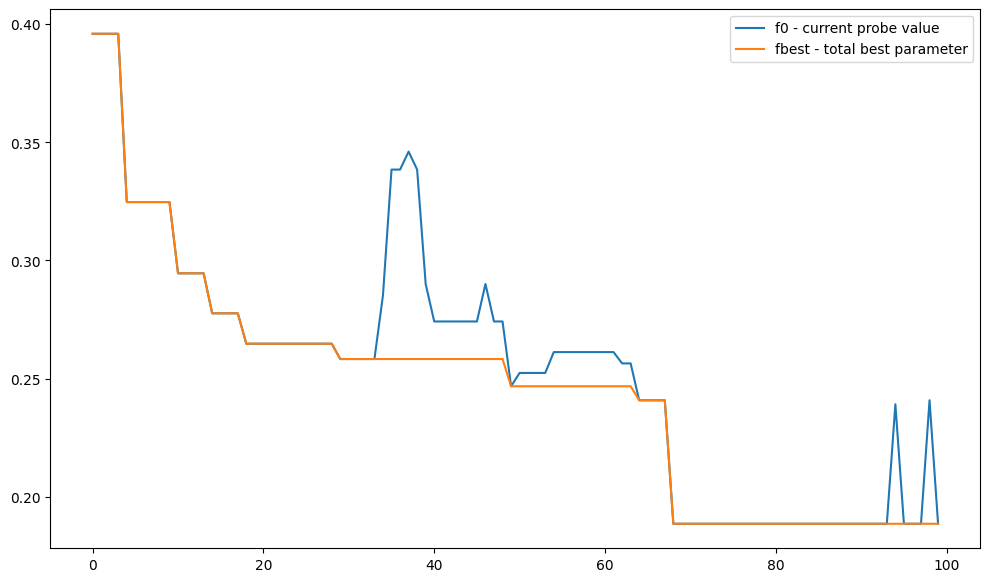

In [16]:
plt.figure(figsize = (12, 7))
plt.plot(optimization_progress['f0'], label = 'f0 - current probe value')
plt.plot(optimization_progress['fbest'], label = 'fbest - total best parameter')
plt.legend()
plt.show()

Select the best hyperparameters, refit to whole training set, and predict test set

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35232D+00    |proj g|=  5.49888D+00


 This problem is unconstrained.



At iterate    5    f=  1.35045D+00    |proj g|=  2.51171D+00

At iterate   10    f=  1.31020D+00    |proj g|=  2.63290D+01

At iterate   15    f=  1.27544D+00    |proj g|=  1.56287D+00

At iterate   20    f=  1.26438D+00    |proj g|=  4.24217D-01

At iterate   25    f=  1.26431D+00    |proj g|=  1.26298D+00

At iterate   30    f=  1.26187D+00    |proj g|=  2.47760D+00

At iterate   35    f=  1.26056D+00    |proj g|=  2.34558D-02

At iterate   40    f=  1.25998D+00    |proj g|=  1.76037D+00

At iterate   45    f=  1.25289D+00    |proj g|=  2.46288D+00

At iterate   50    f=  1.25219D+00    |proj g|=  6.88850D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

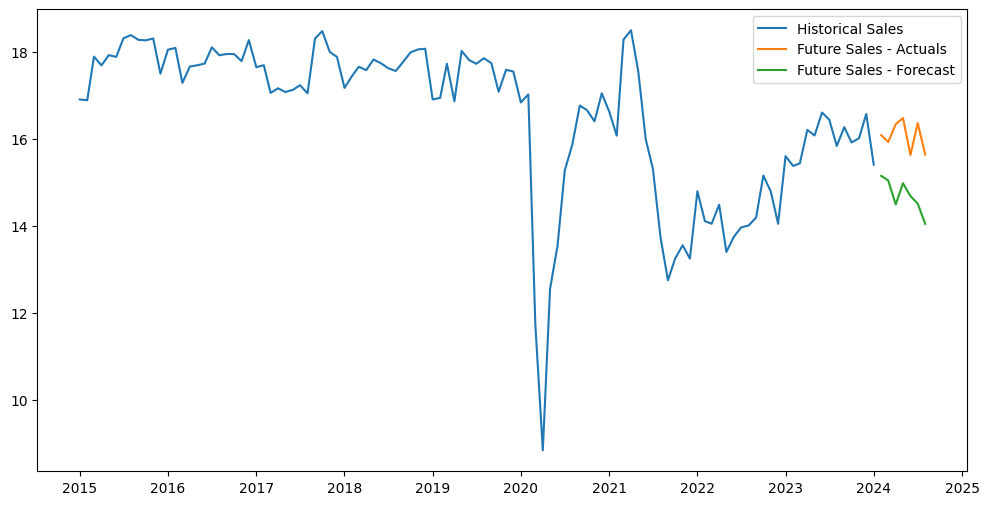

In [17]:
model = SARIMAX(
    endog = df_train['SALES'], 
    exog = df_train['GDP'], 
    order = (xbest['p'], xbest['d'], xbest['q']), # p, d, q order parameters for arima
    trend = [xbest['a0'], xbest['a1']], # A(t) = a0 + a1*t + a2*t^2 ... 
    seasonal_order = (xbest['P'], xbest['D'], xbest['Q'], 12) # P, D, Q seasonal order parameters
).fit()

forecast = model.forecast(steps=df_test.shape[0], exog=df_test['GDP'])

plt.figure(figsize = (12, 6))
plt.plot(df_train['DATE'], df_train['SALES'], label='Historical Sales')
plt.plot(df_test['DATE'], df_test['SALES'], label='Future Sales - Actuals')
plt.plot(df_test['DATE'], forecast, label='Future Sales - Forecast')
plt.legend()
plt.show()